In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py
import seaborn as sns
from ast import literal_eval
from collections import Counter
from sklearn.preprocessing import MinMaxScaler

In [2]:
plt.style.use('ggplot')

In [3]:
plt.style.use('seaborn-bright')

In [16]:
user_profile = pd.read_csv("data/user_profile/prepared/User_Profile.csv")

In [6]:
user_profile.drop(["Unnamed: 0",],axis=1,inplace=True)

<AxesSubplot:ylabel='BB_Categorical'>

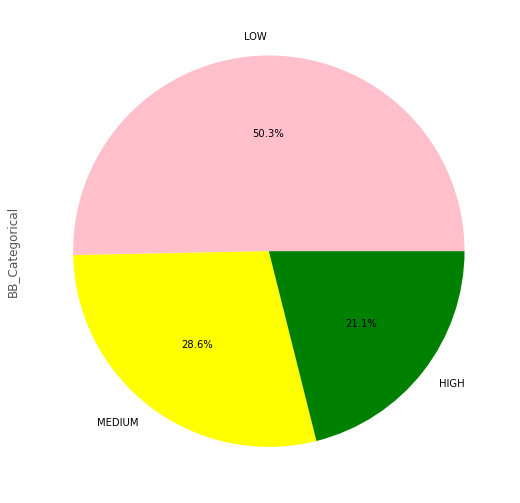

In [22]:
user_profile["BB_Categorical"].value_counts().plot(kind='pie', figsize=(9,9), autopct='%1.1f%%',colors = ['pink', 'yellow','green','red'] )

## Filling null values

In [6]:
cat_cols = ["BB_Categorical","PEO_TV_Categorical","IDD_INCOMING_Categorical","IDD_OUTGOING_Categorical",
            "ONNET_OUTGOING_Categorical","OFFNET_OUTGOING_Categorical","ONNET_INCOMING_Categorical",
            "Sub_Update_Status","Sub_Update",
            "OFFNET_INCOMING_Categorical","IDD_incoming_country","IDD_outgoing_country","IDD_Overall_Categorical",
            "Location_Identifier","GENDER","Voice_VAS_Month_Subscribed","BB_VAS_Month_Subscribed", "VOICE_Categorical",
            "Peo_VAS_Month_Subscribed","Other_VAS_Month_Subscribed","BB_Extra_GB_Purchase_Categorical",
            "Peo_TV_Package","Voice_VAS_Package","Megaline_Package","VAS_Package",
            "Having_Insurance","Having_Senior_Citizen","Having_Kids_at_Home","Having_Teenagers_Students",
            "Having_Working_Professionals","Having_Family_Member_Abroad","Tamil_Customer"]

In [7]:
user_profile[cat_cols]= user_profile[cat_cols].fillna("NO_INFO")

### Cluster Counts

In [8]:
user_profile["H_Agg_4_Cluster"].value_counts()

1    4209
0    3773
2    2738
3    2058
Name: H_Agg_4_Cluster, dtype: int64

<AxesSubplot:ylabel='H_Agg_4_Cluster'>

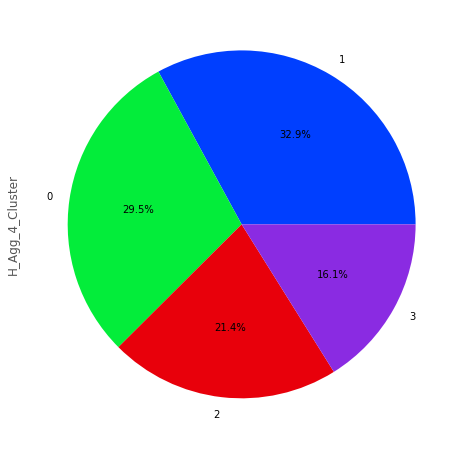

In [9]:
user_profile["H_Agg_4_Cluster"].value_counts().plot(kind='pie', figsize=(8,8), autopct='%1.1f%%')

# Cluster analysis - Cluster 0

In [10]:
cluster_0 = user_profile[(user_profile["H_5_Cluster"]==0)]

In [11]:
cluster_0.describe()

ONNET_OUTGOING_Scaled  ONNET_INCOMING_Scaled  OFFNET_OUTGOING_Scaled  \
count             503.000000             497.000000              499.000000   
mean                0.138974               0.138206                0.151170   
std                 0.120468               0.120924                0.136962   
min                 0.001202               0.001202                0.001202   
25%                 0.036597               0.034684                0.043637   
50%                 0.107413               0.112981                0.114453   
75%                 0.218063               0.206731                0.212274   
max                 0.599588               0.692651                0.794692   

       OFFNET_INCOMING_Scaled  IDD_INCOMING_Scaled  IDD_OUTGOING_Scaled  \
count              502.000000           370.000000           172.000000   
mean                 0.141909             0.129139             0.128969   
std                  0.117508             0.205993             0.182791   
min                  0.001202             0.002500             0.004808   
25%                  0.057443             0.009167             0.017628   
50%                  0.126778             0.030000             0.052083   
75%                  0.189168             0.142417             0.160256   
max                  0.948718             0.882000             0.833333   

       IDD_outgoing_Cumulative_Revenue  PEO_TV_Scaled   BB_Scaled  \
count                     1.720000e+02     331.000000  244.000000   
mean                      9.265171e+05       0.532156    0.436838   
std                       1.993201e+06       0.369690    0.277367   
min                       8.170000e+02       0.000000    0.005208   
25%                       2.715025e+04       0.000000    0.197917   
50%                       1.929670e+05       0.681250    0.401042   
75%                       6.457290e+05       0.862500    0.641927   
max                       1.206057e+07       0.975000    1.000000   

        BIRTH_YEAR  ...  Peo_Packages_if_Kids  \
count   366.000000  ...            503.000000   
mean   1964.210383  ...              0.002783   
std      14.242595  ...              0.023452   
min    1900.000000  ...              0.000000   
25%    1956.000000  ...              0.000000   
50%    1965.000000  ...              0.000000   
75%    1975.000000  ...              0.000000   
max    1995.000000  ...              0.200000   

       Peo_Packages_if_Teenager_Students  \
count                         503.000000   
mean                            0.004771   
std                             0.030551   
min                             0.000000   
25%                             0.000000   
50%                             0.000000   
75%                             0.000000   
max                             0.200000   

       Peo_Package_if_Working_Professionals  VAS_if_Kids  \
count                            503.000000   503.000000   
mean                               0.009940     0.054672   
std                                0.043509     0.195805   
min                                0.000000     0.000000   
25%                                0.000000     0.000000   
50%                                0.000000     0.000000   
75%                                0.000000     0.000000   
max                                0.200000     1.000000   

       VAS_if_Teenager_Students  VAS_if_Working_Professionals  \
count                503.000000                    503.000000   
mean                   0.151690                      0.124354   
std                    0.208467                      0.170359   
min                    0.000000                      0.000000   
25%                    0.000000                      0.000000   
50%                    0.000000                      0.000000   
75%                    0.300000                      0.250000   
max                    0.800000                      0.750000   

       IDD_if_Family_Member_Abr

#### Exceptional (Outlier Usage)

<AxesSubplot:>

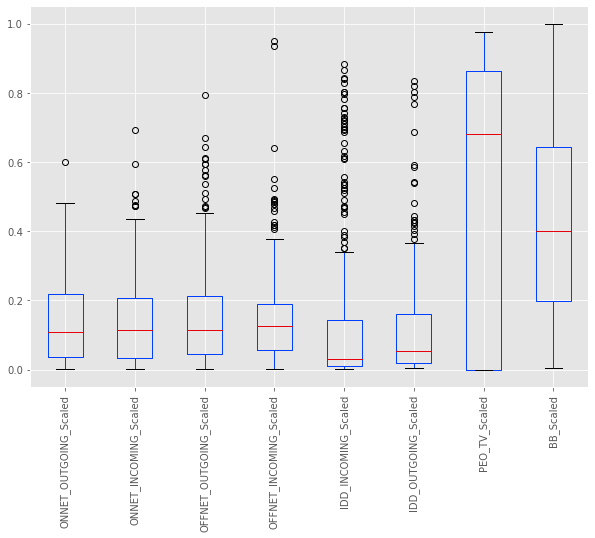

In [12]:
cluster_0.iloc[:,[4,7,10,13,16,20,26,28,62]].boxplot(figsize=(10,7),rot=90)

### Exceptional Users (Outliers) analysis

In [13]:
out_cols = ["ONNET_OUTGOING_Outlier","ONNET_INCOMING_Outlier","OFFNET_OUTGOING_Outlier","OFFNET_INCOMING_Outlier","IDD_INCOMING_Outlier","IDD_OUTGOING_Outlier"]
scaled_cols=["ONNET_OUTGOING_Scaled","ONNET_INCOMING_Scaled","OFFNET_OUTGOING_Scaled","OFFNET_INCOMING_Scaled","IDD_INCOMING_Scaled","IDD_OUTGOING_Scaled"]

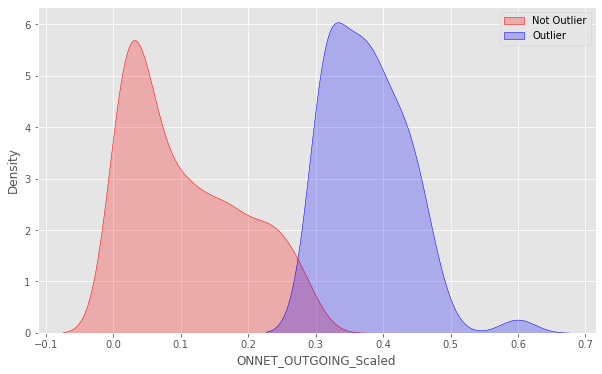

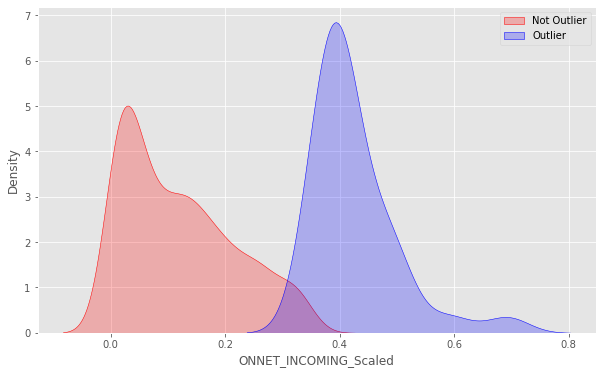

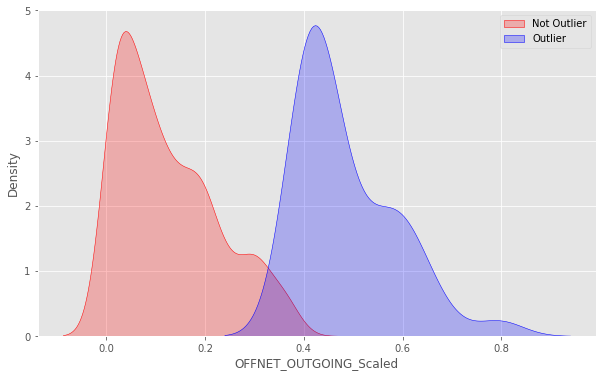

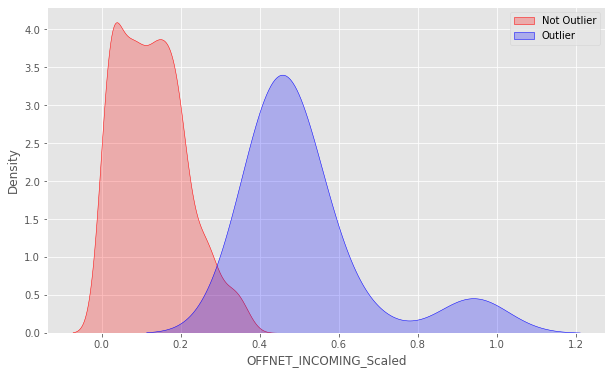

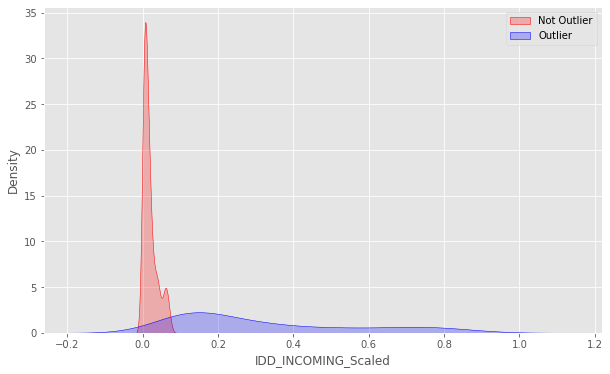

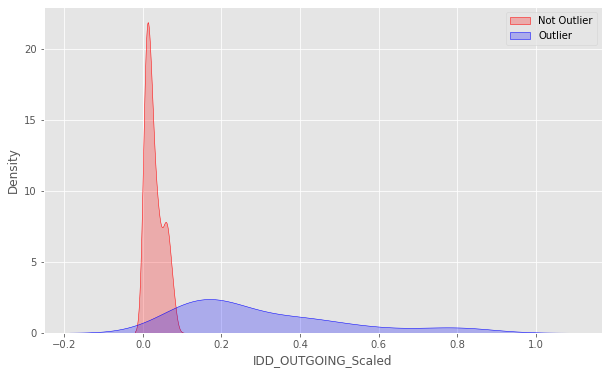

In [14]:
for i in range (0,6):
    plt.figure(figsize=(10,6))
    ax = sns.kdeplot(cluster_0[scaled_cols[i]][(cluster_0[out_cols[i]] == 'NO') ], color="Red", shade = True)
    ax = sns.kdeplot(cluster_0[scaled_cols[i]][(cluster_0[out_cols[i]] == 'YES') ], ax =ax, color="Blue", shade= True)
    ax.legend(["Not Outlier","Outlier"],loc='upper right')
    ax.set_ylabel('Density')

In [15]:
# Voice Outliers
cluster_0_out = cluster_0[(cluster_0["ONNET_OUTGOING_Outlier"]=="YES") | (cluster_0["ONNET_INCOMING_Outlier"]=="YES") | (cluster_0["OFFNET_OUTGOING_Outlier"]=="YES") | (cluster_0["OFFNET_INCOMING_Outlier"]=="YES") | (cluster_0["IDD_OUTGOING_Outlier"]=="YES") | (cluster_0["IDD_INCOMING_Outlier"]=="YES")]

#### Exceptional users -  correlation with other features

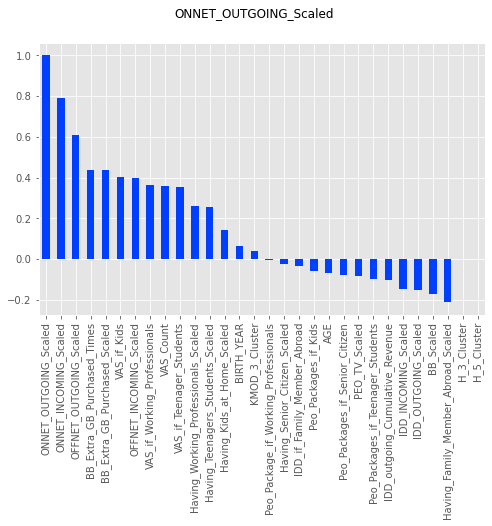

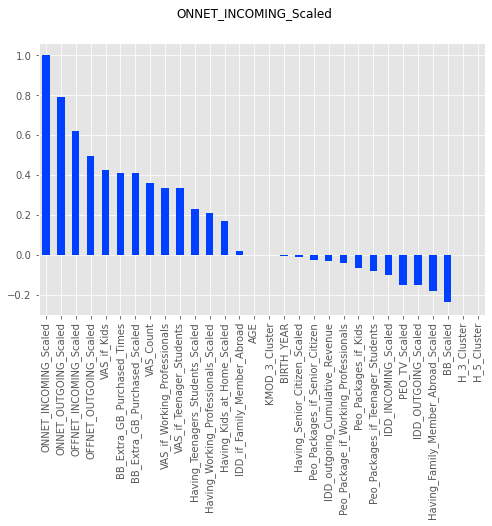

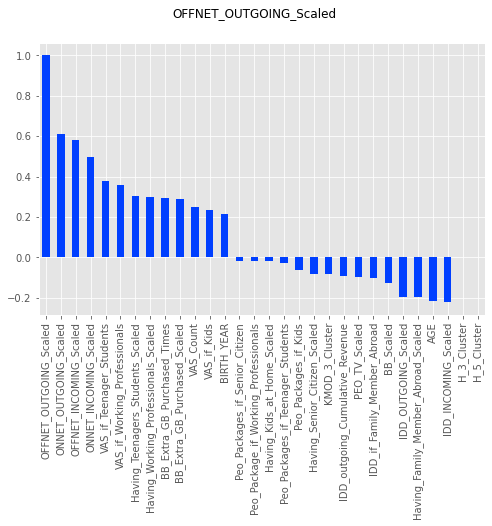

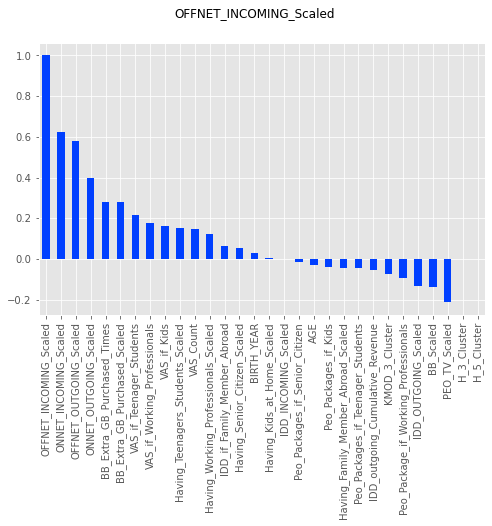

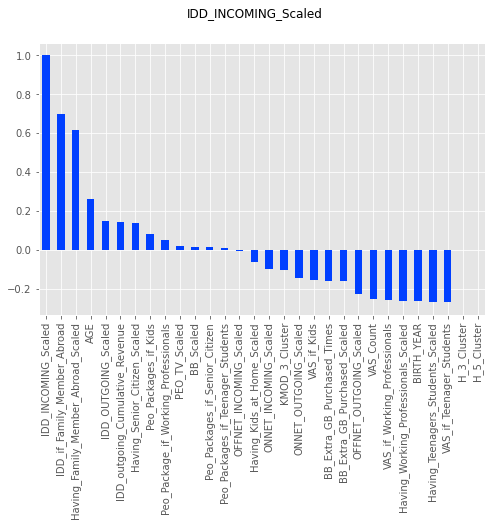

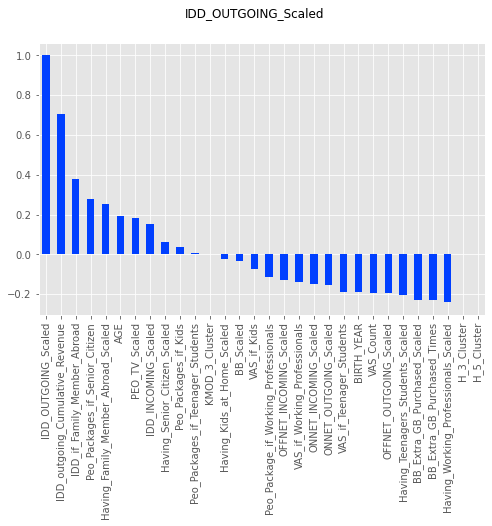

In [16]:
for col in scaled_cols:
    plt.figure(figsize=(8,5))
    plt.suptitle(col)
    cluster_0_out.corr()[col].sort_values(ascending = False).plot(kind='bar')

#### Subscriptions of Exceptional users

In [17]:
cluster_0_out_sub_df = pd.DataFrame([dict(cluster_0["Sub_Type"].value_counts()),dict(cluster_0_out["Sub_Type"].value_counts())])

In [18]:
cluster_0_out_sub_df

TRIPLE_PLAY  DOUBLE_PLAY_BV  SINGLE_PLAY  DOUBLE_PLAY_PV
0          277             106           72              48
1          117              60           21              14

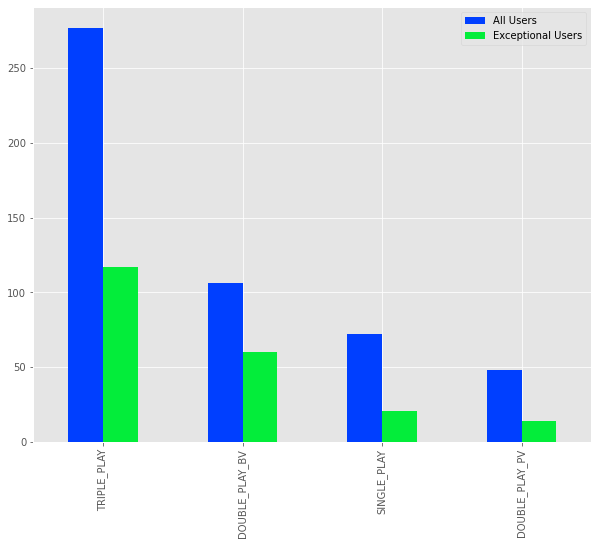

In [19]:
fig, ax = plt.subplots()
cluster_0_out_sub_df.T.plot(kind="bar", figsize=(10,8), ax=ax)
ax.legend(["All Users", "Exceptional Users"])

#### Exceptional Users by Location

<AxesSubplot:xlabel='Location_Identifier'>

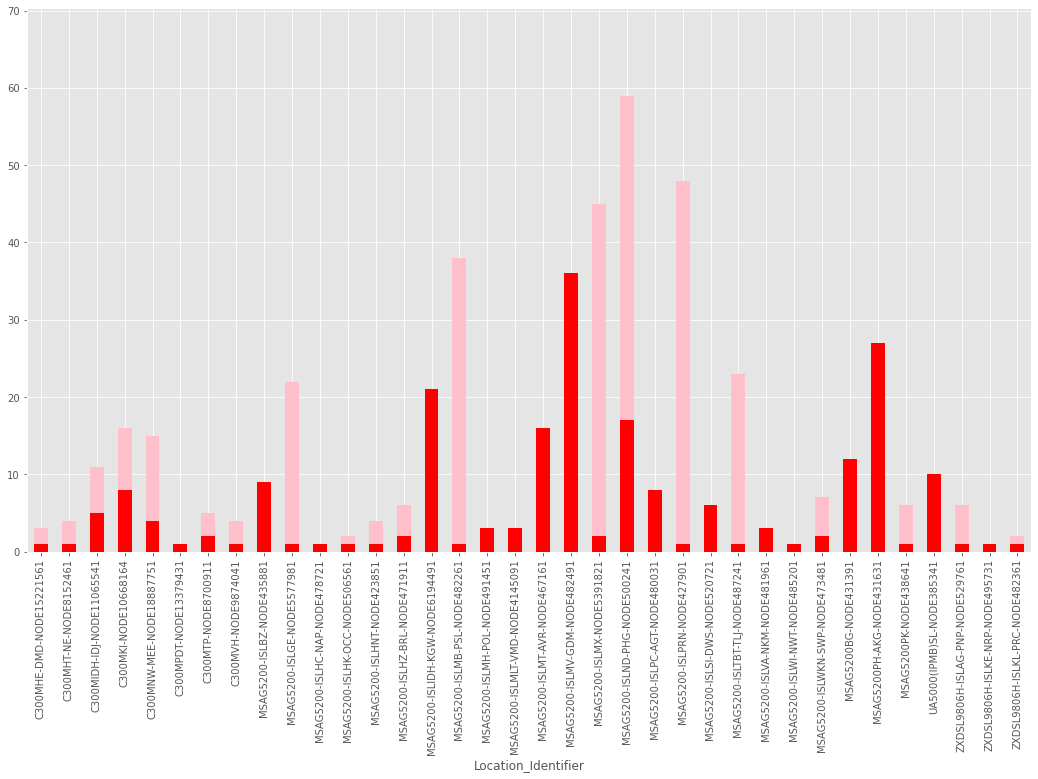

In [20]:
cluster_0_loc = cluster_0.groupby('Location_Identifier').count()["event_source.hash"]
cluster_0_out_loc = cluster_0_out.groupby('Location_Identifier').count()["event_source.hash"]
ax = cluster_0_loc.plot(stacked=True, kind="bar", figsize=(18,10), color="pink")
cluster_0_out_loc.plot(stacked=True, kind="bar",ax=ax, figsize=(18,10), color="red")

#### Skewness and Distribution

AttributeError: 'Line2D' object has no property 'legand'

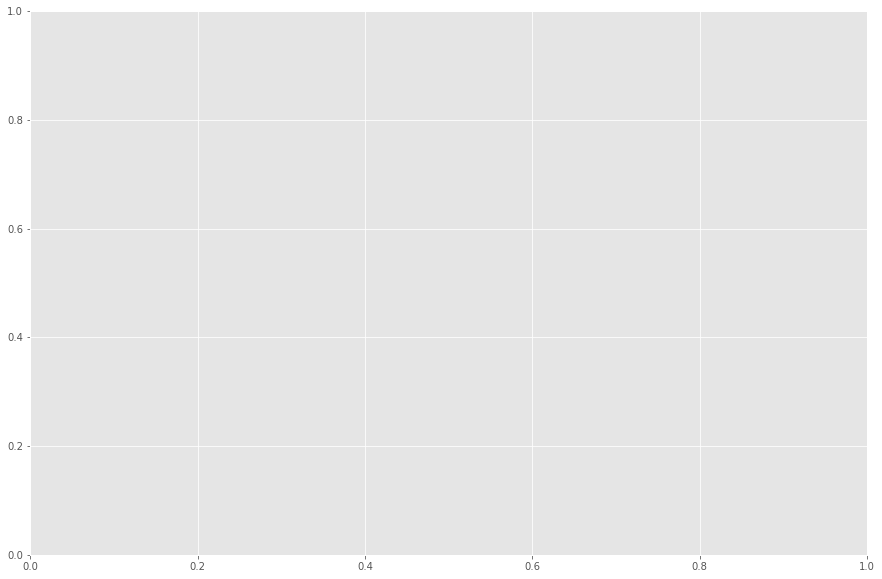

In [14]:
for i in [2,6,9,12,15,19]:
    user_profile.iloc[:,i].plot.kde(figsize=(15,10))
plt.legend(user_profile.iloc[:,])

array([[<AxesSubplot:title={'center':'ONNET_OUTGOING_Scaled'}>,
        <AxesSubplot:title={'center':'ONNET_INCOMING_Scaled'}>,
        <AxesSubplot:title={'center':'OFFNET_OUTGOING_Scaled'}>,
        <AxesSubplot:title={'center':'OFFNET_INCOMING_Scaled'}>,
        <AxesSubplot:title={'center':'IDD_INCOMING_Scaled'}>],
       [<AxesSubplot:title={'center':'IDD_OUTGOING_Scaled'}>,
        <AxesSubplot:title={'center':'IDD_outgoing_Cumulative_Revenue'}>,
        <AxesSubplot:title={'center':'PEO_TV_Scaled'}>,
        <AxesSubplot:title={'center':'BB_Scaled'}>,
        <AxesSubplot:title={'center':'BIRTH_YEAR'}>],
       [<AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'VAS_Count'}>,
        <AxesSubplot:title={'center':'BB_Extra_GB_Purchased_Times'}>,
        <AxesSubplot:title={'center':'BB_Extra_GB_Purchased_Scaled'}>,
        <AxesSubplot:title={'center':'Having_Senior_Citizen_Scaled'}>],
       [<AxesSubplot:title={'center':'Having_Kids_at_Home_Scaled'}>,
 

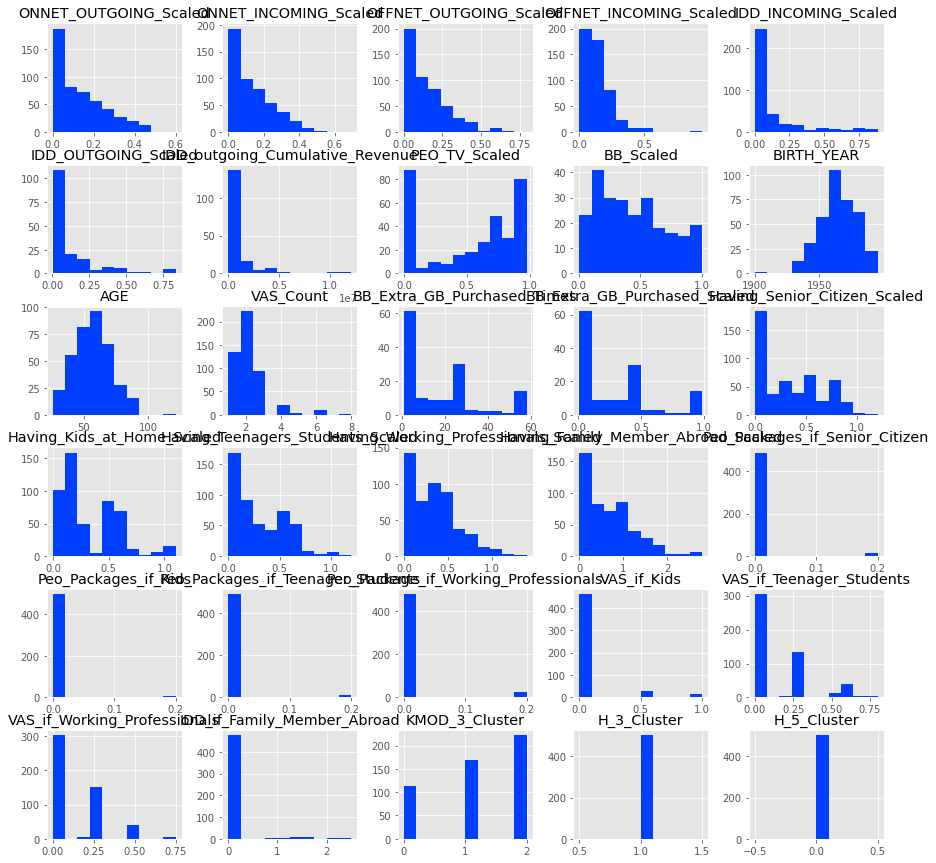

In [22]:
cluster_0.hist(figsize=(15,15))

### Subscription Type and Usage

In [23]:
cluster_0["Sub_Type"].value_counts()

TRIPLE_PLAY       277
DOUBLE_PLAY_BV    106
SINGLE_PLAY        72
DOUBLE_PLAY_PV     48
Name: Sub_Type, dtype: int64

<AxesSubplot:ylabel='Sub_Type'>

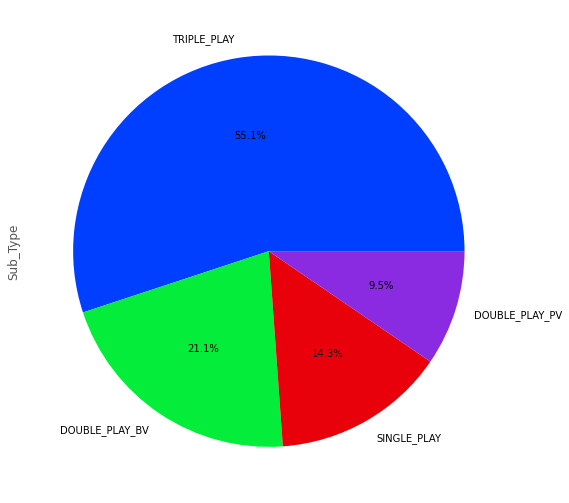

In [24]:
cluster_0["Sub_Type"].value_counts().plot(kind='pie', figsize=(9,9), autopct='%1.1f%%')

In [25]:
len(cluster_0[(cluster_0["Sub_Usage"] != "['VOICE_NO_INFO', 'BB_NO_INFO', 'TV_NO_INFO']")]["Sub_Usage"])

501

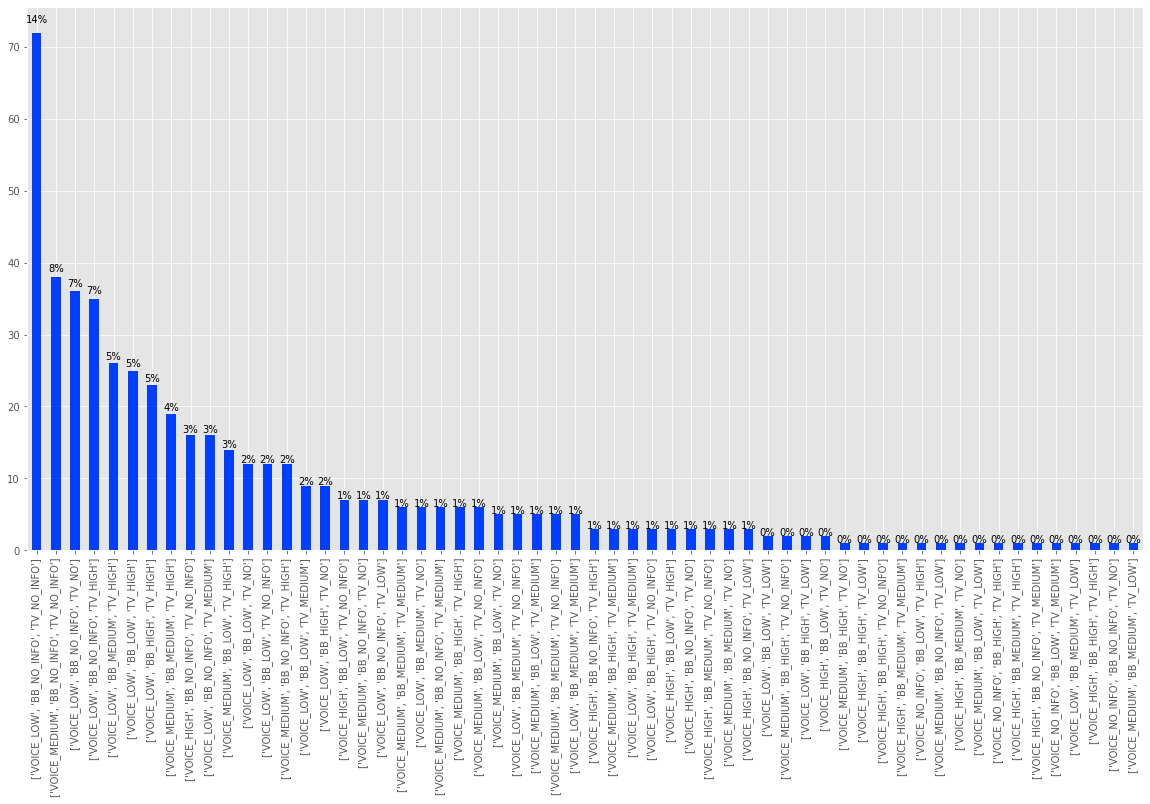

In [26]:
ax =cluster_0[(cluster_0["Sub_Usage"] != "['VOICE_NO_INFO', 'BB_NO_INFO', 'TV_NO_INFO']")]["Sub_Usage"].value_counts().plot(kind='bar', figsize=(20,10))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

### Subscription state

####  Subscription: Assumed vs. Actual

<AxesSubplot:ylabel='Sub_Type_State'>

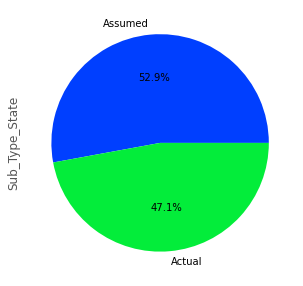

In [27]:
cluster_0["Sub_Type_State"].value_counts().plot(kind='pie', figsize=(5,5), autopct='%1.1f%%')

<AxesSubplot:ylabel='Sub_Update_Status'>

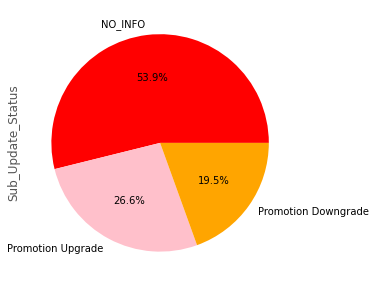

In [28]:
cluster_0["Sub_Update_Status"].value_counts().plot(kind='pie', figsize=(5,5), autopct='%1.1f%%', colors=["red","pink","orange"])

<AxesSubplot:ylabel='Sub_Update_Status'>

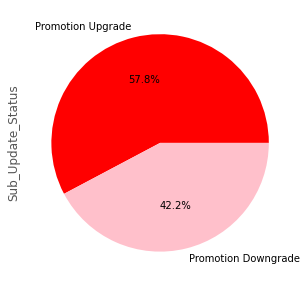

In [131]:
cluster_0[(cluster_0["Sub_Update_Status"]!= "NO_INFO")]["Sub_Update_Status"].value_counts().plot(kind='pie', figsize=(5,5), autopct='%1.1f%%', colors=["red","pink","orange"])

<AxesSubplot:ylabel='Sub_Update'>

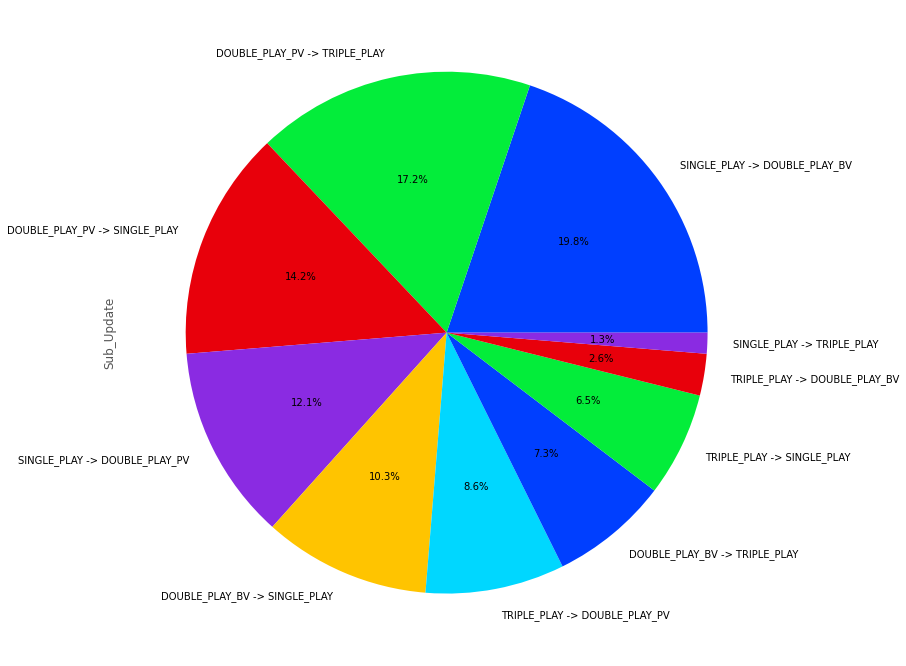

In [29]:
cluster_0[(cluster_0["Sub_Update"] !="NO_INFO")]["Sub_Update"].value_counts().plot(kind='pie', figsize=(12,12), autopct='%1.1f%%')

### Voice Calls Usage

In [30]:
cluster_0["VOICE_Categorical"].value_counts()

LOW        309
MEDIUM     141
HIGH        47
NO_INFO      6
Name: VOICE_Categorical, dtype: int64

In [12]:
cluster_0["VOICE_Categorical"].value_counts().plot(kind='pie', figsize=(9,9), autopct='%1.1f%%',colors = ['pink', 'yellow','green','red'] )

KeyError: 'Voice_Overall_Categorical'

### VOICE VAS Packages

In [32]:
count_dict = dict(cluster_0["Voice_VAS_Package"].value_counts())
all_products = []
for x,y in count_dict.items():
    if x != "NO_INFO":
        for item in literal_eval(x):
            for i in range(y):
                all_products.append(item)
all_voice_products_dict = Counter(all_products)

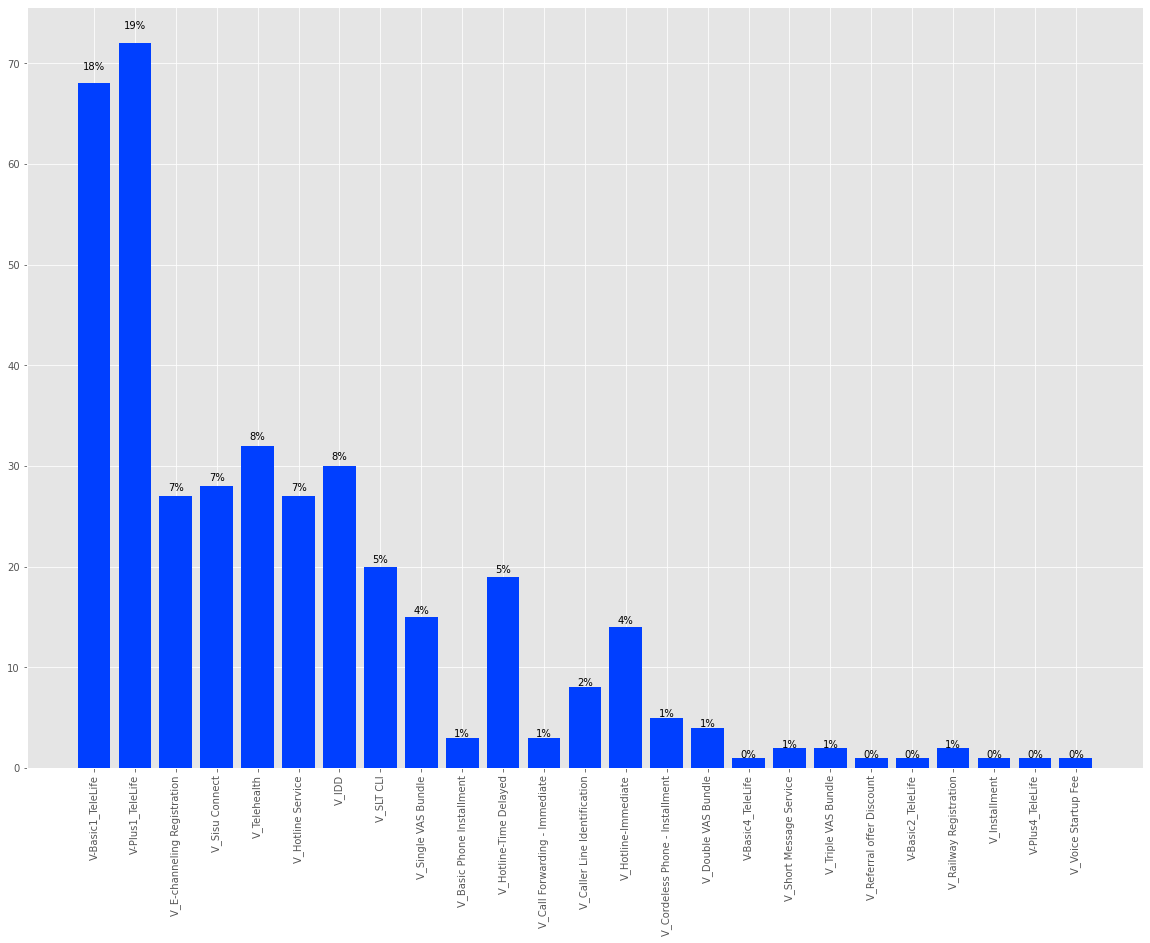

In [33]:
avp_without_no = all_voice_products_dict
#avp_without_no.pop("NO")
fig,ax = plt.subplots(figsize=(20,14))
ax.bar(*zip(*avp_without_no.items()))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

plt.xticks(rotation=90)
plt.show()

### IDD Usage

In [34]:
cluster_0["IDD_Overall_Categorical"].value_counts()

LOW        352
NO_INFO    124
MEDIUM      19
HIGH         8
Name: IDD_Overall_Categorical, dtype: int64

<AxesSubplot:ylabel='IDD_Overall_Categorical'>

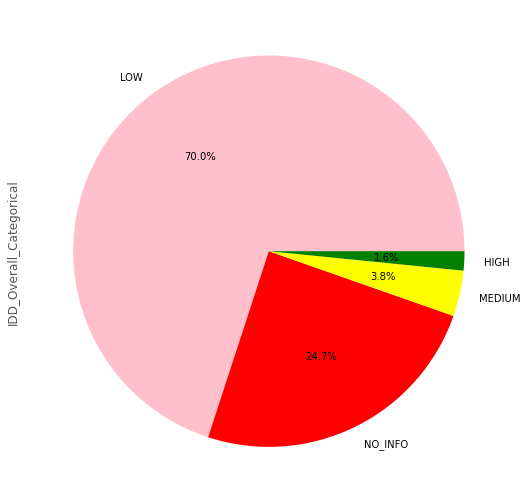

In [35]:
cluster_0["IDD_Overall_Categorical"].value_counts().plot(kind='pie', figsize=(9,9), autopct='%1.1f%%',colors = ['pink','red','yellow','green'] )

#### IDD Calling country analysis

In [36]:
def eval_country(idd_country):
    if not isinstance(idd_country, float):
        if idd_country != "NO_INFO":
            return literal_eval(idd_country)
    else:
        return []

In [37]:
cluster_0_idd_country_df = cluster_0[["event_source.hash","IDD_incoming_country"]]

In [38]:
cluster_0_idd_country_df["IDD_incoming_country"] = cluster_0_idd_country_df["IDD_incoming_country"].apply(lambda x: eval_country(x))

<ipython-input-38-27ef6e54b7d6>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [39]:
cluster_0_idd_country_df = cluster_0_idd_country_df.explode("IDD_incoming_country")

<AxesSubplot:>

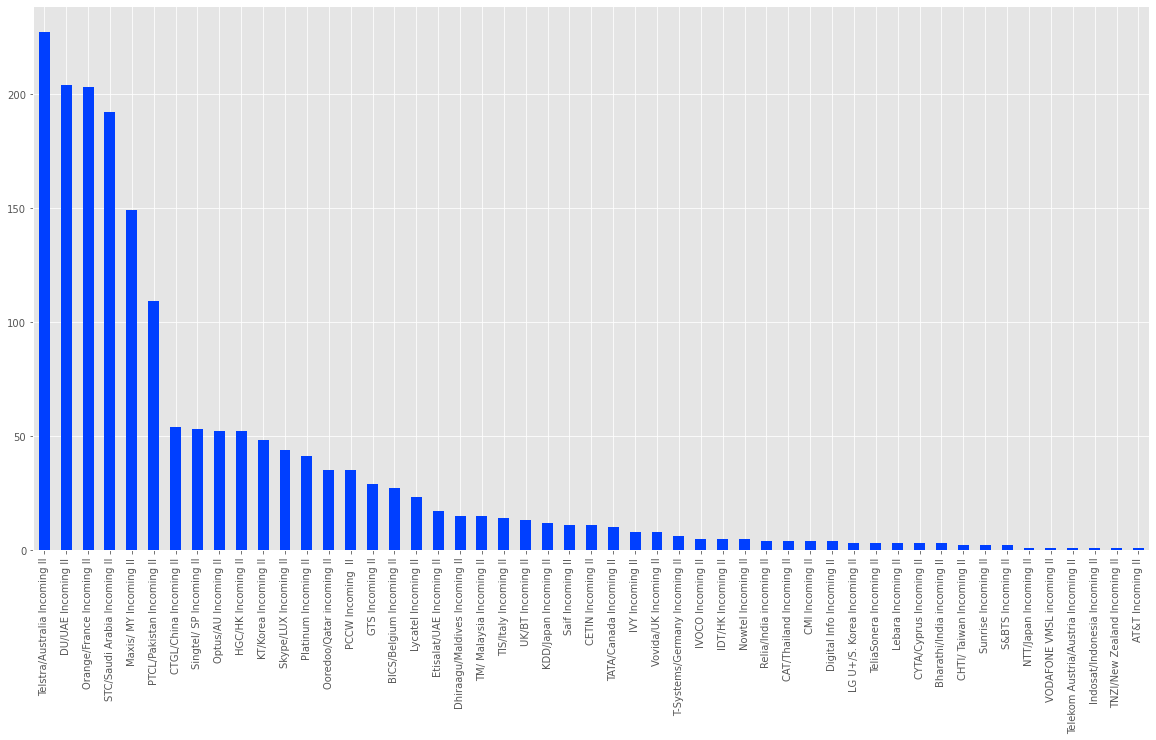

In [40]:
cluster_0_idd_country_df["IDD_incoming_country"].value_counts().plot(kind="bar", figsize=(20,10))

#### IDD Outgoing Countries

In [41]:
cluster_0_idd_out_country_df = cluster_0[["event_source.hash","IDD_outgoing_country"]]

In [42]:
cluster_0_idd_out_country_df["IDD_outgoing_country"] = cluster_0_idd_out_country_df["IDD_outgoing_country"].apply(lambda x: eval_country(x))

<ipython-input-42-2f7f361cb0ce>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [43]:
cluster_0_idd_out_country_df = cluster_0_idd_out_country_df.explode("IDD_outgoing_country")

In [44]:
def drop_mobile(idd_country):
    if idd_country is not None:
        if idd_country != "NO_INFO":
            return idd_country.replace(" - Mobile", "")
    else:
        return idd_country

In [45]:
cluster_0_idd_out_country_df["IDD_outgoing_country"] = cluster_0_idd_out_country_df["IDD_outgoing_country"].apply(lambda x: drop_mobile(x))

<AxesSubplot:>

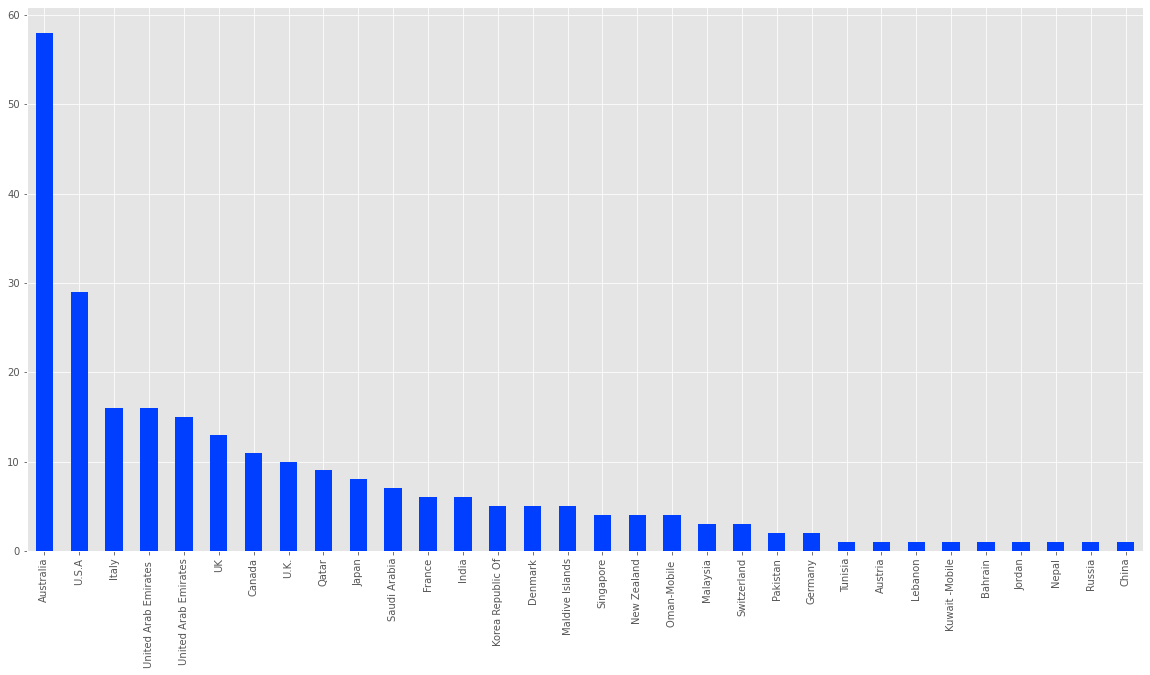

In [46]:
cluster_0_idd_out_country_df["IDD_outgoing_country"].value_counts().plot(kind="bar", figsize=(20,10))

#### IDD Rental anlysis

## ToDo
- Voice VAS Monthly rental/ One time charge/ subscribed timeframes analysis

### PeoTV Usage

In [47]:
cluster_0["PEO_TV_Categorical"].value_counts()

NO_INFO    172
HIGH       170
NO          86
MEDIUM      56
LOW         19
Name: PEO_TV_Categorical, dtype: int64

#### PeoTV Usage among Triple Play users in Cluster 0

<AxesSubplot:ylabel='PEO_TV_Categorical'>

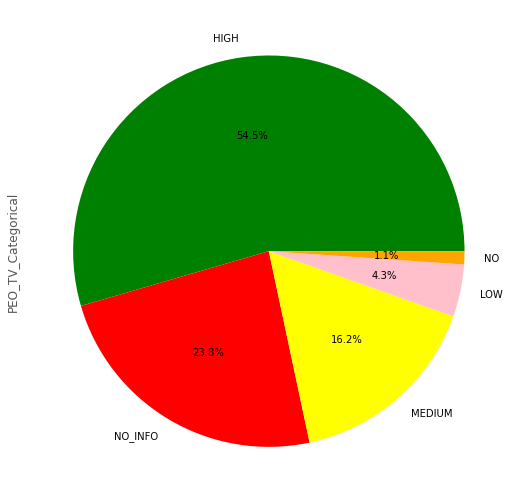

In [124]:
cluster_0_peo = cluster_0[(cluster_0["Sub_Type"] == "TRIPLE_PLAY")]
cluster_0_peo["PEO_TV_Categorical"].value_counts().plot(kind='pie', figsize=(9,9), autopct='%1.1f%%',colors = ['green','red','yellow','pink','orange'])

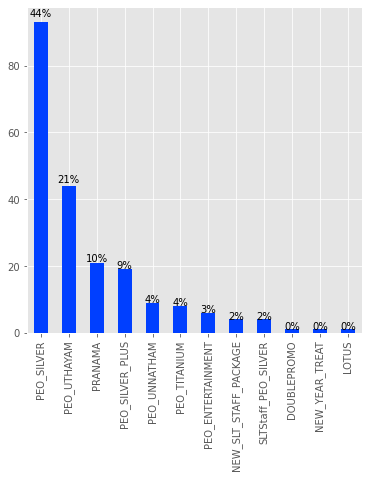

In [49]:
ax =cluster_0_peo[(cluster_0_peo["Peo_TV_Package"] != "NO_INFO")]["Peo_TV_Package"].value_counts().plot(kind='bar', figsize=(6,6))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

#### PeoTV Usage among Double Play PV users in Cluster 0

<AxesSubplot:ylabel='PEO_TV_Categorical'>

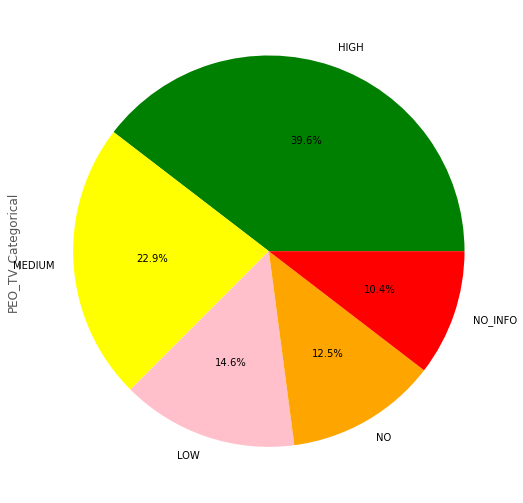

In [125]:
cluster_0_peo_pv = cluster_0[(cluster_0["Sub_Type"] == "DOUBLE_PLAY_PV")]
cluster_0_peo_pv["PEO_TV_Categorical"].value_counts().plot(kind='pie', figsize=(9,9), autopct='%1.1f%%',colors = ['green','yellow','pink','orange','red'])

In [51]:
cluster_0_peo_pv["PEO_TV_Categorical"].value_counts()

HIGH       19
MEDIUM     11
LOW         7
NO          6
NO_INFO     5
Name: PEO_TV_Categorical, dtype: int64

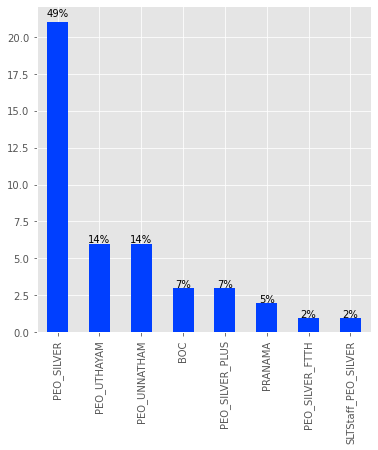

In [52]:
ax =cluster_0_peo_pv[(cluster_0_peo_pv["Peo_TV_Package"] != "NO_INFO")]["Peo_TV_Package"].value_counts().plot(kind='bar', figsize=(6,6))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

### PEO TV VAS Packages

In [53]:
count_dict = dict(cluster_0["Peo_VAS_Package"].value_counts())
all_products = []
for x,y in count_dict.items():
    if x != "NO_INFO":
        for item in literal_eval(x):
            for i in range(y):
                all_products.append(item)
all_peo_products_dict = Counter(all_products)

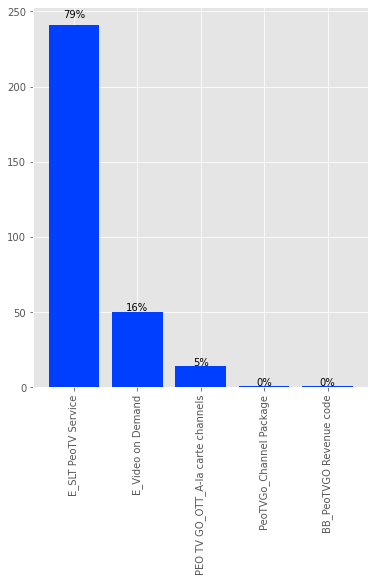

In [54]:
avp_without_no = all_peo_products_dict
#avp_without_no.pop("NO")
fig,ax = plt.subplots(figsize=(6,7))
ax.bar(*zip(*avp_without_no.items()))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

plt.xticks(rotation=90)
plt.show()

## ToDo
- Peo VAS Monthly rental/ One time charge/ subscribed timeframes analysis

### BroadBand Internet Usage

In [55]:
cluster_0["BB_Categorical"].value_counts()

NO_INFO    259
LOW        105
MEDIUM      83
HIGH        56
Name: BB_Categorical, dtype: int64

#### BB Usage for triple Play users in Cluster 0

<AxesSubplot:ylabel='BB_Categorical'>

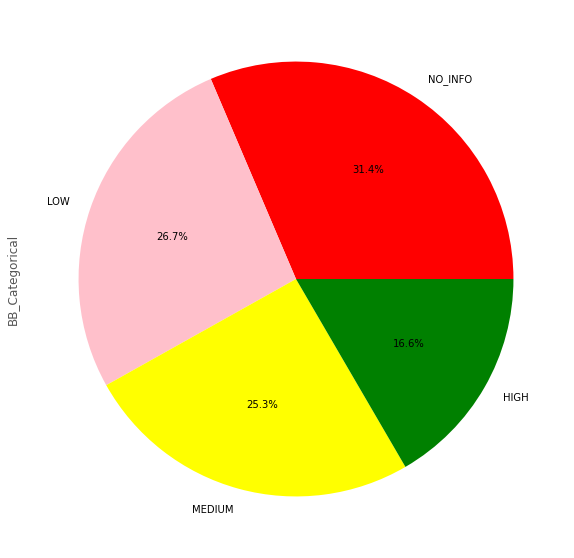

In [56]:
cluster_0_bb = cluster_0[(cluster_0["Sub_Type"] == "TRIPLE_PLAY")]
cluster_0_bb["BB_Categorical"].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%',colors = ['red','pink','yellow','green'])

#### BB Usage for Double Play BV Customers in Cluster 0

<AxesSubplot:ylabel='BB_Categorical'>

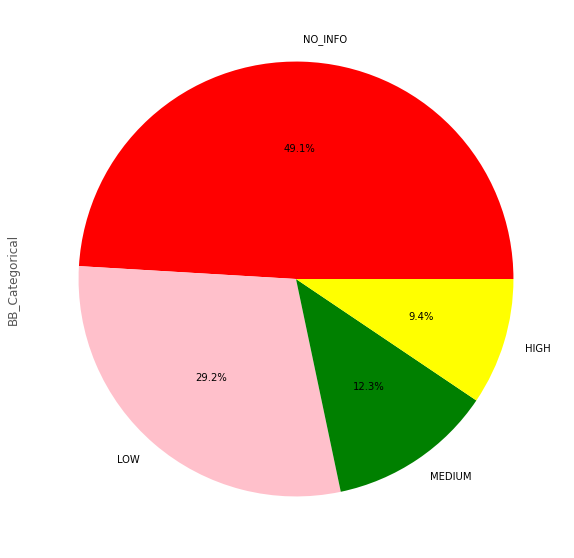

In [57]:
cluster_0_bb_dp = cluster_0[(cluster_0["Sub_Type"] == "DOUBLE_PLAY_BV")]
cluster_0_bb_dp["BB_Categorical"].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%',colors = ['red','pink','green','yellow'])

### BB VAS Package

In [58]:
count_dict = dict(cluster_0["BB_VAS_Package"].value_counts())
all_products = []
for x,y in count_dict.items():
    if x != "NO_INFO":
        for item in literal_eval(x):
            for i in range(y):
                all_products.append(item)
all_bb_products_dict = Counter(all_products)

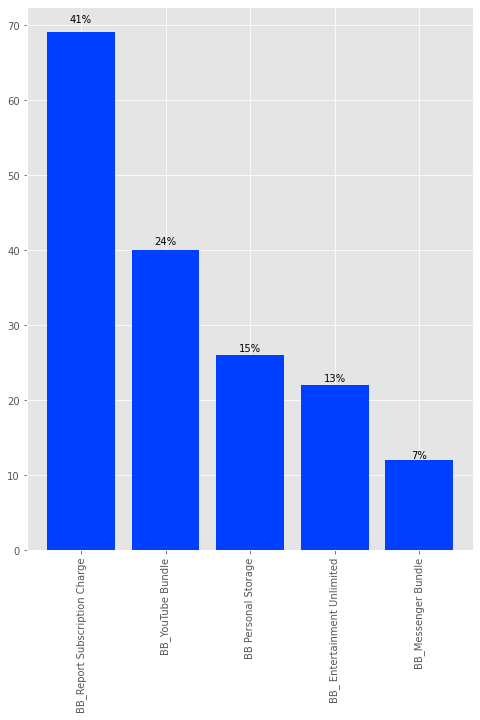

In [59]:
avp_without_no = all_bb_products_dict
#avp_without_no.pop("NO")
fig,ax = plt.subplots(figsize=(8,10))
ax.bar(*zip(*avp_without_no.items()))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

plt.xticks(rotation=90)
plt.show()

## ToDo
- BB VAS Monthly rental/ One time charge/ subscribed timeframes analysis

### Extra Gb Usage Analysis

#### Most Extra GB Purchased users - by frequency

In [60]:
extra_gb_freq_users = cluster_0[(cluster_0["BB_Extra_GB_Purchased_Scaled"]>0.5)]

In [61]:
extra_gb_mostly_used_users = extra_gb_freq_users["event_source.hash"]

<AxesSubplot:ylabel='BB_Extra_GB_Purchase_Categorical'>

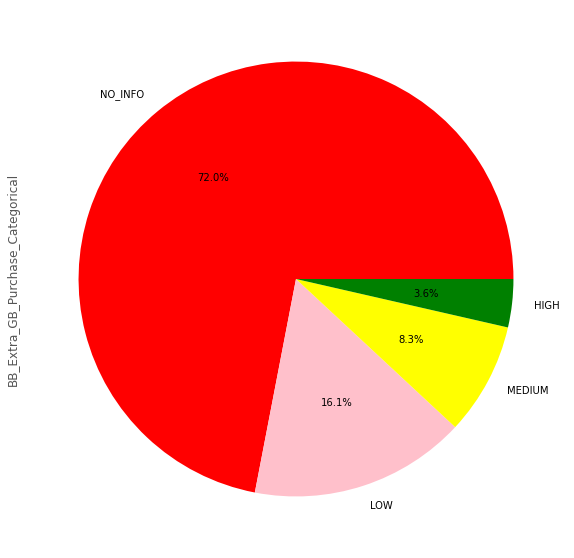

In [62]:
cluster_0["BB_Extra_GB_Purchase_Categorical"].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%',colors = ['red','pink','yellow','green'])

[Text(0, 0, '9958e2d5975774299cab39ed392a05f1'),
 Text(1, 0, '552d18e8515f81cf52f85d1cb995de16'),
 Text(2, 0, 'fe20b17a9573e4b7e765cc3098728f3d'),
 Text(3, 0, '7238794fad59fb688e08352255739b85'),
 Text(4, 0, 'ebd27202064983929d81256450c31b9e'),
 Text(5, 0, '048f304256dc532c9aa79b434ab5ee2e'),
 Text(6, 0, '74ee3d188f159cc1493c791c27a7a135'),
 Text(7, 0, 'c5722f1197db46f96000e28ef6c36da1'),
 Text(8, 0, '87a25834b97075e230f0e7237b6205b7'),
 Text(9, 0, '91d83d11d3d356ad391441fa05bc3b90'),
 Text(10, 0, 'ffb63ff99cf1354dff1da862f379da80'),
 Text(11, 0, '0e7d786a4c50702484cf004a0d1b68a2'),
 Text(12, 0, '672440718a32b776e2f8f0a712f8390e'),
 Text(13, 0, 'e62d17dab22425b9abc747759fb38dbd'),
 Text(14, 0, '4cebd60d20845469364f6af9bf875cdd'),
 Text(15, 0, '195e372619c00d7996c0407fe94fd0f8'),
 Text(16, 0, '31d67691d57f8199e202ad2b2958cd38'),
 Text(17, 0, '1b266fbf846f3eb53f6f0c1f2813bc0a'),
 Text(18, 0, '18d9469b1885b5988f72e8e7f62009ee'),
 Text(19, 0, '02ab436dc7b5a63579a44641db682ab1'),
 Text(20, 

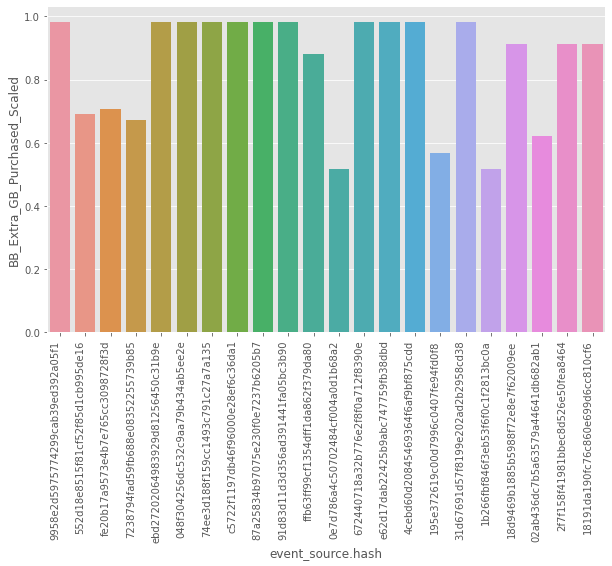

In [126]:
plt.figure(figsize=(10,6))
extra_gb_bar_plot = sns.barplot(data=extra_gb_freq_users,x='event_source.hash', y='BB_Extra_GB_Purchased_Scaled')

extra_gb_bar_plot.set_xticklabels(extra_gb_bar_plot.get_xticklabels(), 
                          rotation=90, 
                          horizontalalignment='right')

#### Most Extra GB Useed users - By spent amount with Time

<ipython-input-64-fb2918c10f64>:7: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



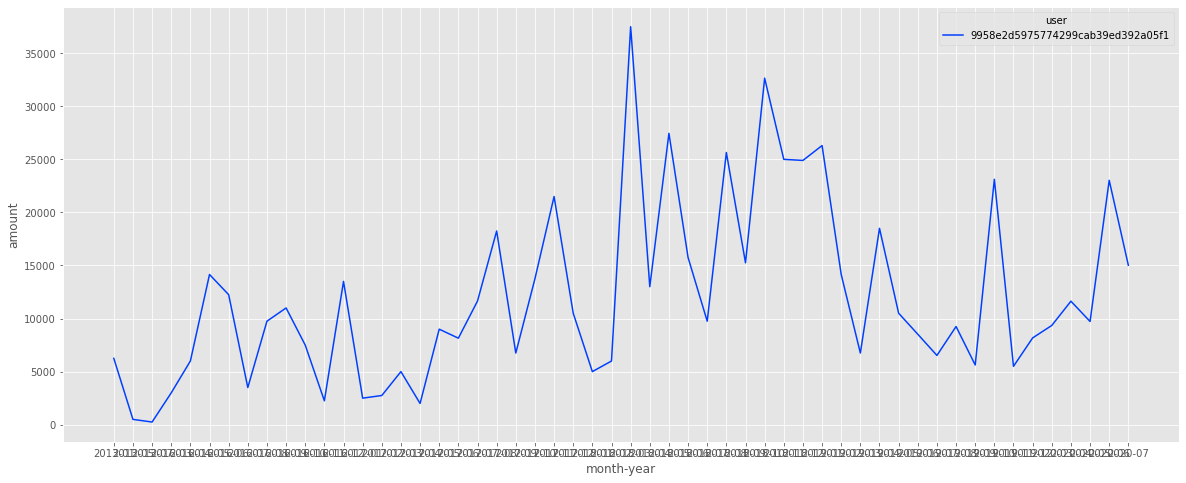

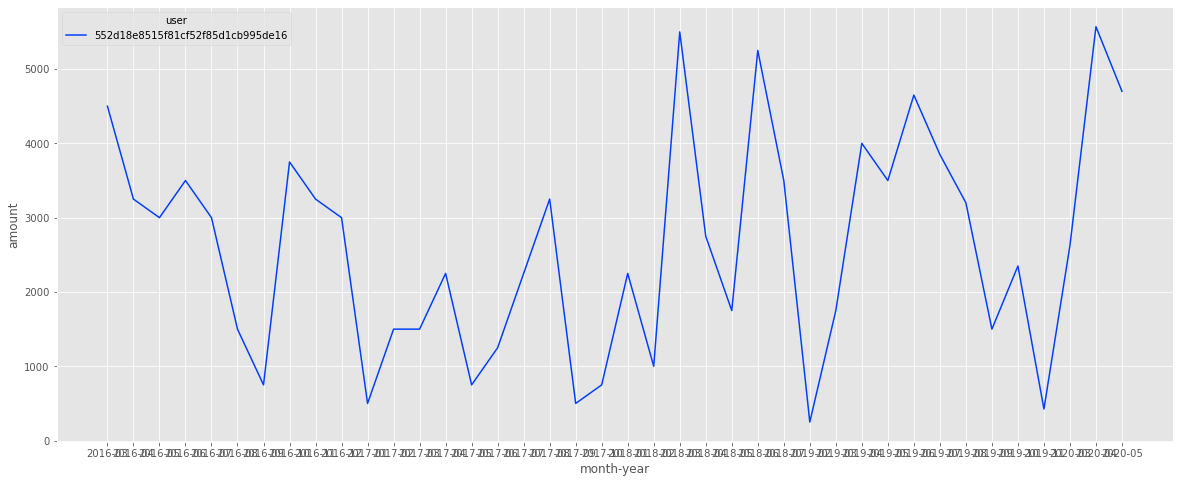

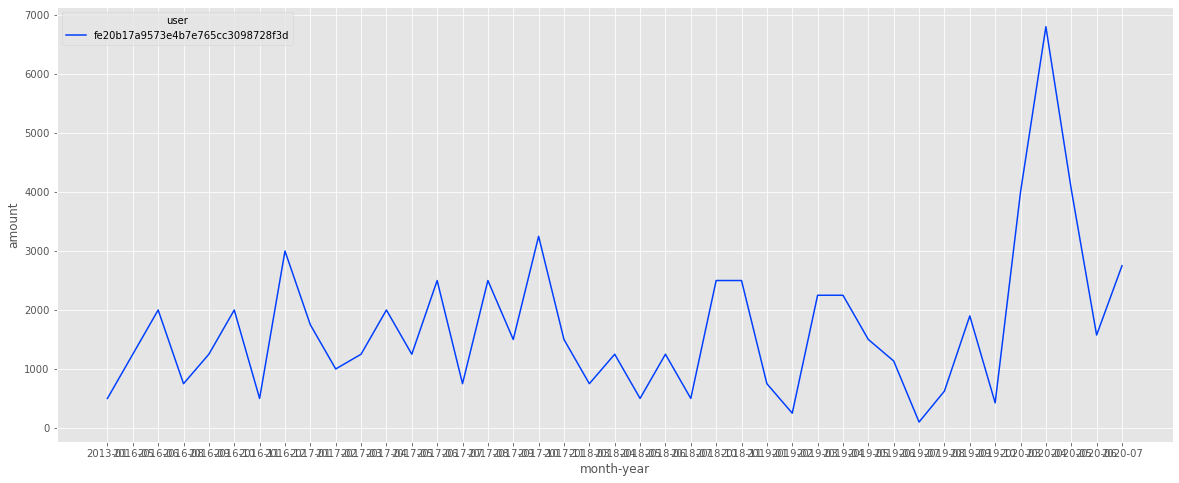

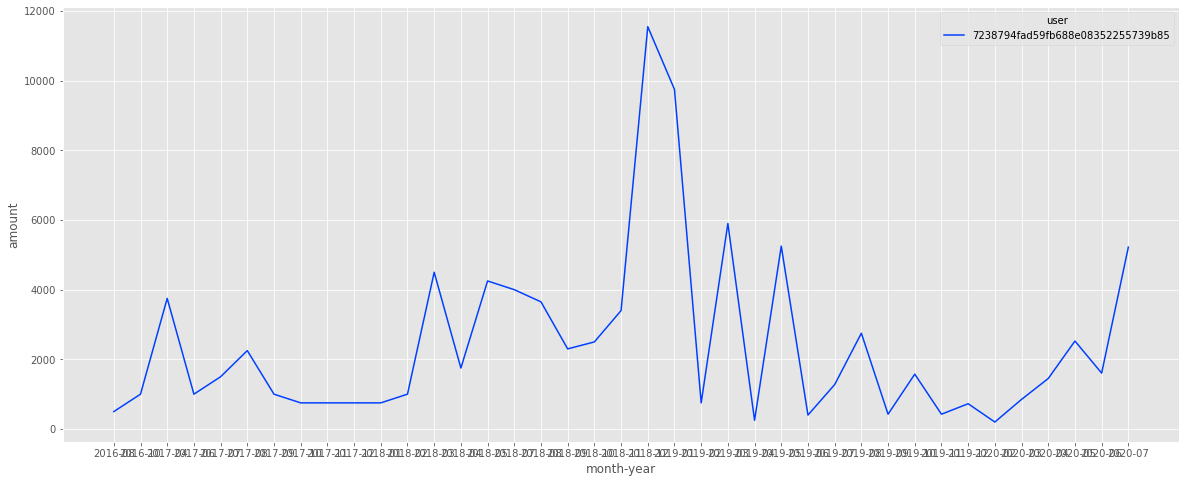

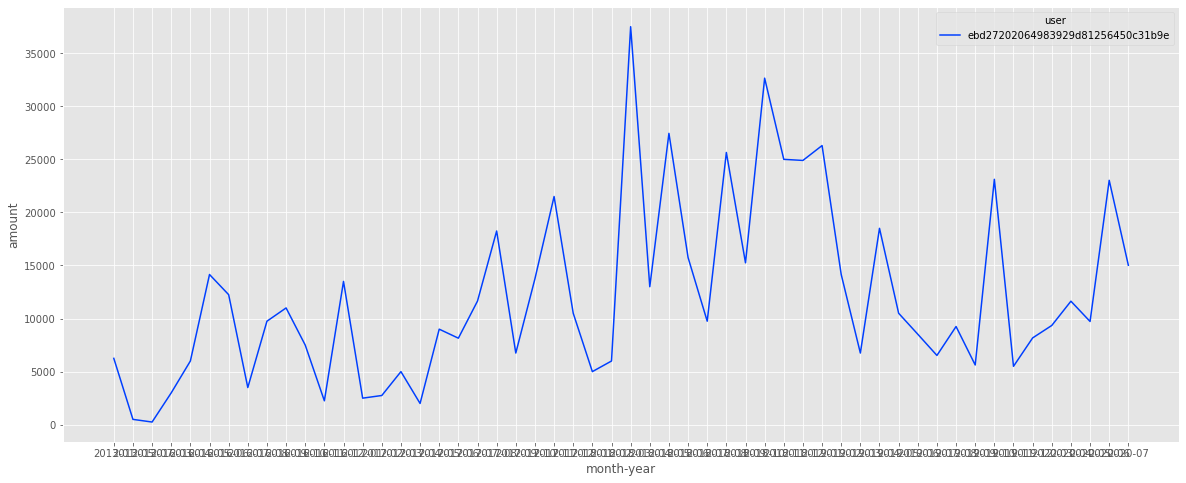

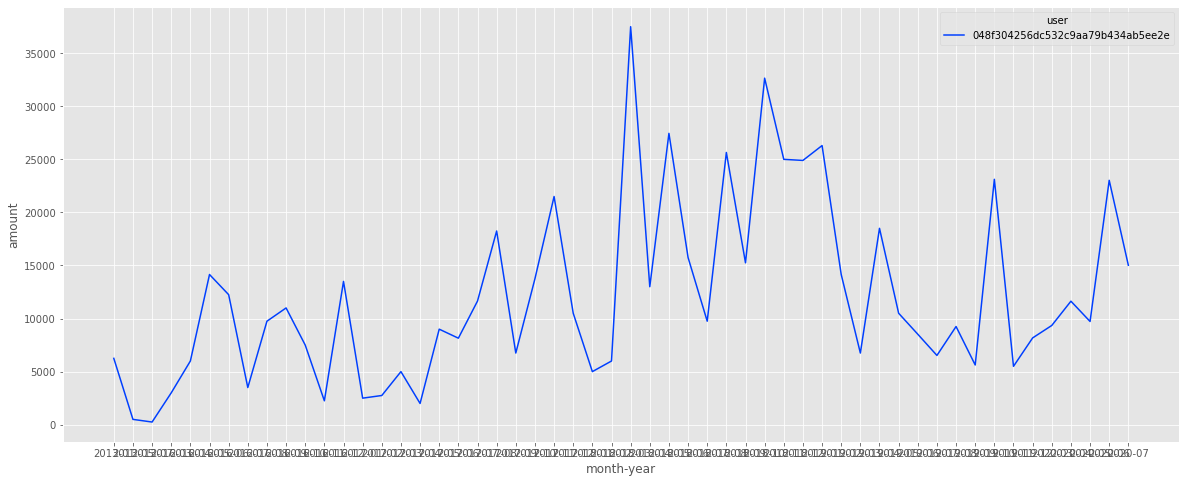

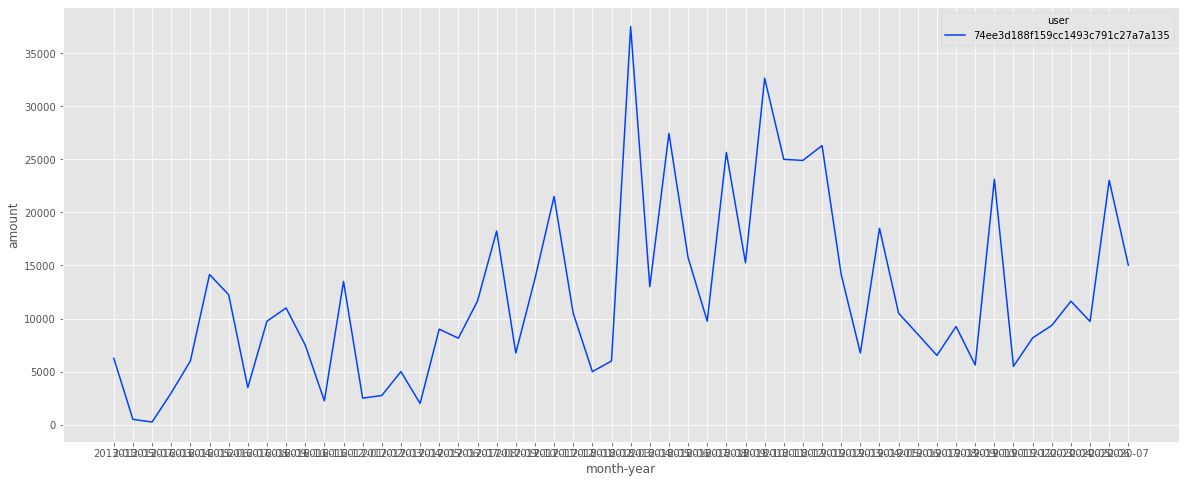

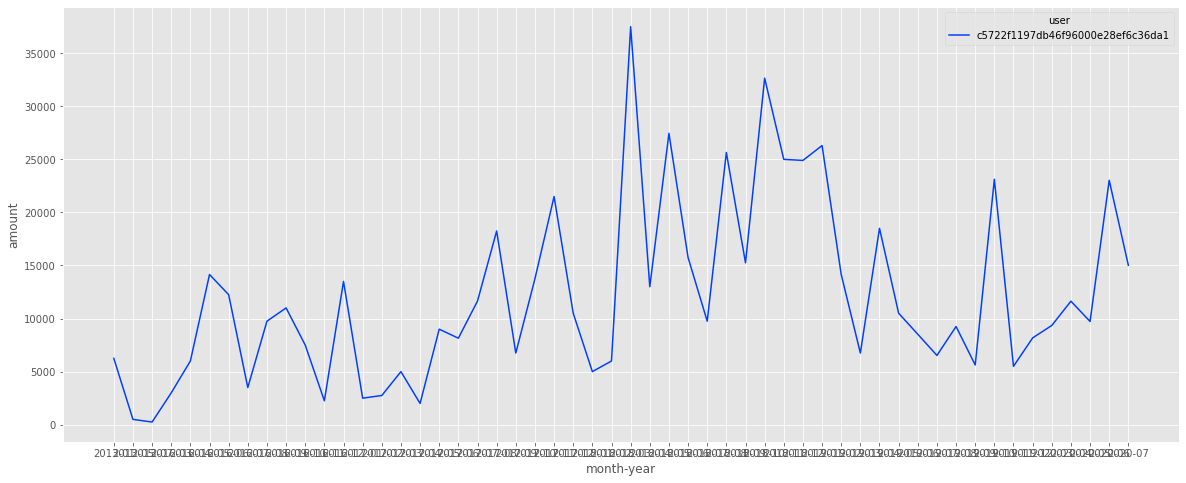

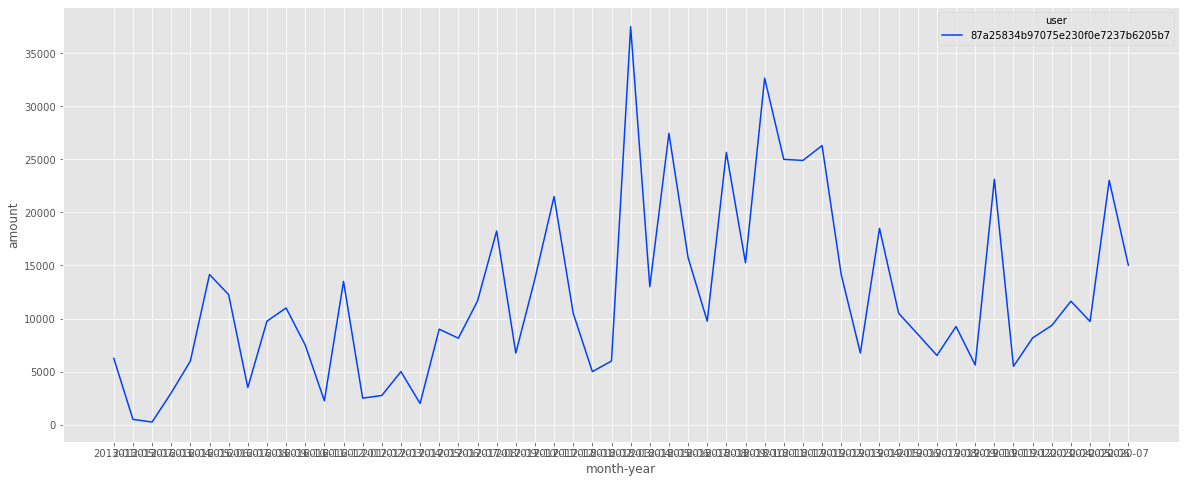

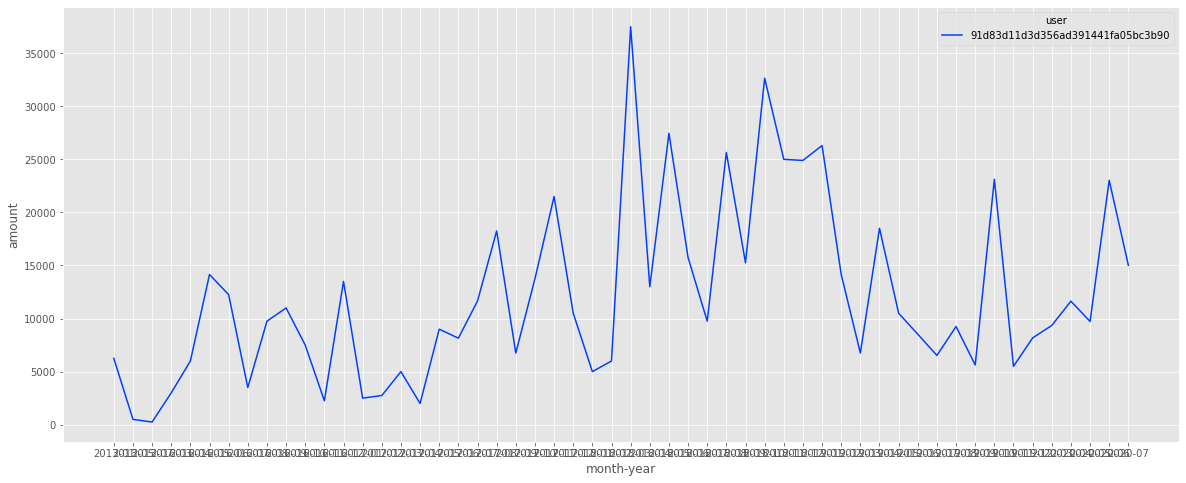

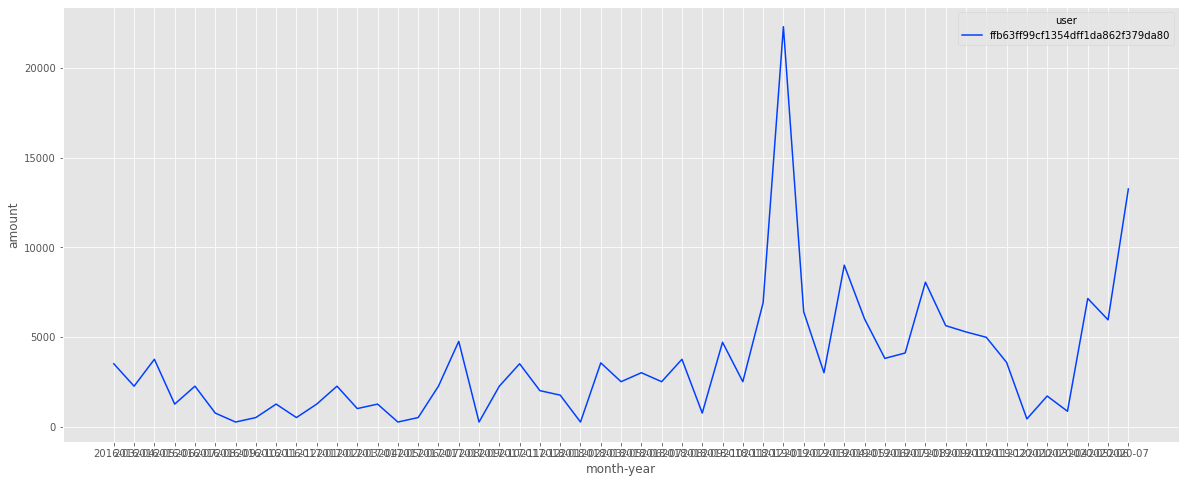

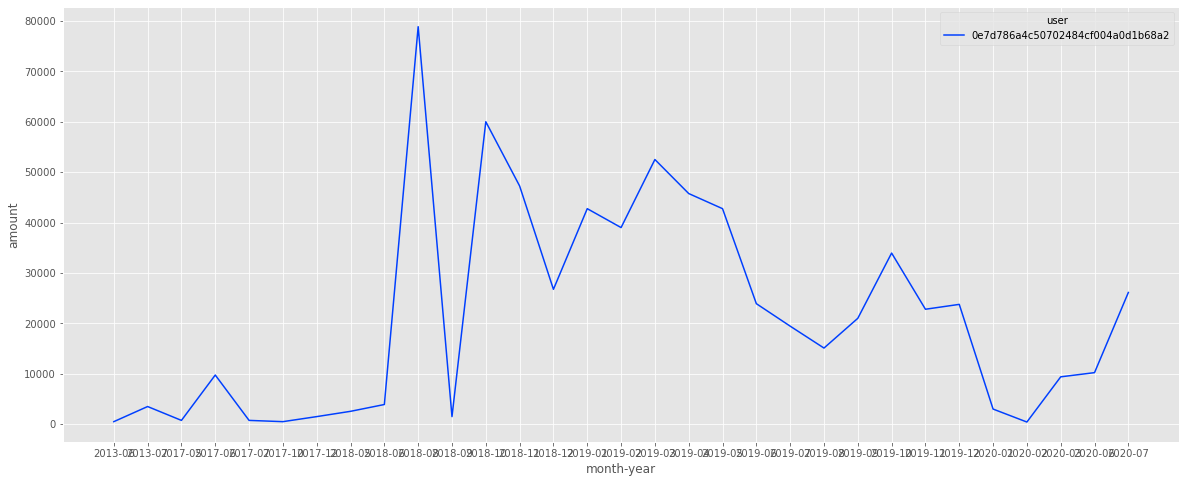

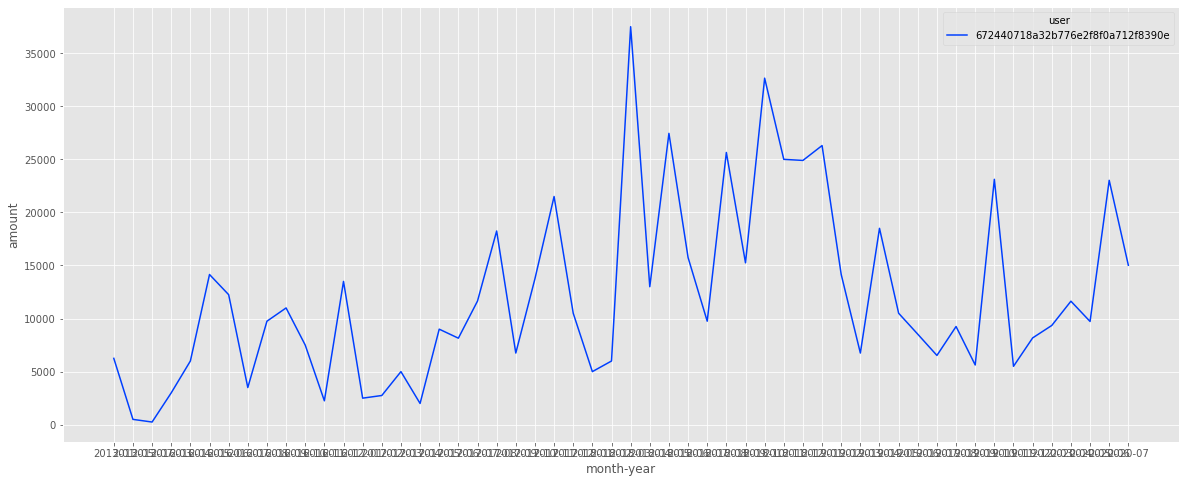

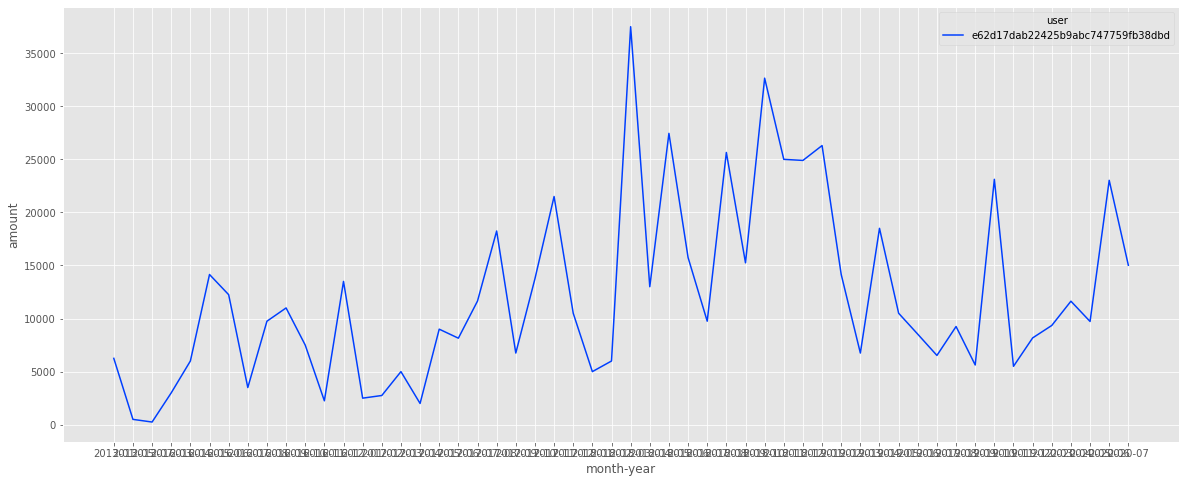

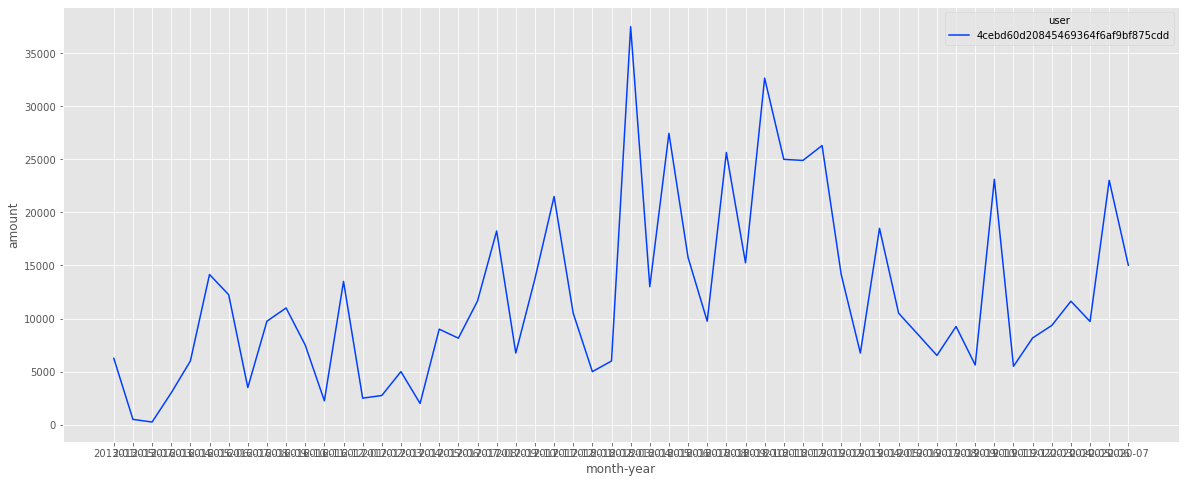

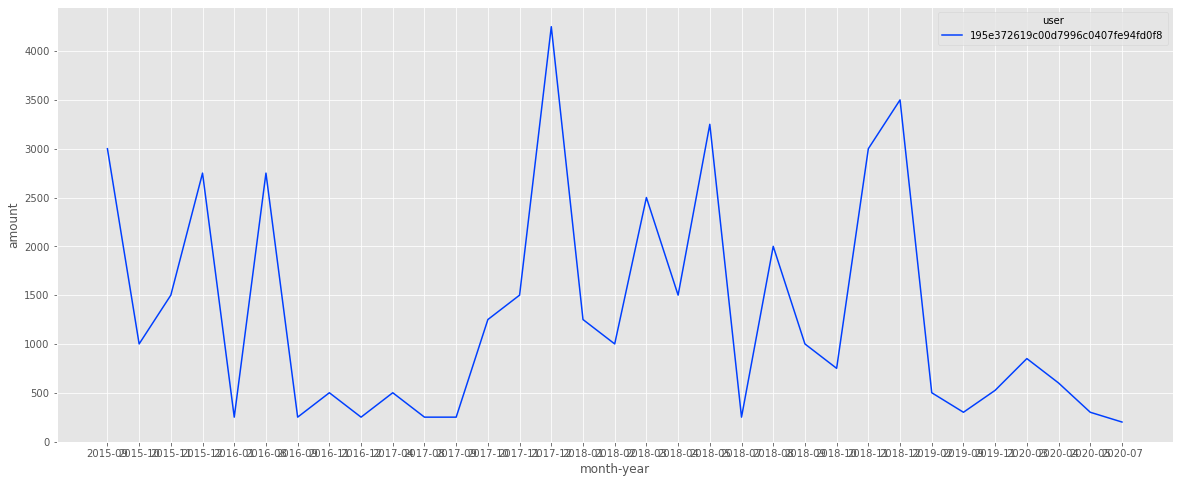

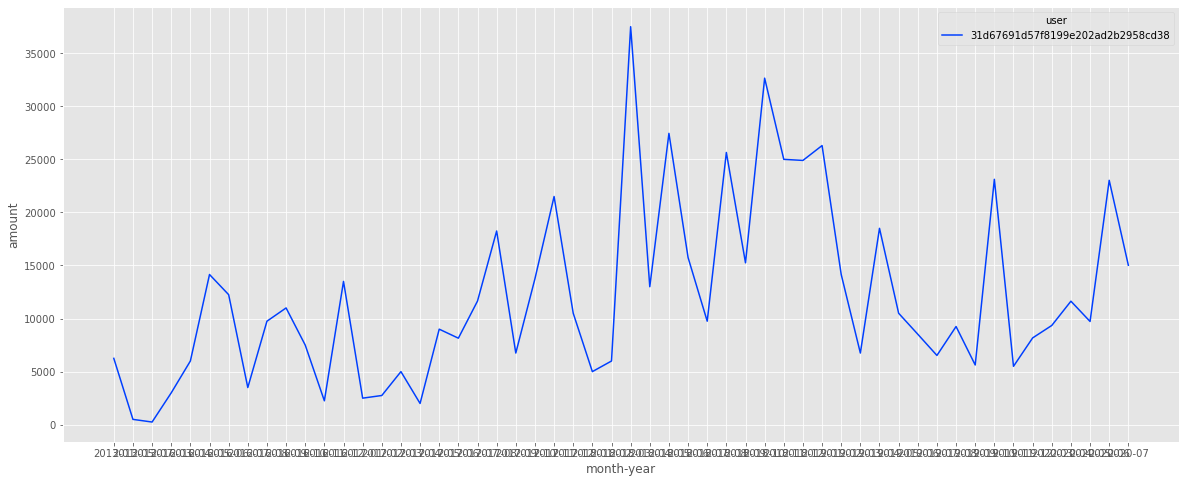

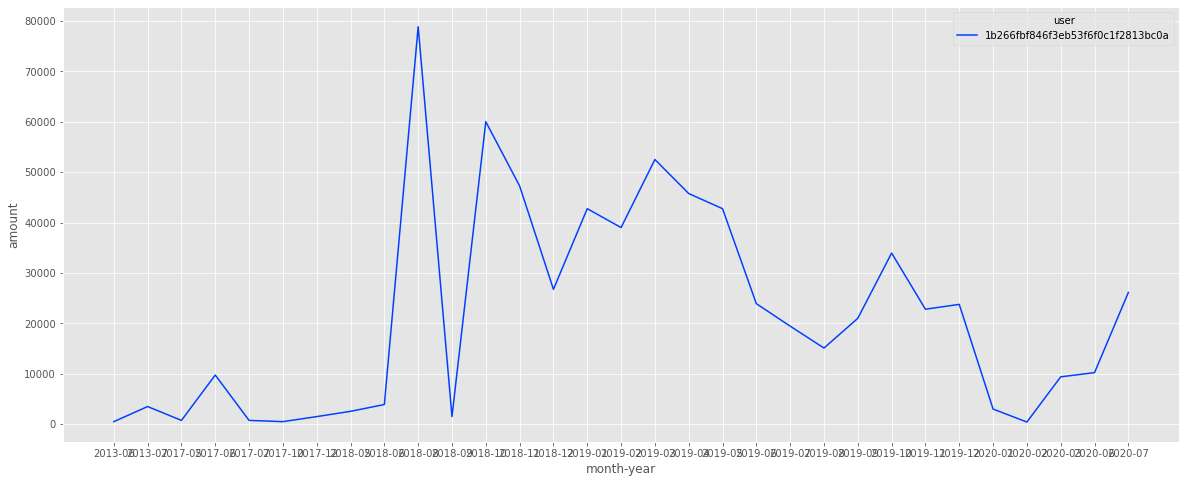

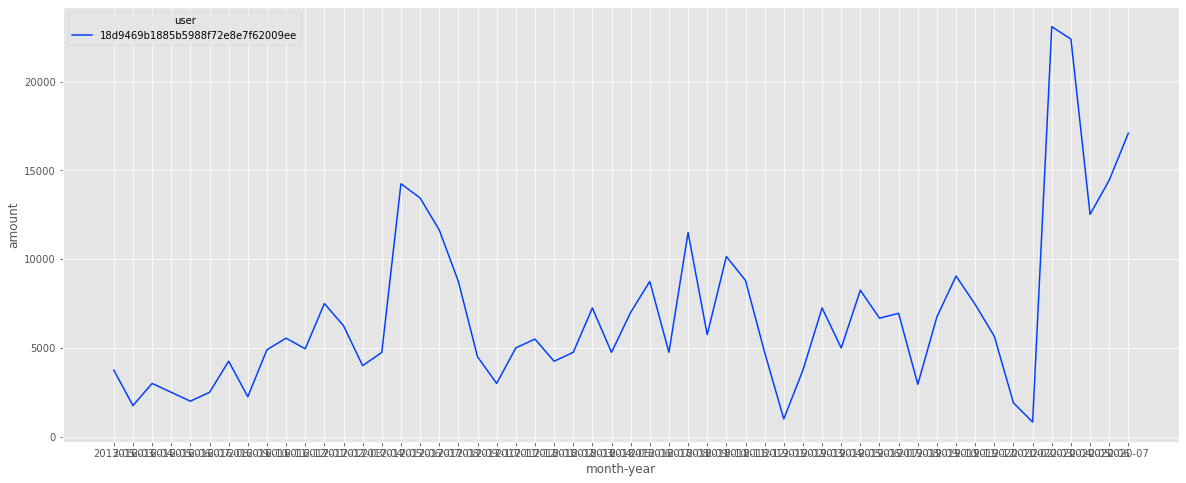

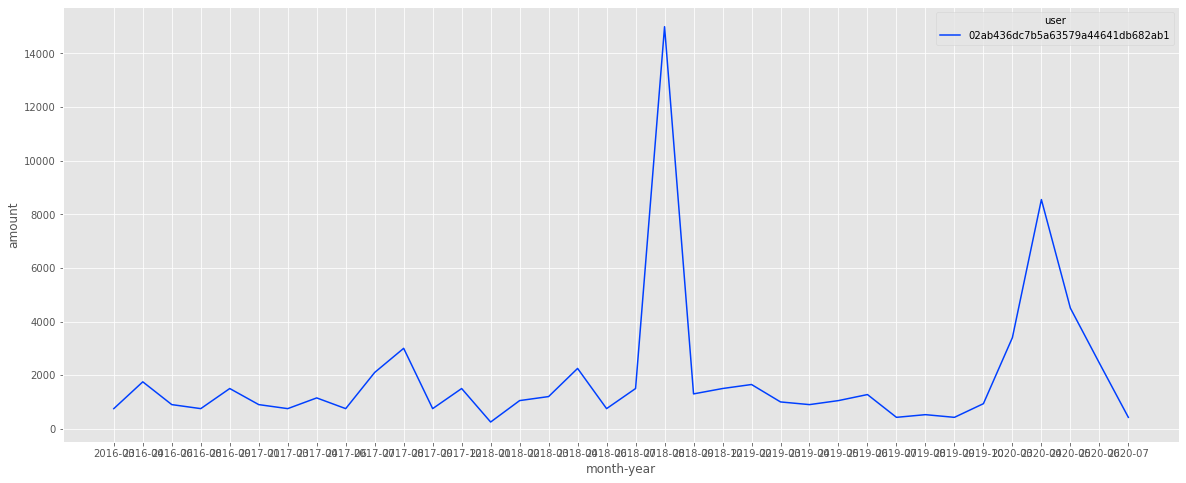

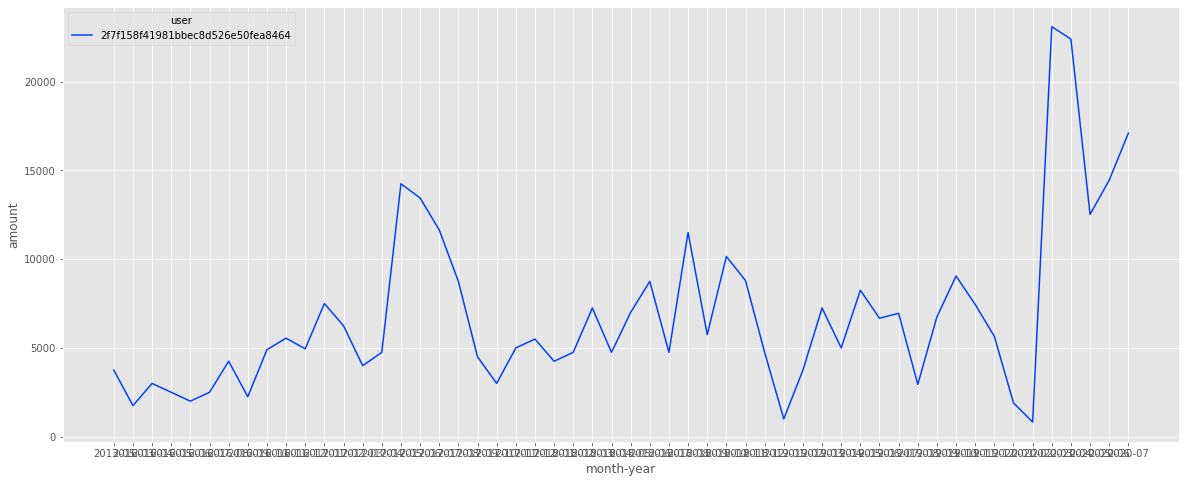

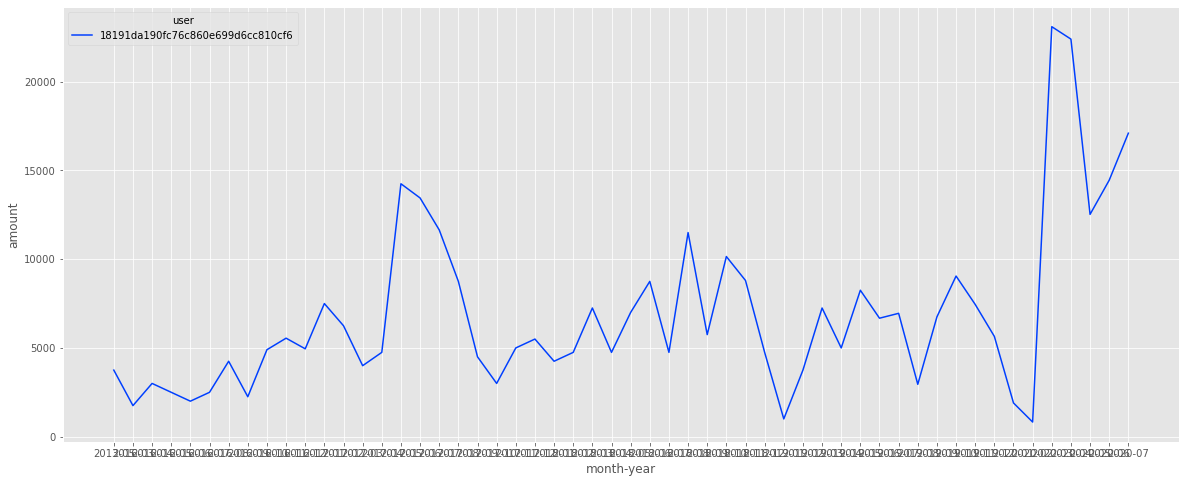

In [64]:

for user in extra_gb_mostly_used_users:
    user_usage_dict = extra_gb_freq_users[(extra_gb_freq_users["event_source.hash"]==user)]["BB_Extra_GB_Month_vs_Rental"].tolist()[0]
    if not isinstance (user_usage_dict, float) or user_usage_dict != "NO_INFO":
        user_usage_df =  pd.DataFrame(literal_eval(user_usage_dict).items(), columns=["month-year","amount"])
        user_usage_df["user"] = user
        user_usage_df.sort_values('month-year', inplace=True)
        plt.figure(figsize=(20,8))
        sns.lineplot(data=user_usage_df,hue='user',x='month-year', y='amount')
        

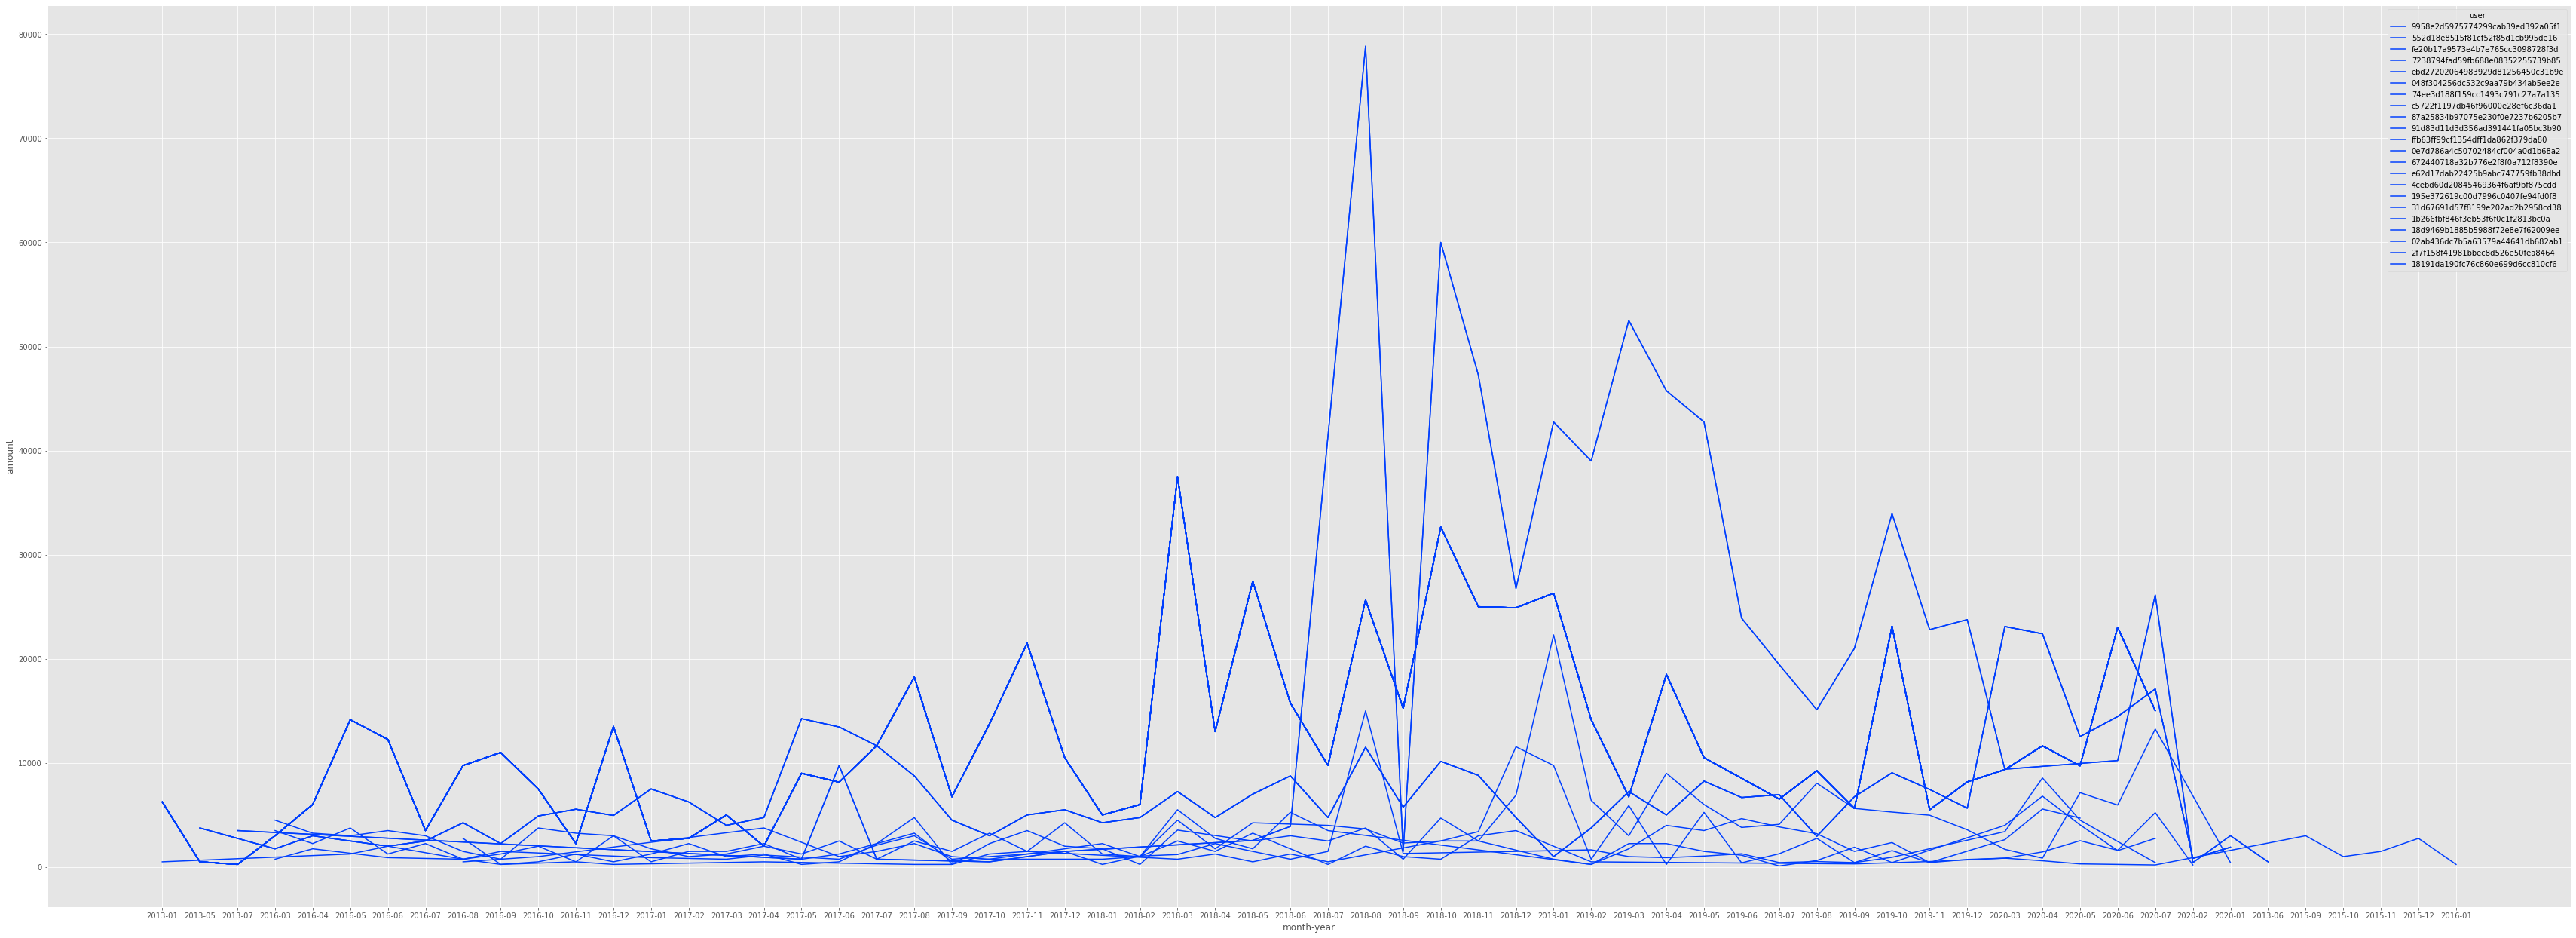

In [65]:
plt.figure(figsize=(60,22))
for user in extra_gb_mostly_used_users:
    user_usage_dict = extra_gb_freq_users[(extra_gb_freq_users["event_source.hash"]==user)]["BB_Extra_GB_Month_vs_Rental"].tolist()[0]
    if not isinstance (user_usage_dict, float) or user_usage_dict != "NO_INFO":
        user_usage_df =  pd.DataFrame(literal_eval(user_usage_dict).items(), columns=["month-year","amount"])
        user_usage_df["user"] = user
        user_usage_df.sort_values('month-year',inplace=True)
        sns.lineplot(data=user_usage_df,hue='user',x='month-year', y='amount')

## User Location

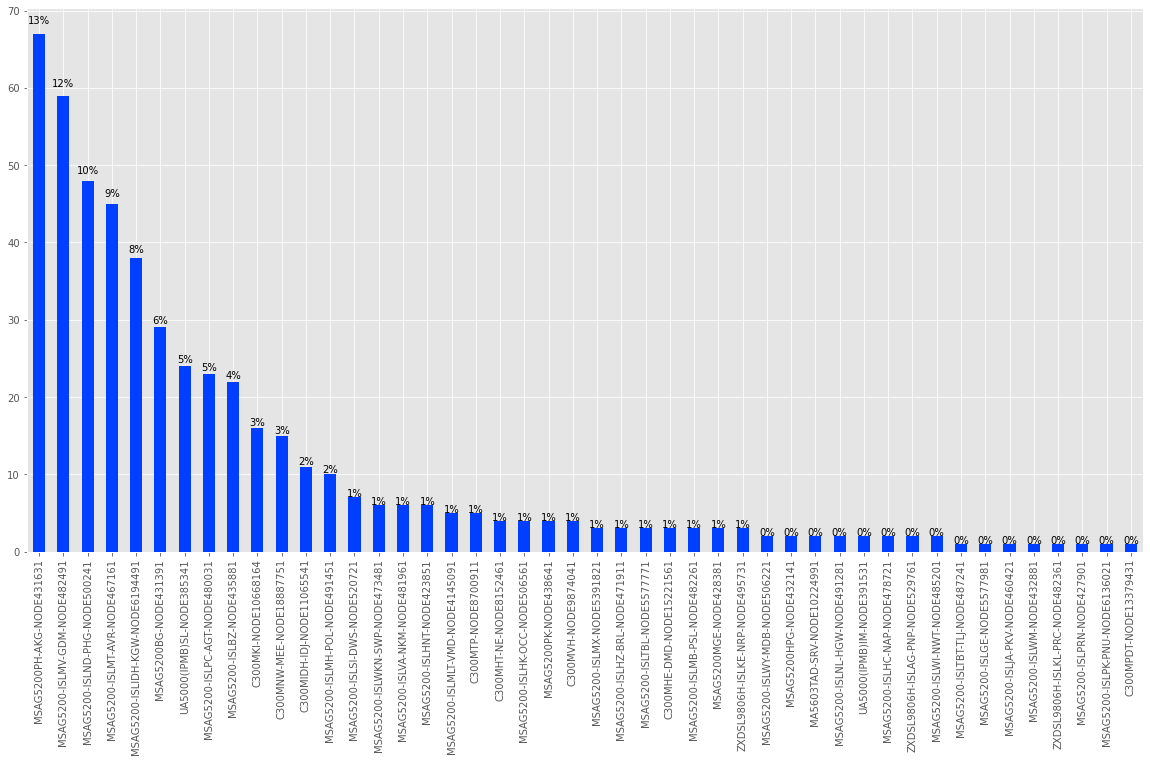

In [66]:
ax =cluster_0["Location_Identifier"].value_counts().plot(kind='bar', figsize=(20,10))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

#### User locations of Triply play customers

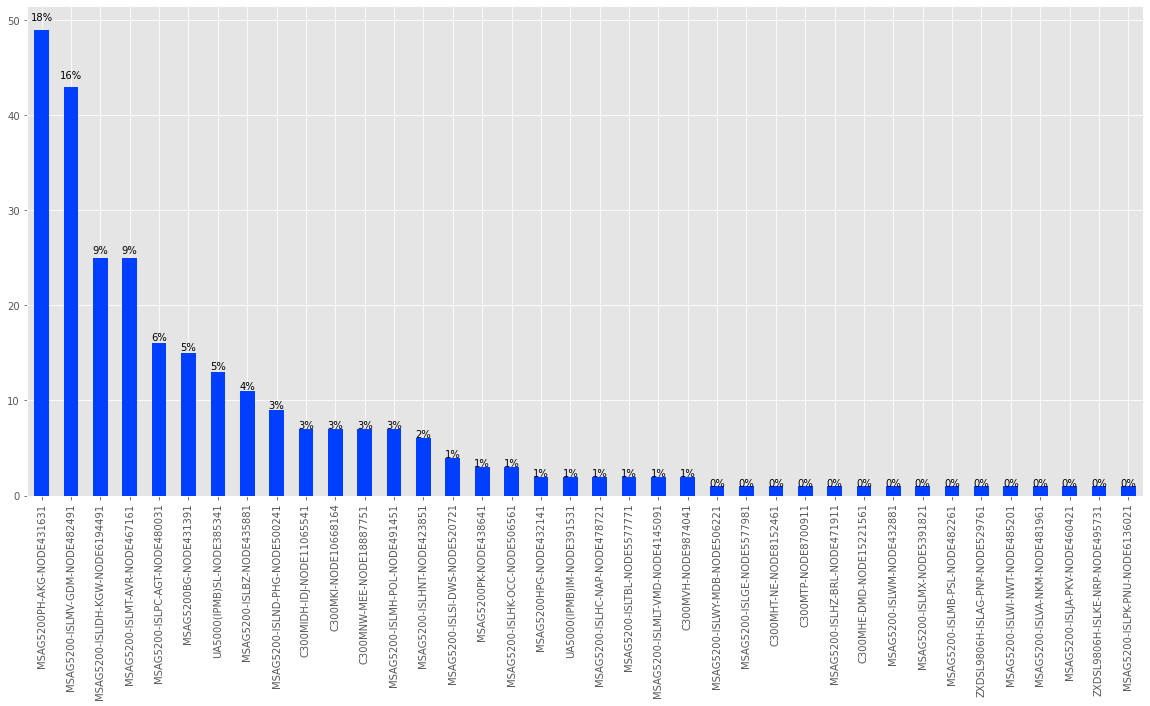

In [67]:
ax =cluster_0_peo["Location_Identifier"].value_counts().plot(kind='bar', figsize=(20,9))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

#### User locations of double play PV customers

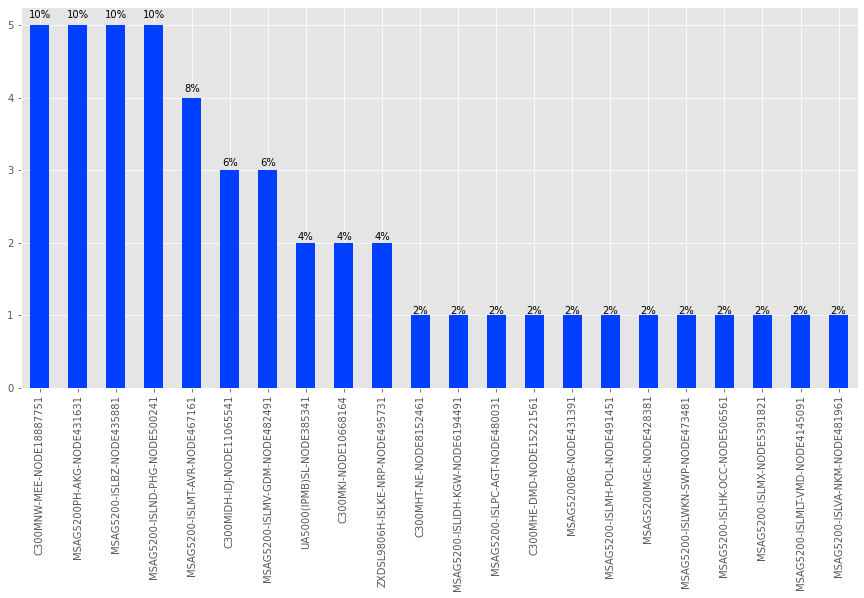

In [68]:
ax =cluster_0_peo_pv["Location_Identifier"].value_counts().plot(kind='bar', figsize=(15,7))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

#### User locations of double play BV customers

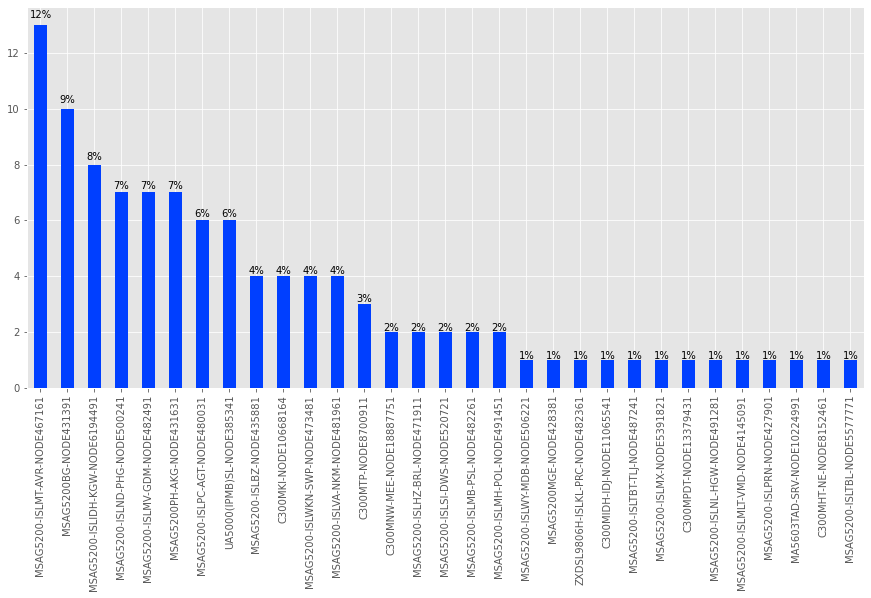

In [69]:
ax =cluster_0_bb_dp["Location_Identifier"].value_counts().plot(kind='bar', figsize=(15,7))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

#### IDD Usage among locations

<AxesSubplot:xlabel='Location_Identifier'>

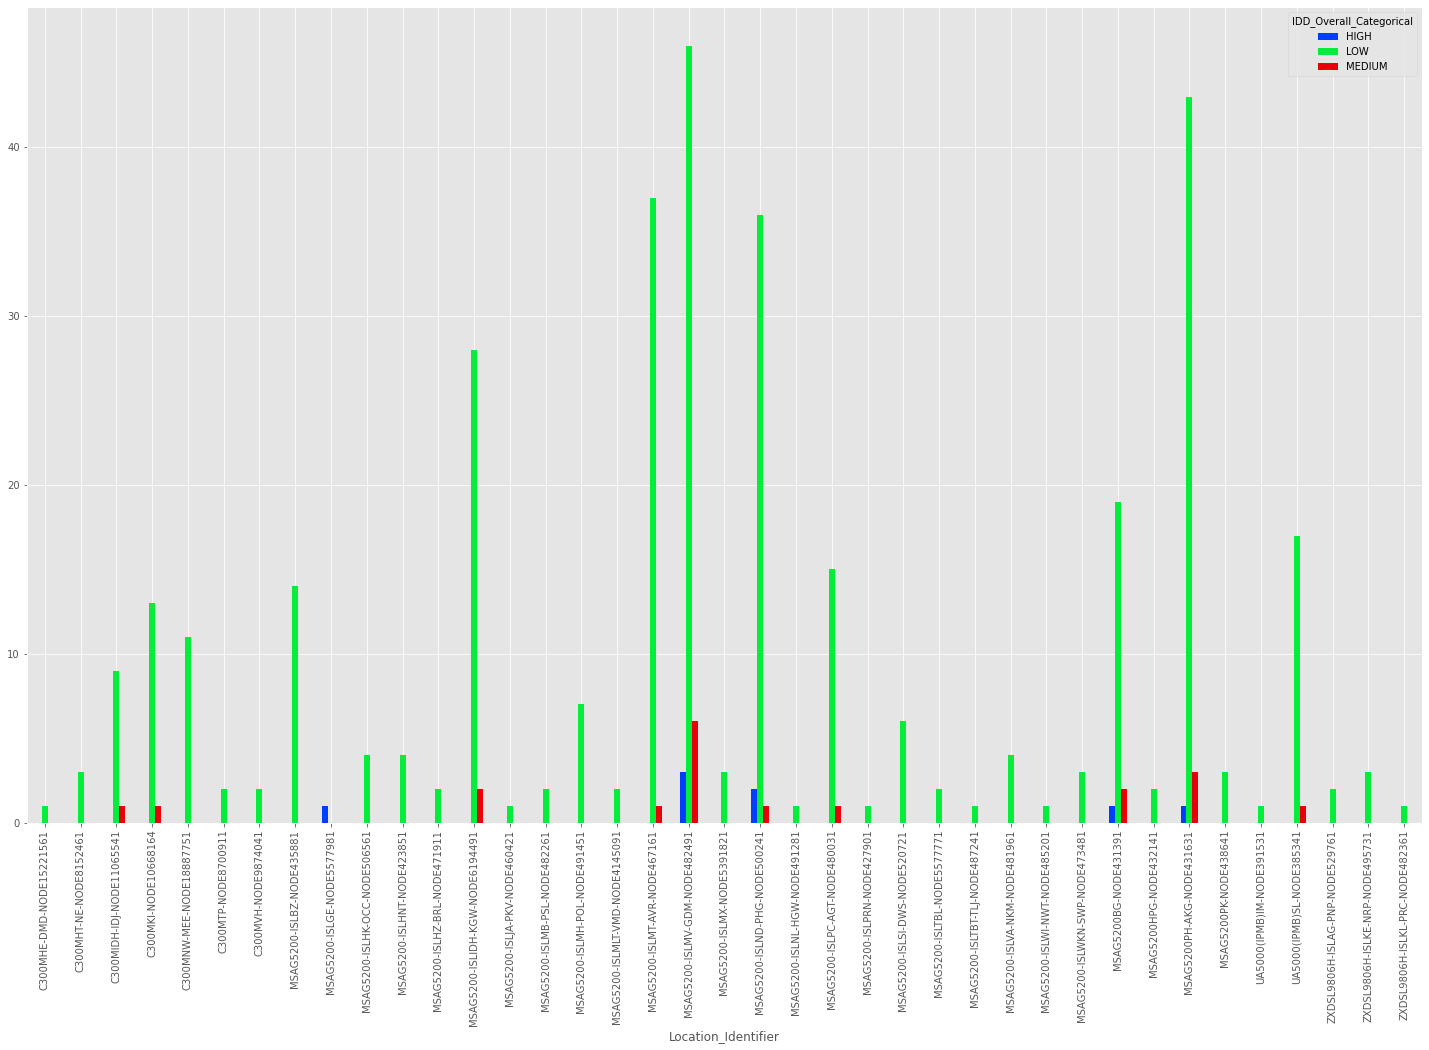

In [130]:
#ax =cluster_0[["IDD_Overall_Categorical","Location_Identifier"]].value_counts().plot(kind='bar', figsize=(15,7))

cluster_0[((cluster_0["Location_Identifier"] != "NO_INFO") & (cluster_0["IDD_Overall_Categorical"] != "NO_INFO"))].groupby(["Location_Identifier","IDD_Overall_Categorical"]).size().unstack().plot.bar(figsize=(25,15))

#### Peo TV Usage among locations

<ipython-input-71-fc08a43123d8>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[Text(0, 0, 'MSAG5200-ISLHK-OCC-NODE506561'),
 Text(1, 0, 'MSAG5200-ISLHC-NAP-NODE478721'),
 Text(2, 0, 'MSAG5200-ISLWI-NWT-NODE485201'),
 Text(3, 0, 'MSAG5200PK-NODE438641'),
 Text(4, 0, 'MSAG5200-ISLND-PHG-NODE500241'),
 Text(5, 0, 'MSAG5200-ISLSI-DWS-NODE520721'),
 Text(6, 0, 'C300MKI-NODE10668164'),
 Text(7, 0, 'C300MIDH-IDJ-NODE11065541'),
 Text(8, 0, 'MSAG5200-ISLIDH-KGW-NODE6194491'),
 Text(9, 0, 'MSAG5200-ISLMV-GDM-NODE482491'),
 Text(10, 0, 'MSAG5200-ISLPK-PNU-NODE6136021'),
 Text(11, 0, 'MSAG5200-ISLMLT-VMD-NODE4145091'),
 Text(12, 0, 'MSAG5200-ISLJA-PKV-NODE460421'),
 Text(13, 0, 'MSAG5200-ISLPRN-NODE427901'),
 Text(14, 0, 'MSAG5200-ISLMB-PSL-NODE482261'),
 Text(15, 0, 'MSAG5200-ISLVA-NKM-NODE481961'),
 Text(16, 0, 'MA5603TAD-SRV-NODE10224991'),
 Text(17, 0, 'MSAG5200-ISLTBT-TLJ-NODE487241'),
 Text(18, 0, 'MSAG5200-ISLWKN-SWP-NODE473481'),
 Text(19, 0, 'UA5000(IPMB)SL-NODE385341'),
 Text(20, 0, 'MSAG5200-ISLMX-NODE5391821'),
 Text(21, 0, 'MSAG5200-ISLGE-NODE5577981'),
 Text(

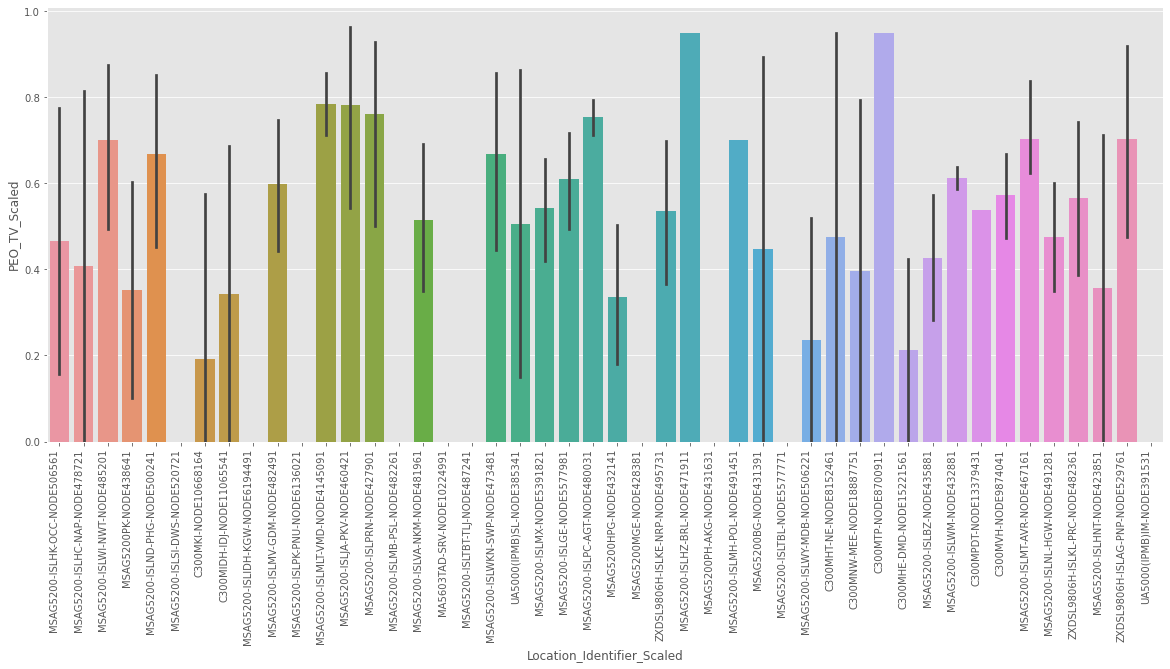

In [71]:
plt.figure(figsize=(20,8))
location_peo_df = cluster_0[["event_source.hash","Location_Identifier","PEO_TV_Scaled"]]
location_peo_df["Location_Identifier_Scaled"] = location_peo_df["Location_Identifier"].astype("category").cat.codes
loc_peo_bar_plot = sns.barplot(data=location_peo_df,x='Location_Identifier_Scaled', y='PEO_TV_Scaled')

loc_peo_bar_plot.set_xticklabels(location_peo_df["Location_Identifier"].unique(), 
                          rotation=90, 
                          horizontalalignment='right')

#### Popularity of PeoTV Packages among Locations

In [72]:
location_arr = cluster_0["Location_Identifier"].unique()

<ipython-input-73-5bf5f974f3db>:3: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



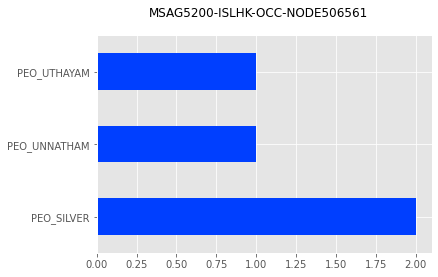

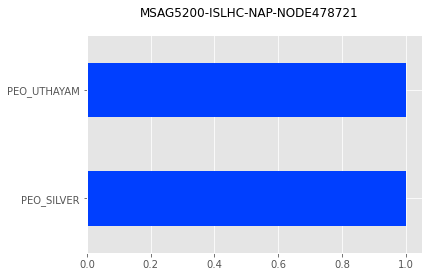

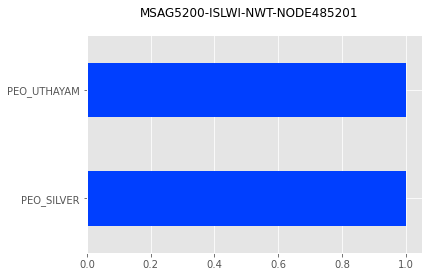

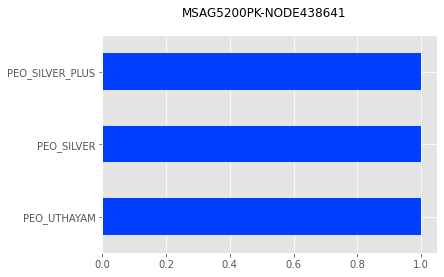

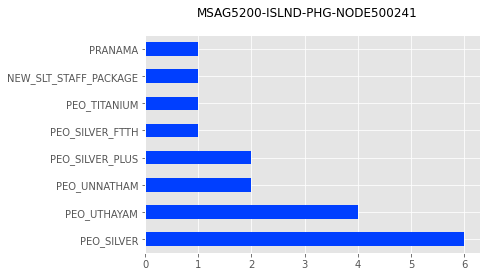

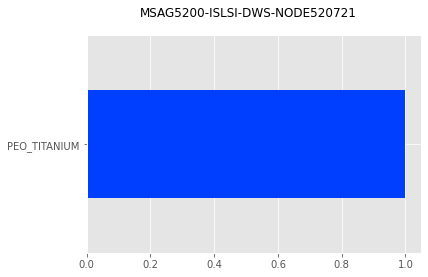

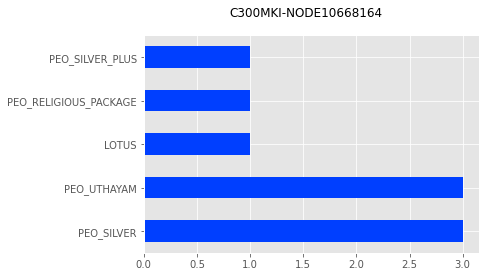

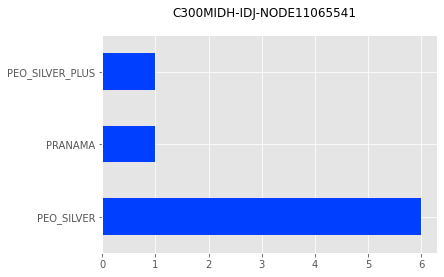

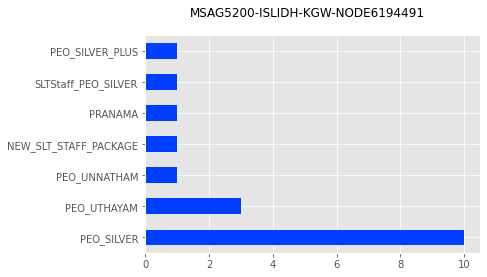

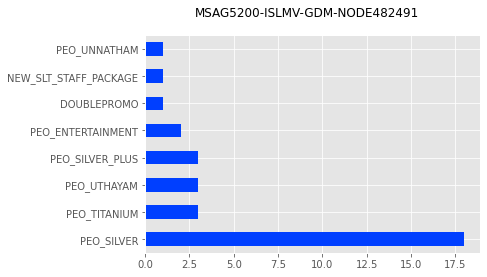

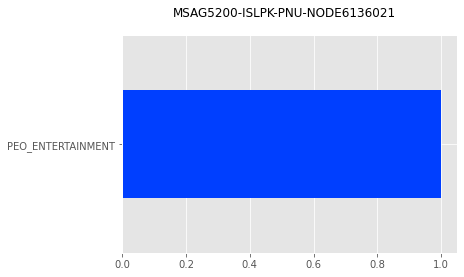

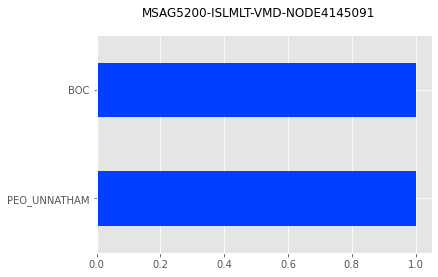

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

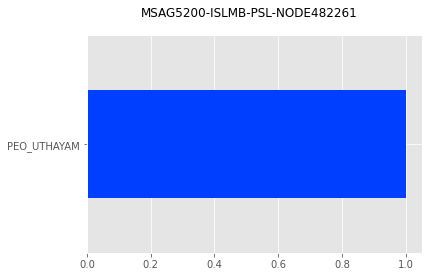

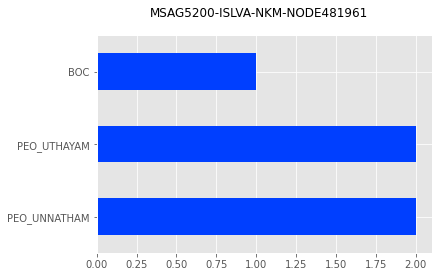

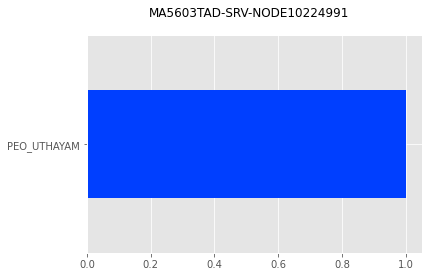

<Figure size 432x288 with 0 Axes>

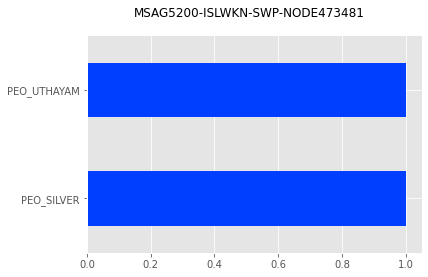

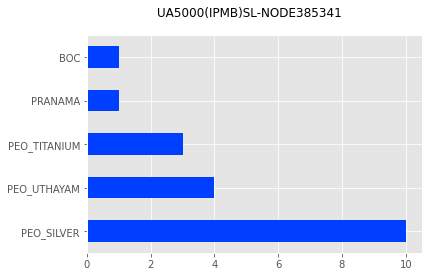

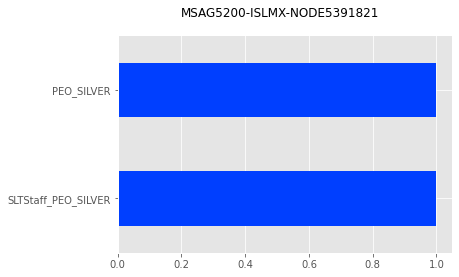

<Figure size 432x288 with 0 Axes>

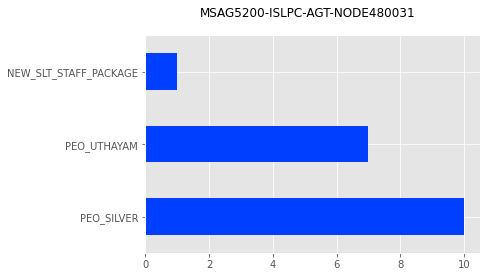

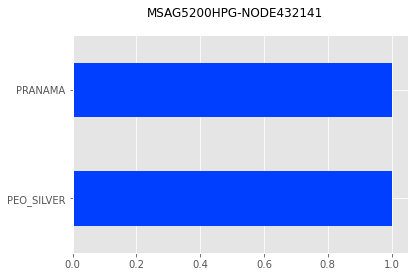

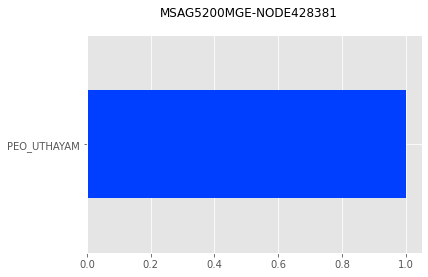

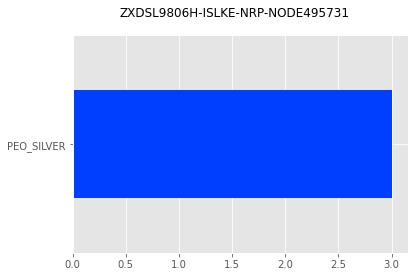

<Figure size 432x288 with 0 Axes>

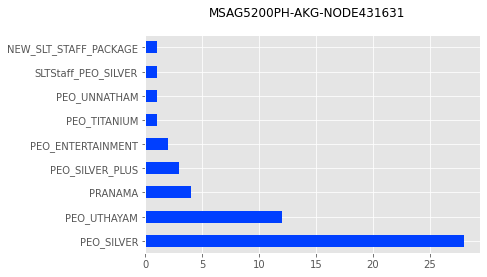

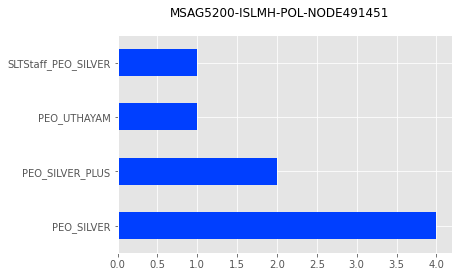

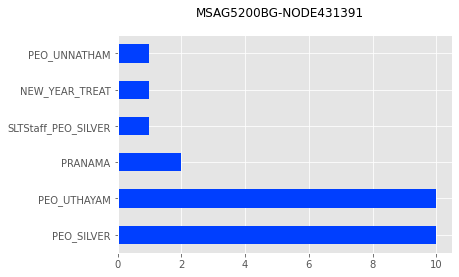

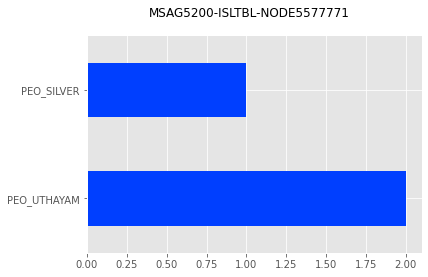

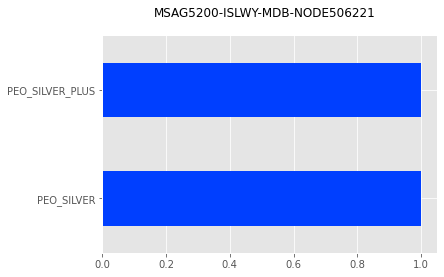

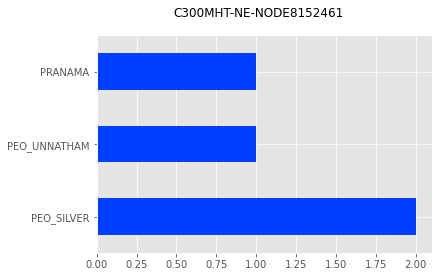

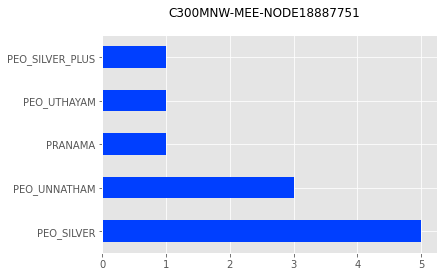

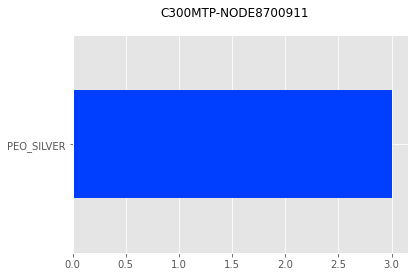

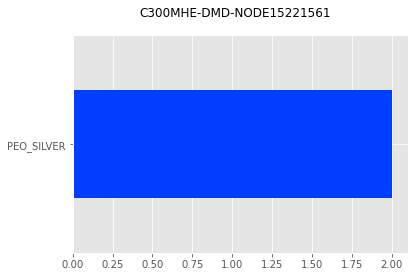

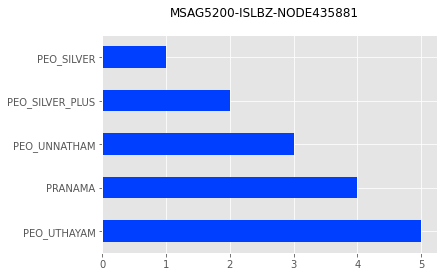

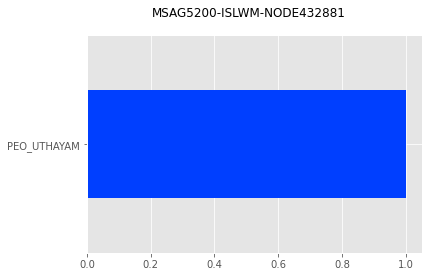

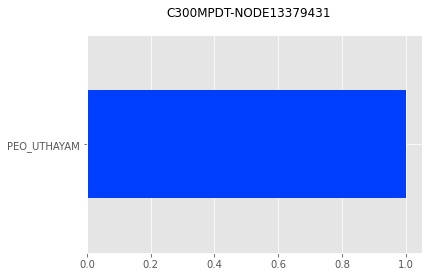

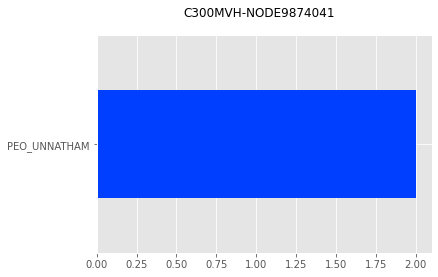

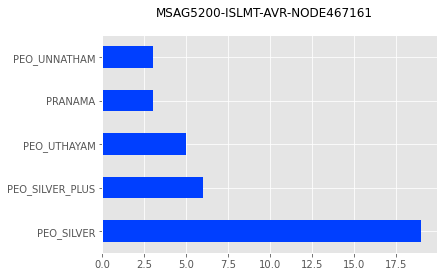

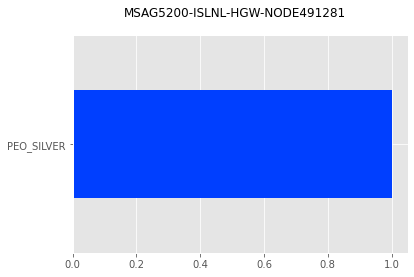

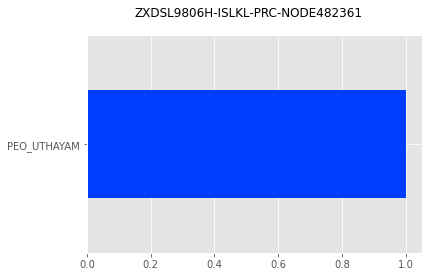

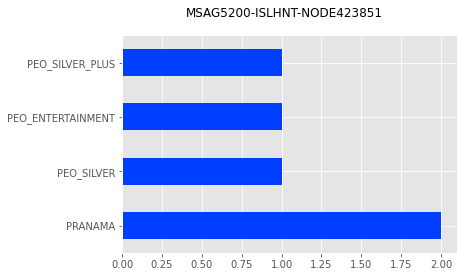

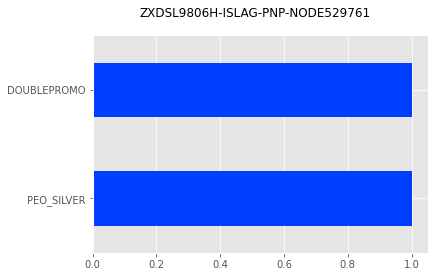

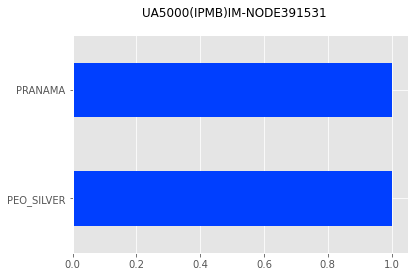

In [73]:
for loc in location_arr:
    user_loc_df = cluster_0[((cluster_0["Location_Identifier"]==loc) & (cluster_0["Peo_TV_Package"] != "NO_INFO"))]
    plt.figure(figsize=(6,4))
    plt.suptitle(loc)
    if (len(user_loc_df["Peo_TV_Package"].value_counts()) > 0):
        user_loc_df["Peo_TV_Package"].value_counts().plot(kind='barh', label=loc)

#### Popularity of PeoTV VAS Packages among Locations

<ipython-input-74-89e206bfdebb>:3: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



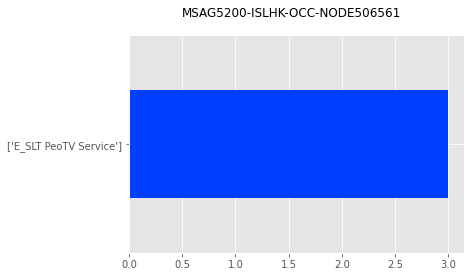

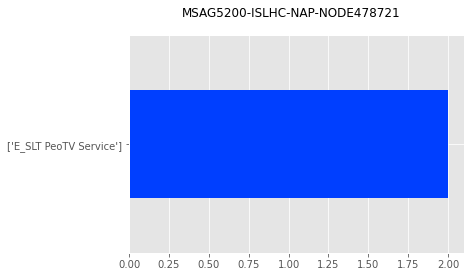

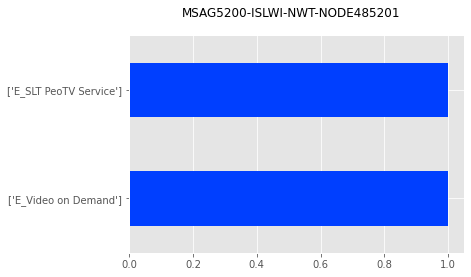

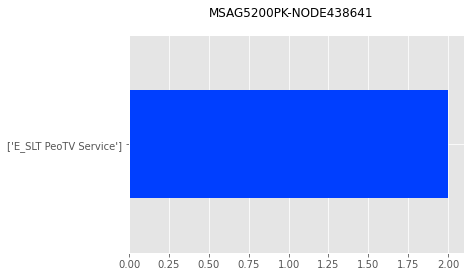

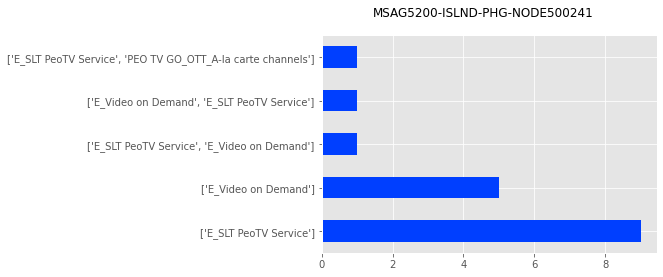

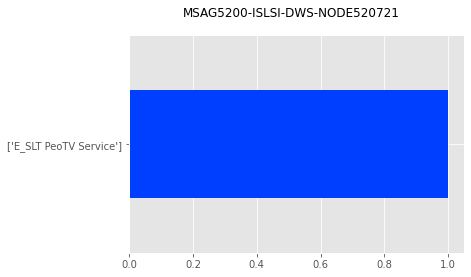

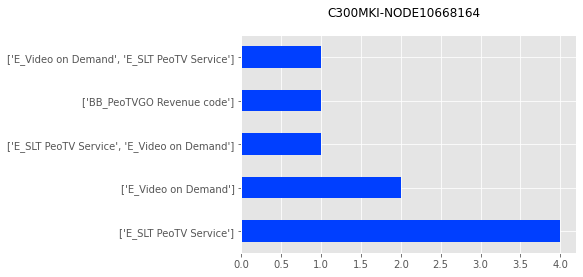

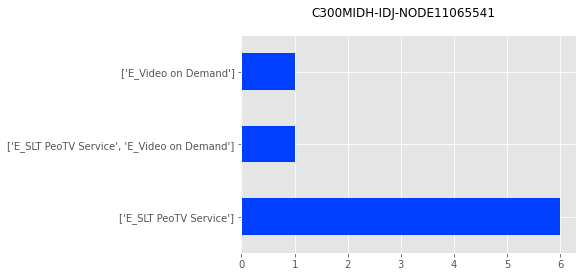

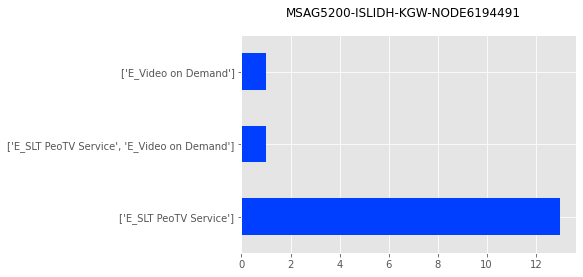

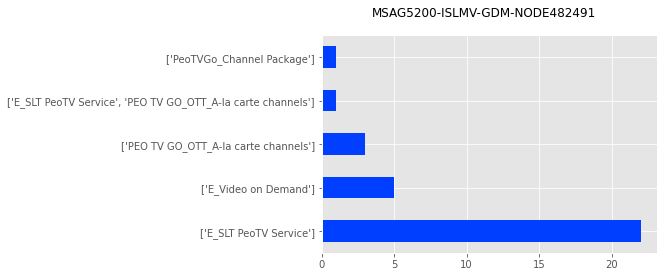

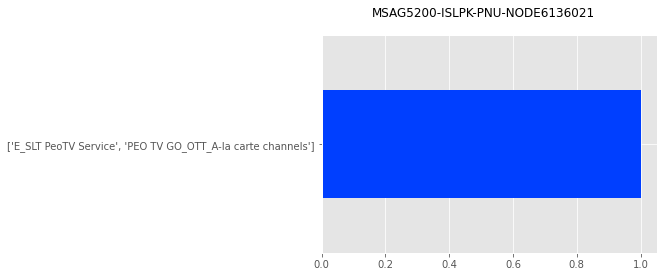

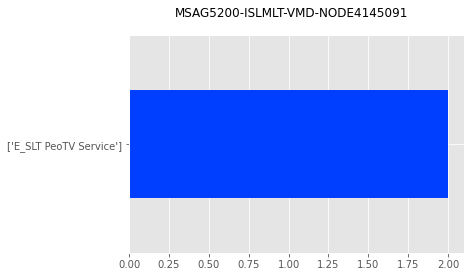

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

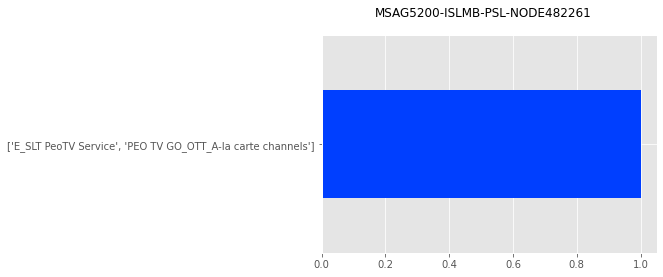

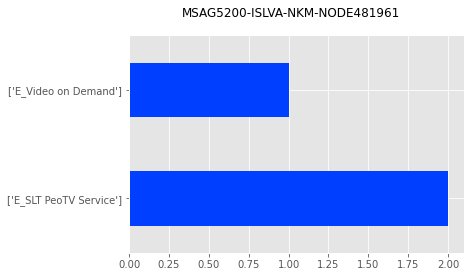

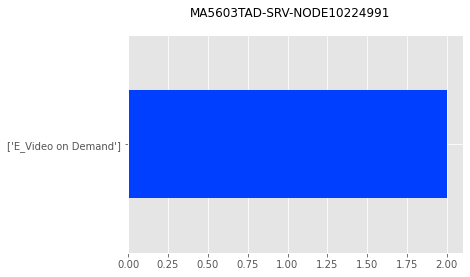

<Figure size 432x288 with 0 Axes>

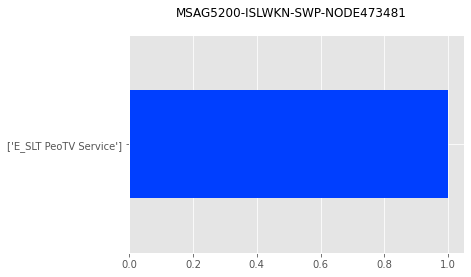

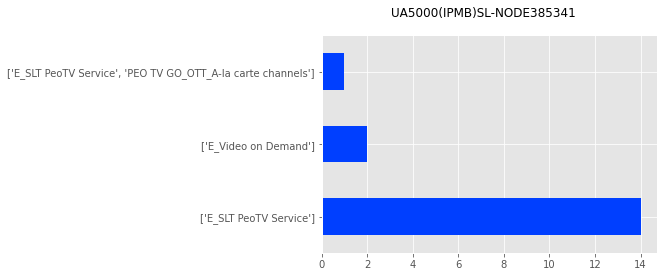

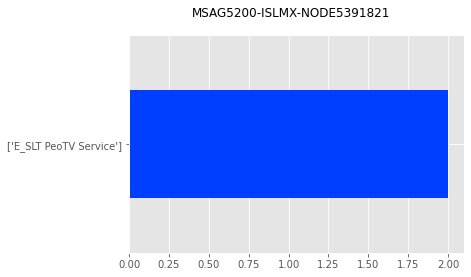

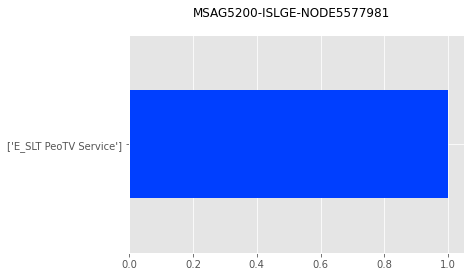

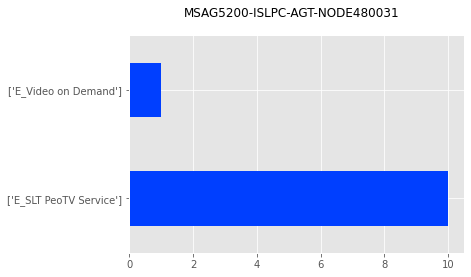

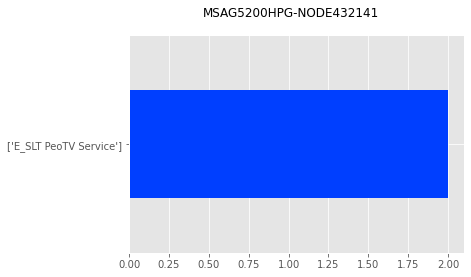

<Figure size 432x288 with 0 Axes>

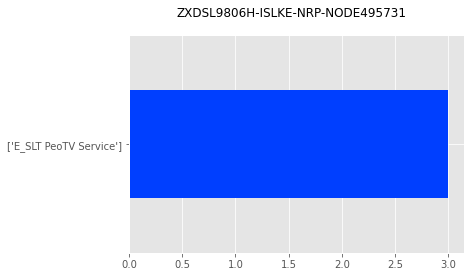

<Figure size 432x288 with 0 Axes>

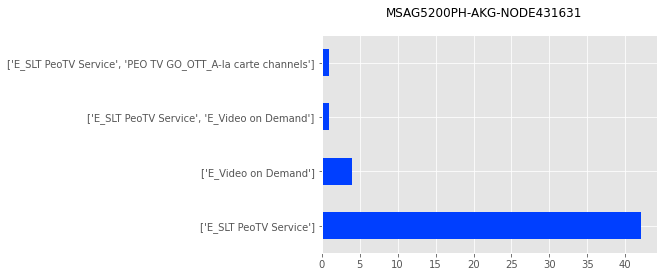

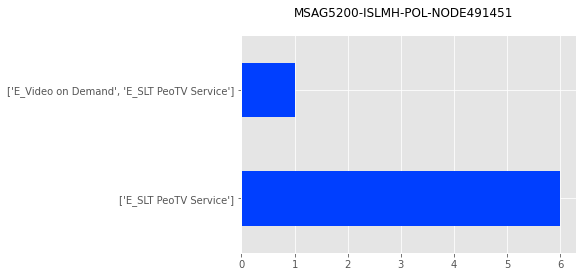

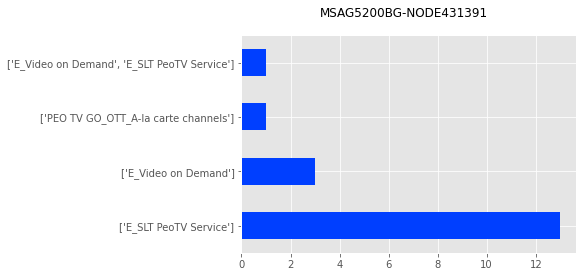

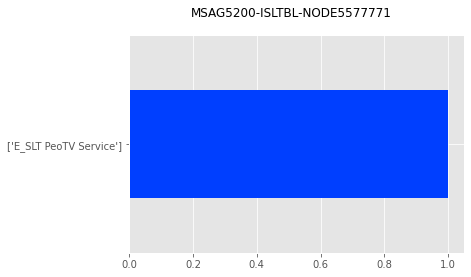

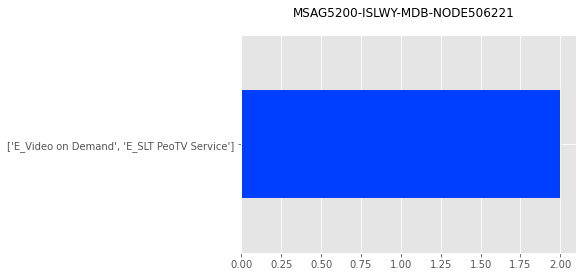

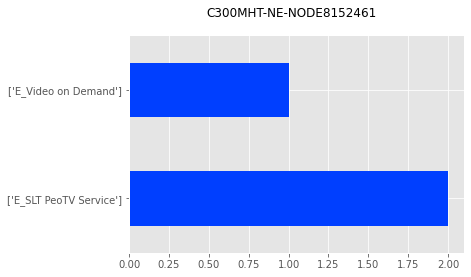

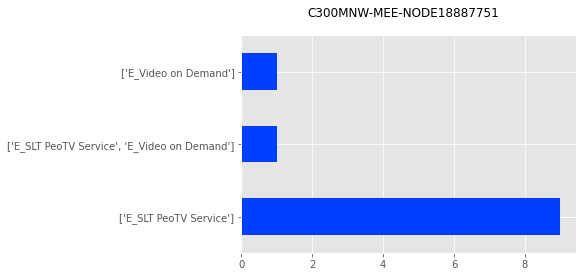

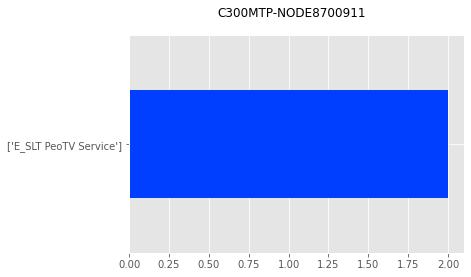

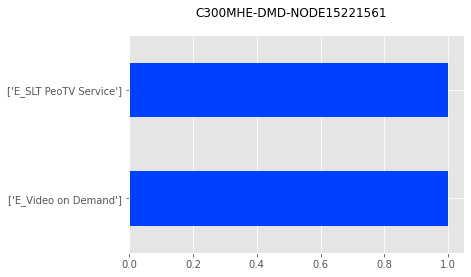

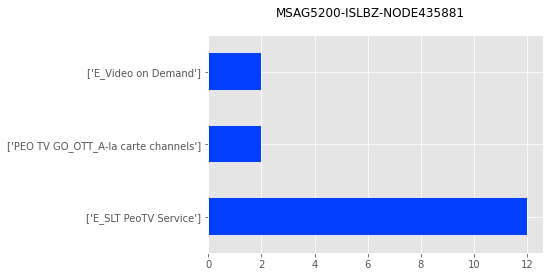

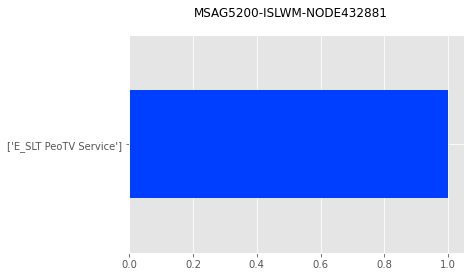

<Figure size 432x288 with 0 Axes>

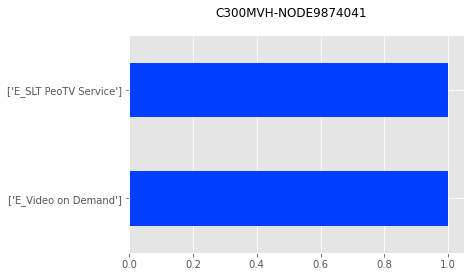

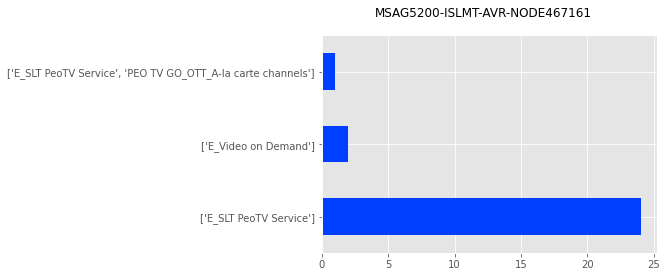

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

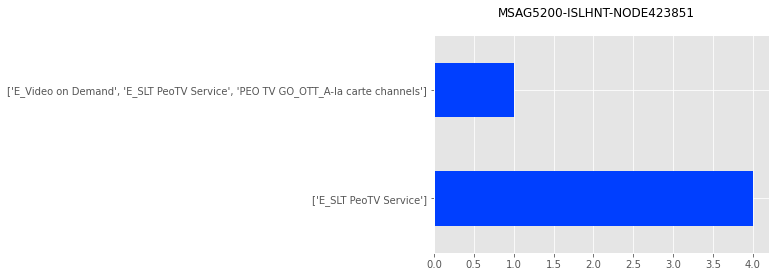

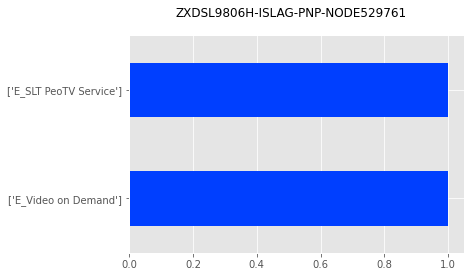

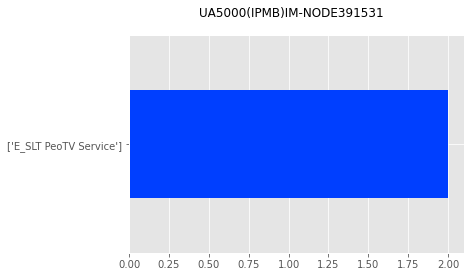

In [74]:
for loc in location_arr:
    user_loc_df = cluster_0[((cluster_0["Location_Identifier"]==loc) & (cluster_0["Peo_VAS_Package"] != "NO_INFO"))]
    plt.figure(figsize=(6,4))
    plt.suptitle(loc)
    if (len(user_loc_df["Peo_VAS_Package"].value_counts()) > 0):
        user_loc_df["Peo_VAS_Package"].value_counts().plot(kind='barh', label=loc)

#### Popularity of BB VAS Packages among Locations

<ipython-input-75-d0c3ce37ea15>:3: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



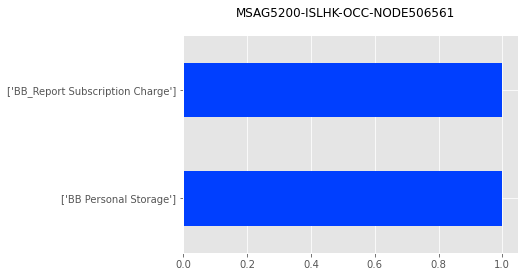

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

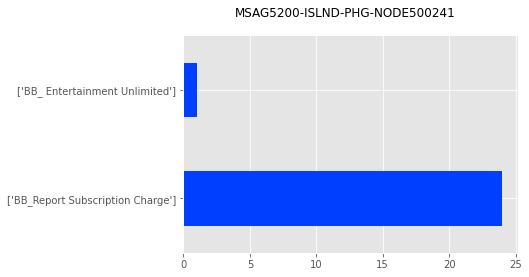

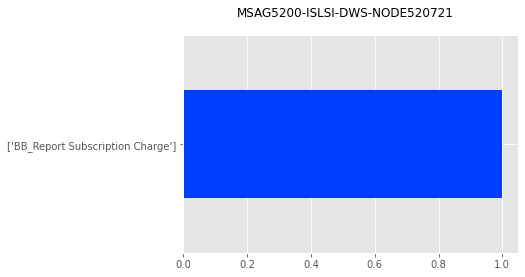

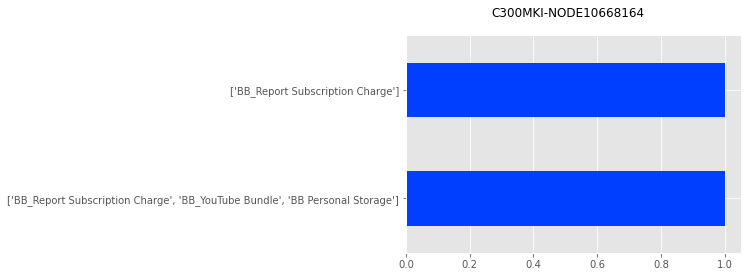

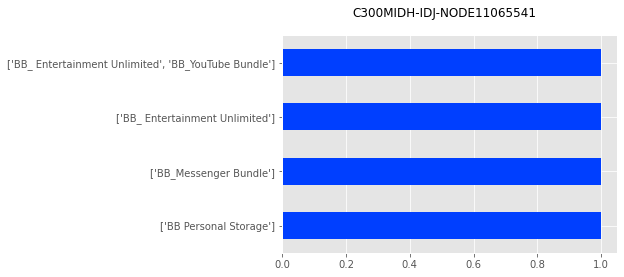

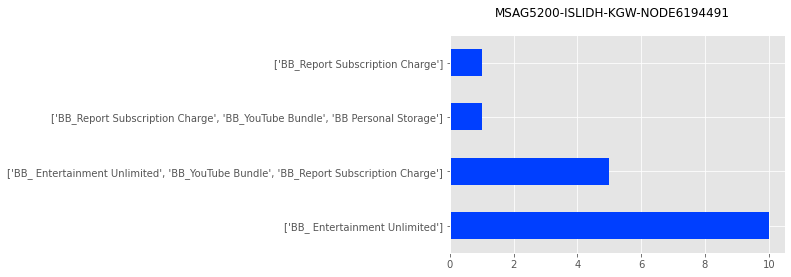

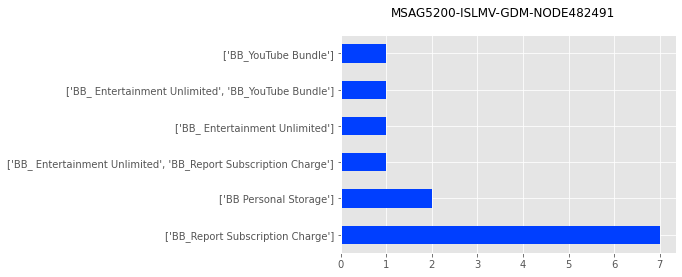

<Figure size 432x288 with 0 Axes>

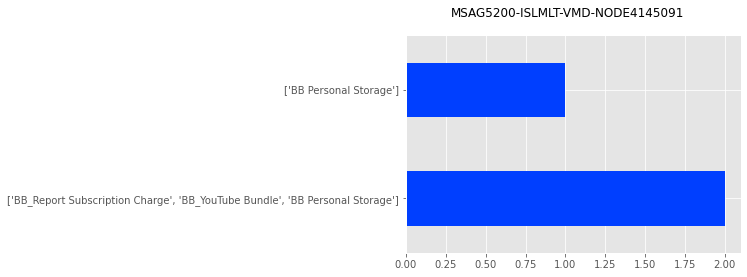

<Figure size 432x288 with 0 Axes>

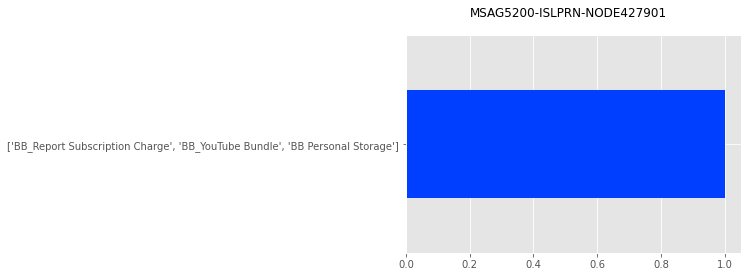

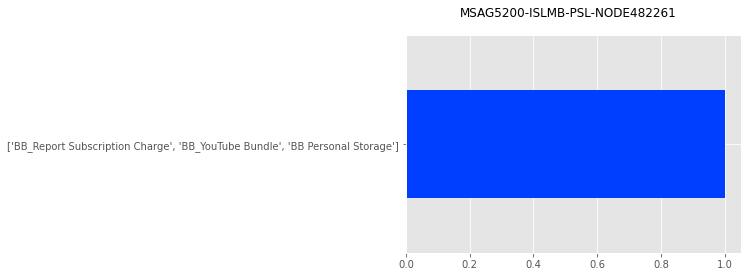

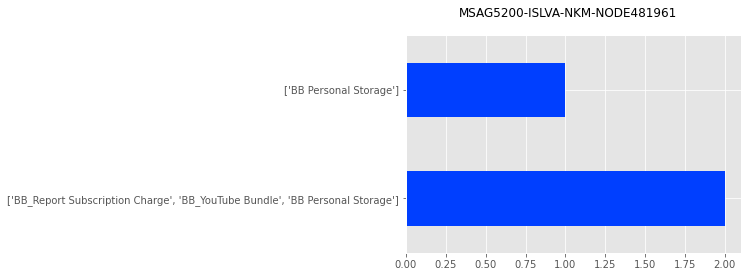

<Figure size 432x288 with 0 Axes>

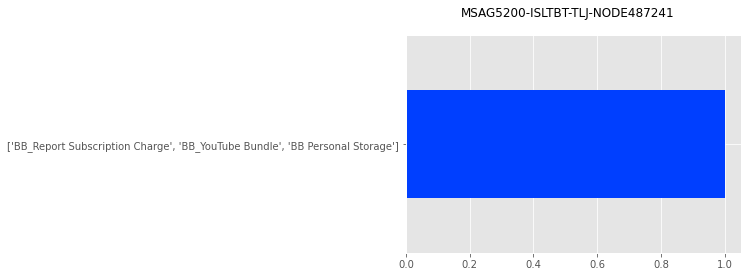

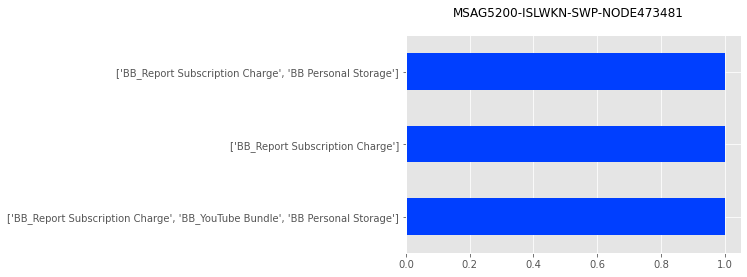

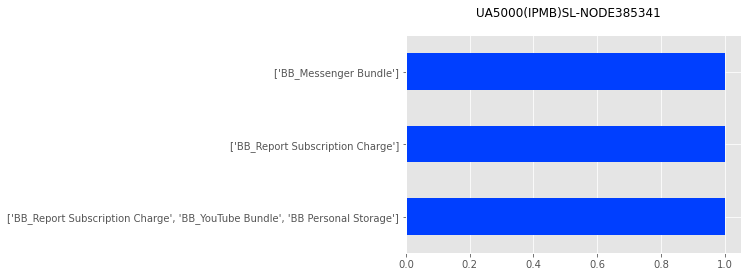

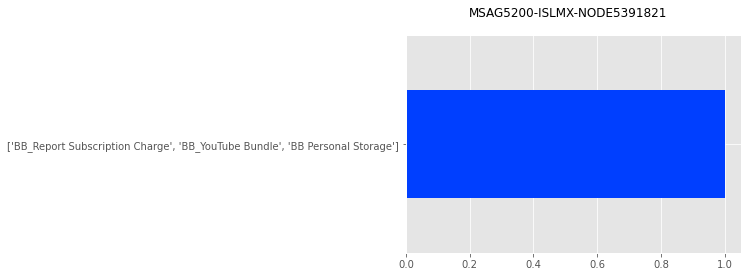

<Figure size 432x288 with 0 Axes>

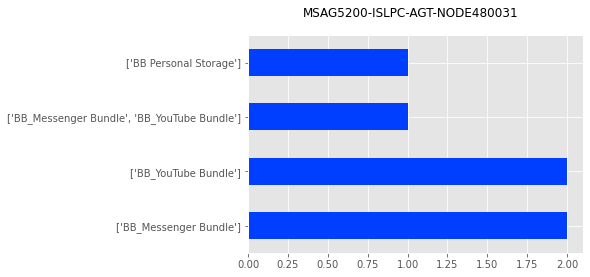

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

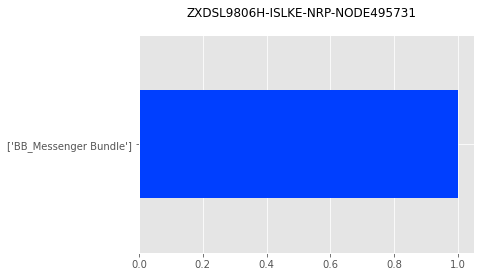

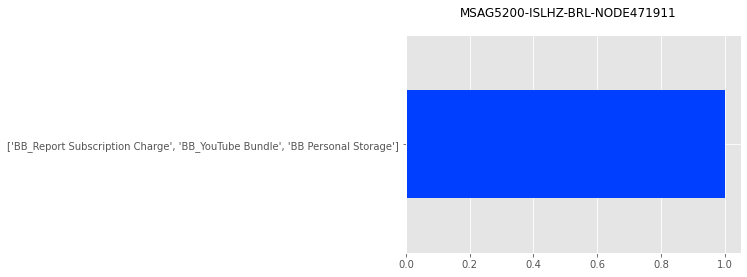

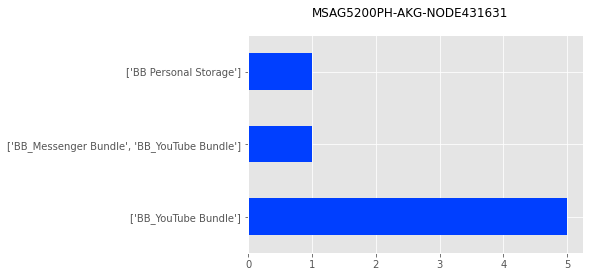

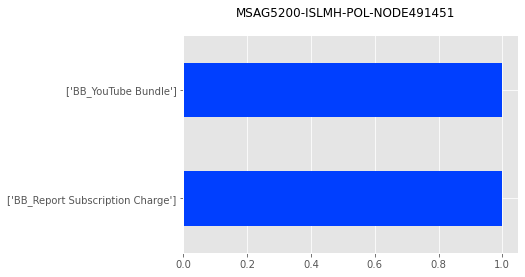

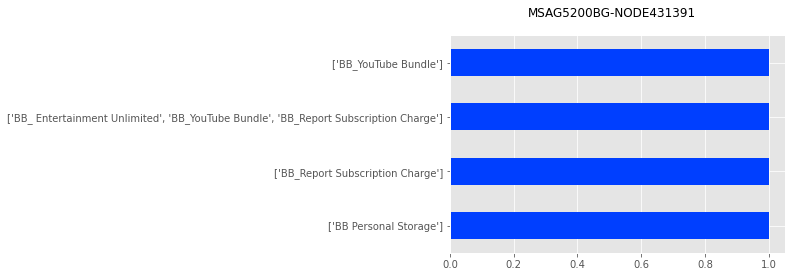

<Figure size 432x288 with 0 Axes>

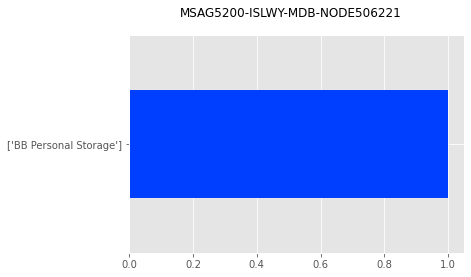

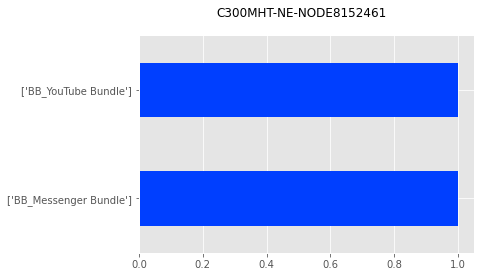

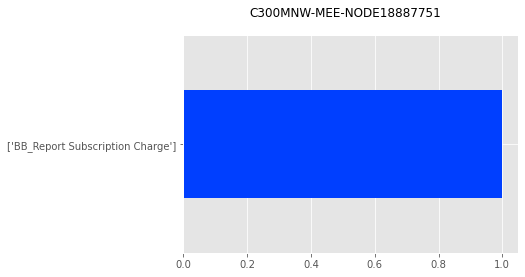

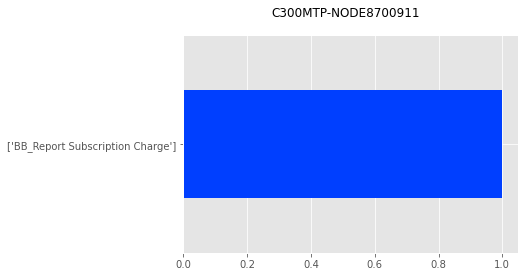

<Figure size 432x288 with 0 Axes>

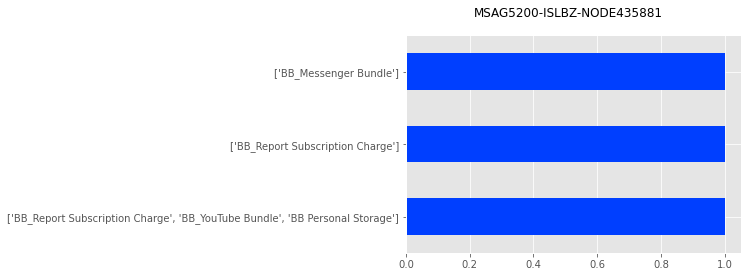

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

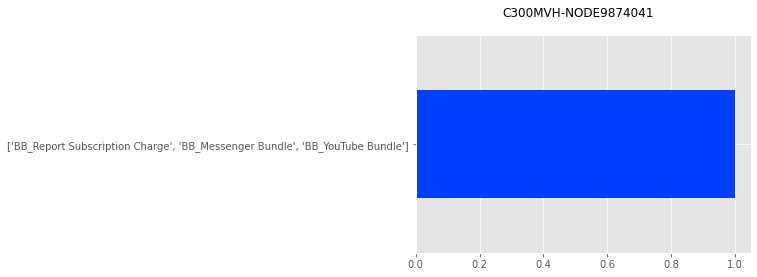

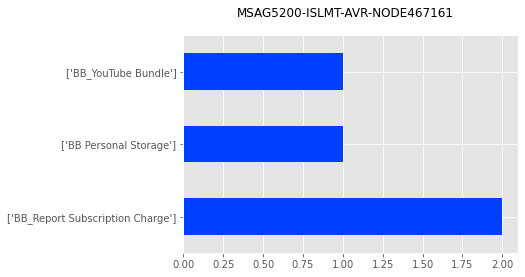

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

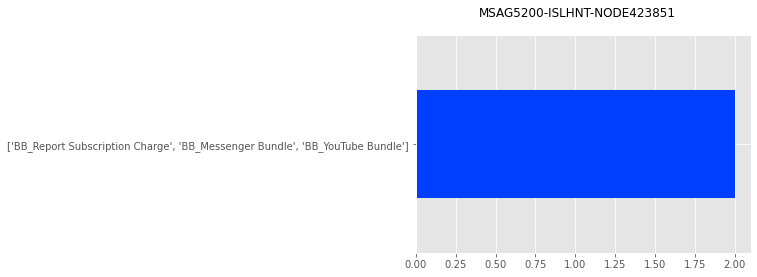

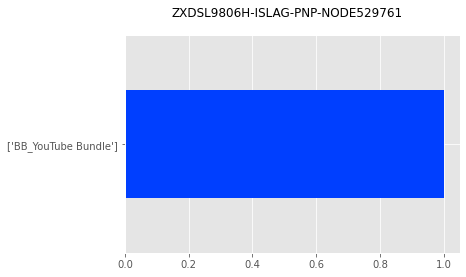

<Figure size 432x288 with 0 Axes>

In [75]:
for loc in location_arr:
    user_loc_df = cluster_0[((cluster_0["Location_Identifier"]==loc) & (cluster_0["BB_VAS_Package"] != "NO_INFO"))]
    plt.figure(figsize=(6,4))
    plt.suptitle(loc)
    if (len(user_loc_df["BB_VAS_Package"].value_counts()) > 0):
        user_loc_df["BB_VAS_Package"].value_counts().plot(kind='barh', label=loc)

## Gender Analysis

<AxesSubplot:ylabel='GENDER'>

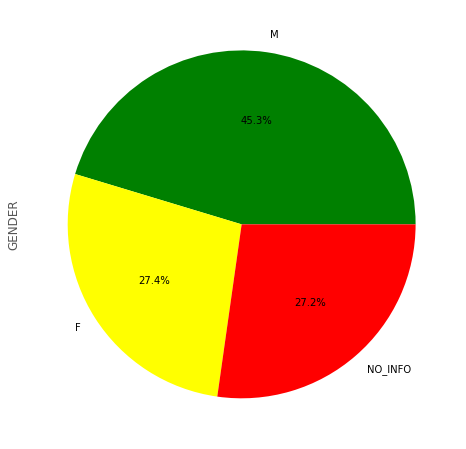

In [127]:
cluster_0["GENDER"].value_counts().plot(kind='pie', figsize=(8,8), autopct='%1.1f%%',colors = ['green','yellow','red'])

<AxesSubplot:ylabel='GENDER'>

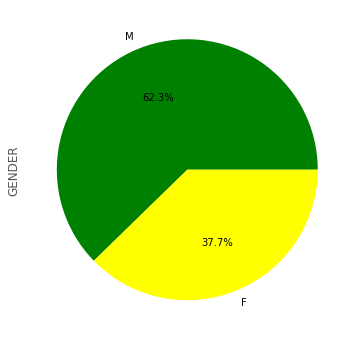

In [128]:
cluster_0[(cluster_0["GENDER"]!= "NO_INFO")]["GENDER"].value_counts().plot(kind='pie', figsize=(6,6), autopct='%1.1f%%',colors = ['green','yellow'])

#### Subscription Types by Gender

<AxesSubplot:xlabel='Sub_Type'>

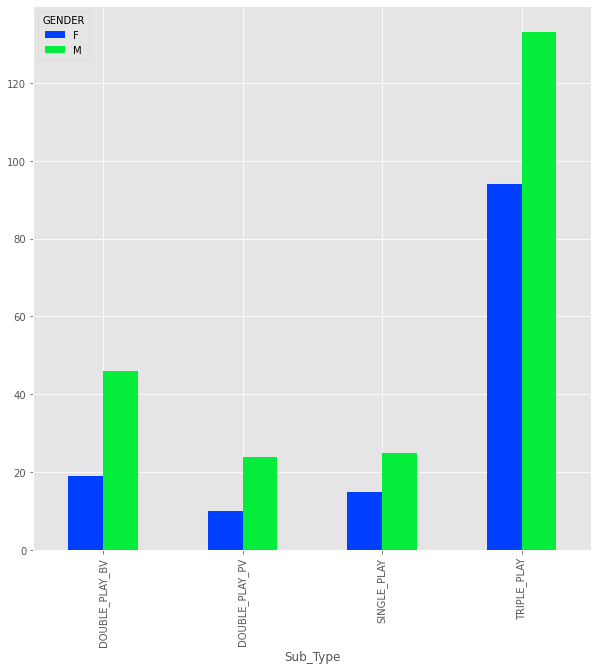

In [78]:
cluster_0[(cluster_0["GENDER"] != "NO_INFO")].groupby(["Sub_Type", "GENDER"]).size().unstack().plot.bar(figsize=(10,10))

### Service Usage on Gender

#### PeoTV Usage by Gender

array([<AxesSubplot:ylabel='PEO_TV_Scaled'>], dtype=object)

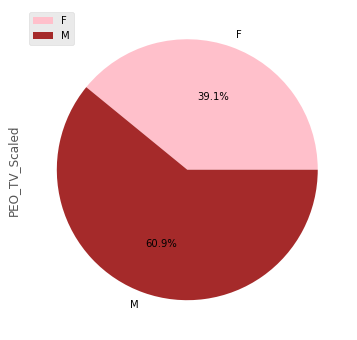

In [79]:
cluster_0[(cluster_0["GENDER"] != "NO_INFO")][["PEO_TV_Scaled", "GENDER"]].groupby("GENDER").sum().plot(kind='pie', figsize=(6,6), autopct='%1.1f%%',colors=("pink","brown"), subplots=True)

#### BB Usage by Gender

array([<AxesSubplot:ylabel='BB_Scaled'>], dtype=object)

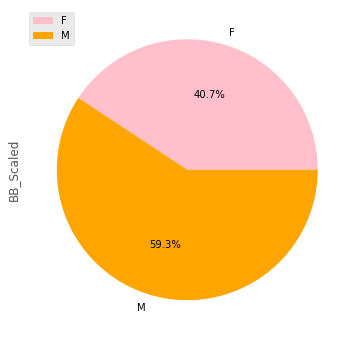

In [80]:
cluster_0[(cluster_0["GENDER"] != "NO_INFO")][["BB_Scaled", "GENDER"]].groupby("GENDER").sum().plot(kind='pie', figsize=(6,6), autopct='%1.1f%%',colors=("pink","orange"), subplots=True)

#### IDD Usage by Gender

array([<AxesSubplot:ylabel='IDD_INCOMING_Scaled'>], dtype=object)

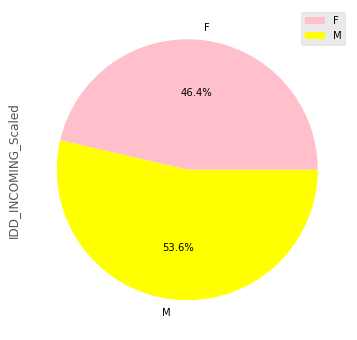

In [81]:
cluster_0[(cluster_0["GENDER"] != "NO_INFO")][["IDD_INCOMING_Scaled", "GENDER"]].groupby("GENDER").sum().plot(kind='pie', figsize=(6,6), autopct='%1.1f%%',colors=("pink","yellow"), subplots=True)

#### Popular PeoTV Package

<AxesSubplot:xlabel='Peo_TV_Package'>

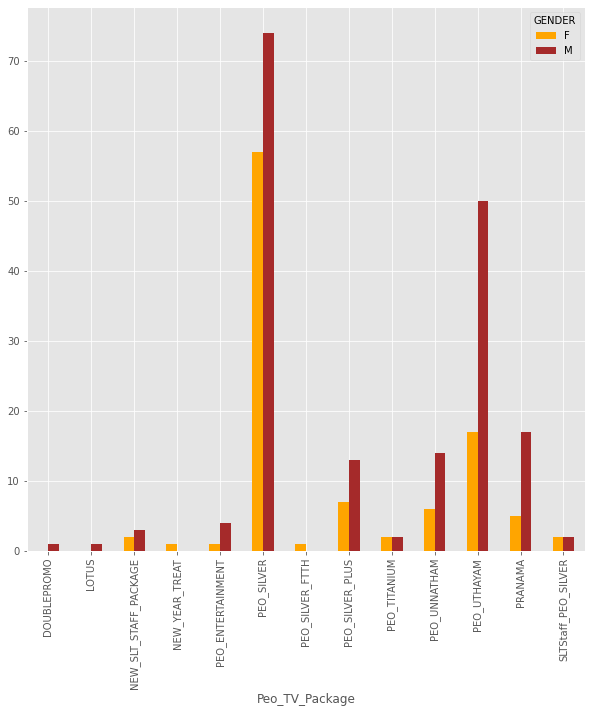

In [82]:
 cluster_0[((cluster_0["GENDER"] != "NO_INFO") &(cluster_0["Peo_TV_Package"] != "NO_INFO"))].groupby(["Peo_TV_Package", "GENDER"]).size().unstack().plot.bar(figsize=(10,10),color=("orange", "brown"))

## AGE Analysis

In [83]:
cluster_0["AGE"].describe()

count    366.000000
mean      56.789617
std       14.242595
min       26.000000
25%       46.000000
50%       56.000000
75%       65.000000
max      121.000000
Name: AGE, dtype: float64

In [84]:
bins = [0, 30,55,65,85,110]
cluster_0['AGE_Groups'] = pd.cut(cluster_0['AGE'], bins)

<ipython-input-84-985f5b1e5f2d>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<AxesSubplot:ylabel='AGE_Groups'>

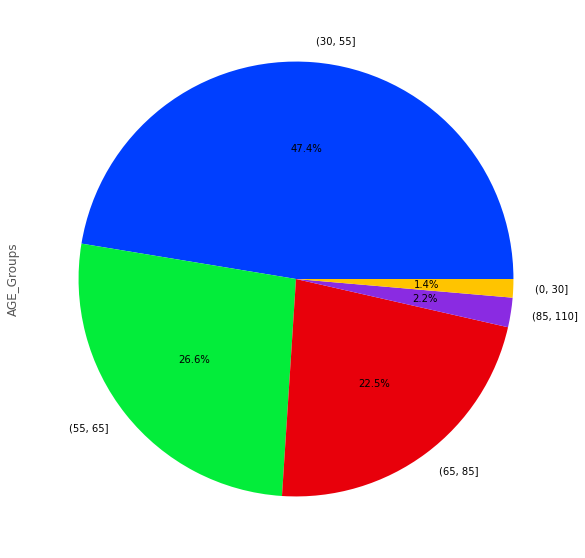

In [85]:
cluster_0["AGE_Groups"].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%')

#### Subscription Types by Age Groups

<AxesSubplot:xlabel='Sub_Type'>

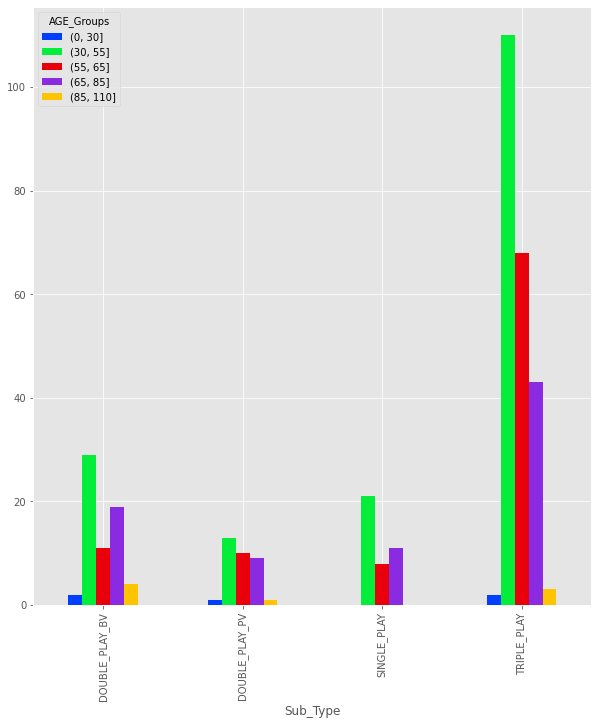

In [86]:
cluster_0.groupby(["Sub_Type", "AGE_Groups"]).size().unstack().plot.bar(figsize=(10,11))

### Service Usage by Age Groups

#### PeoTV Usage by Age Groups

array([<AxesSubplot:ylabel='PEO_TV_Scaled'>], dtype=object)

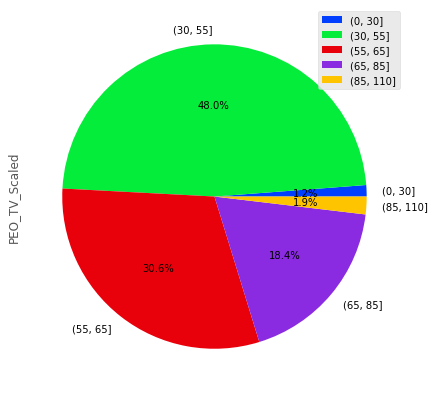

In [87]:
cluster_0[["PEO_TV_Scaled", "AGE_Groups"]].groupby("AGE_Groups").sum().plot(kind='pie', figsize=(7,7), autopct='%1.1f%%', subplots=True)

#### BB Usage by Age Groups

array([<AxesSubplot:ylabel='BB_Scaled'>], dtype=object)

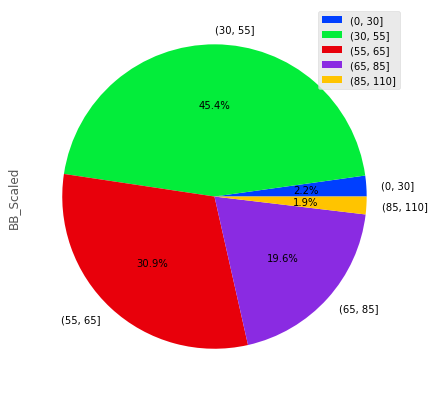

In [88]:
cluster_0[["BB_Scaled", "AGE_Groups"]].groupby("AGE_Groups").sum().plot(kind='pie', figsize=(7,7), autopct='%1.1f%%',subplots=True)

#### IDD Usage by Age Groups

array([<AxesSubplot:ylabel='IDD_INCOMING_Scaled'>], dtype=object)

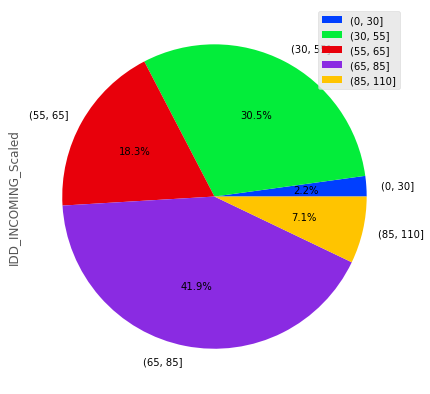

In [89]:
cluster_0[["IDD_INCOMING_Scaled", "AGE_Groups"]].groupby("AGE_Groups").sum().plot(kind='pie', figsize=(7,7), autopct='%1.1f%%', subplots=True)

#### Popular PeoTV Package

<AxesSubplot:xlabel='Peo_TV_Package'>

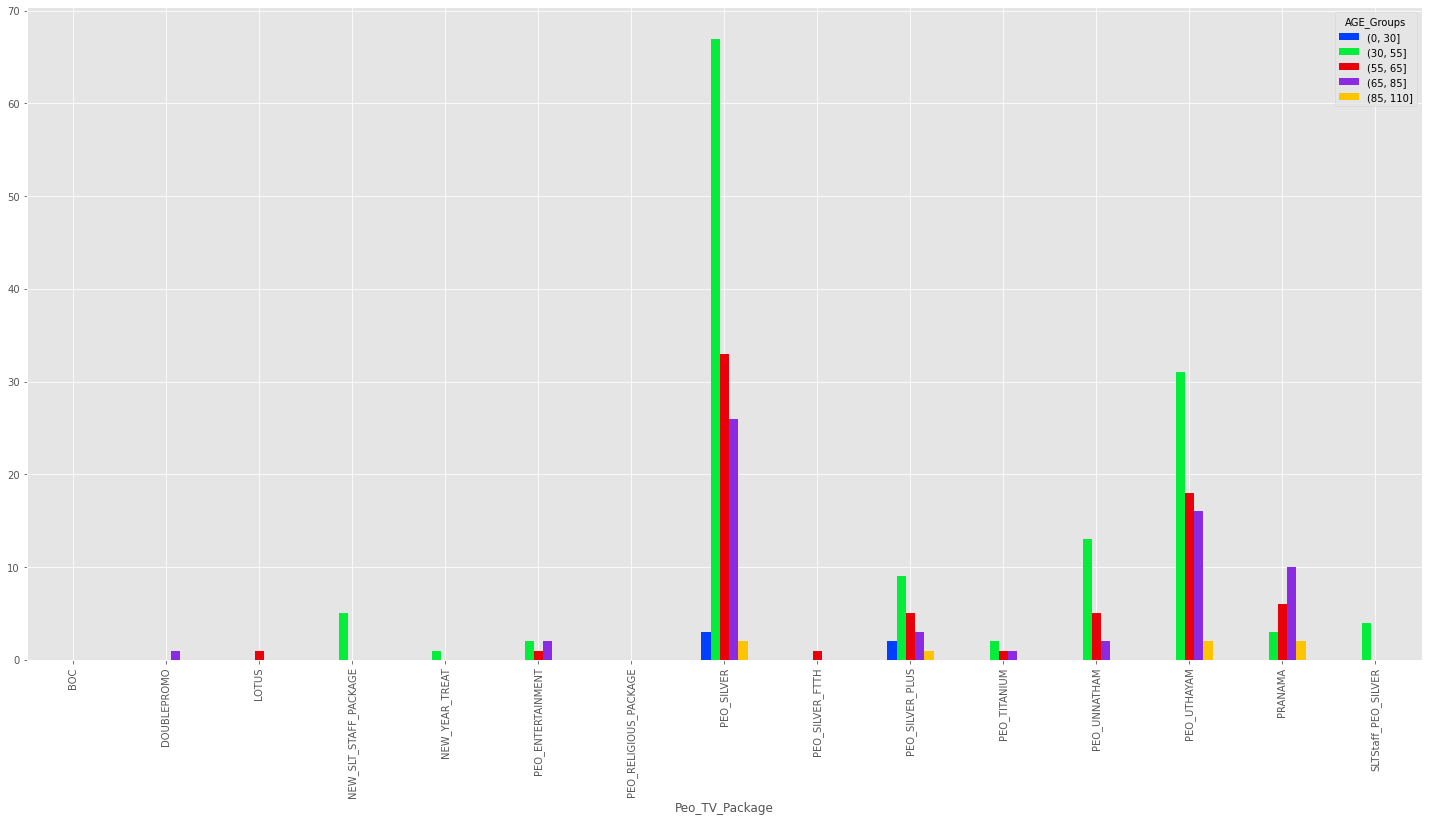

In [90]:
cluster_0[(cluster_0["Peo_TV_Package"] != "NO_INFO")].groupby(["Peo_TV_Package", "AGE_Groups"]).size().unstack().plot.bar(figsize=(25,12))

## ToDo
- Age and Gender wise VAS analysis

### Socio-economic factors

In [91]:
cluster_0["Having_Insurance"].value_counts()

NO_INFO    337
YES        166
Name: Having_Insurance, dtype: int64

<AxesSubplot:xlabel='Having_Insurance'>

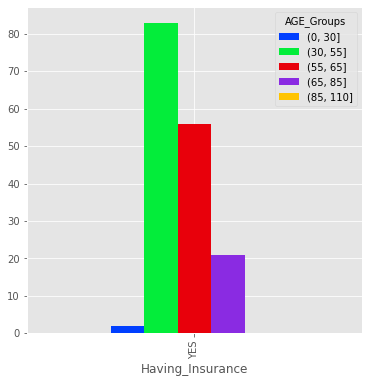

In [92]:
cluster_0[(cluster_0["Having_Insurance"] != "NO_INFO")].groupby(["Having_Insurance", "AGE_Groups"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Having_Insurance'>

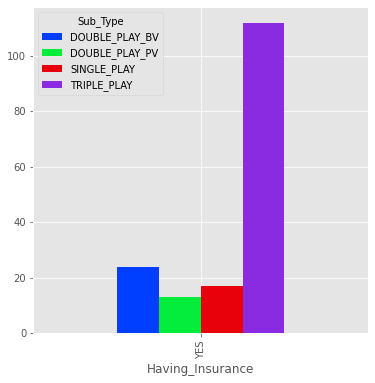

In [93]:
cluster_0[(cluster_0["Having_Insurance"] != "NO_INFO")].groupby(["Having_Insurance", "Sub_Type"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Having_Insurance'>

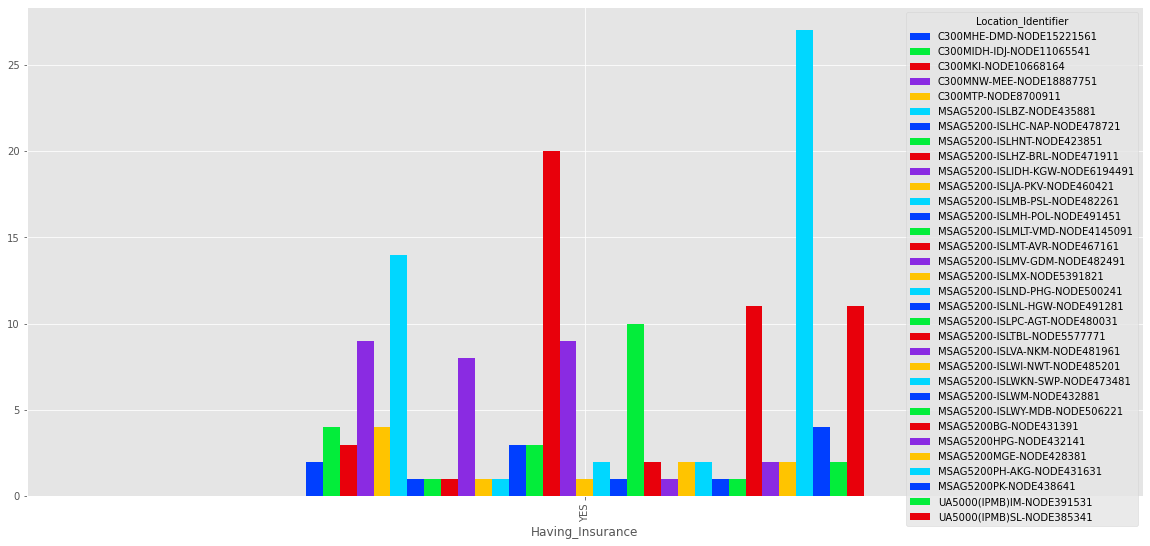

In [94]:
cluster_0[(cluster_0["Having_Insurance"] != "NO_INFO")].groupby(["Having_Insurance", "Location_Identifier"]).size().unstack().plot.bar(figsize=(20,9))

#### Having Senior citizens

In [95]:
cluster_0["Having_Senior_Citizen"].value_counts(normalize=True)

NO_INFO    0.632207
YES        0.367793
Name: Having_Senior_Citizen, dtype: float64

<AxesSubplot:xlabel='Having_Senior_Citizen'>

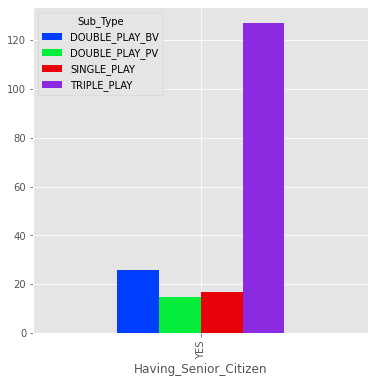

In [96]:
cluster_0[(cluster_0["Having_Senior_Citizen"] != "NO_INFO")].groupby(["Having_Senior_Citizen", "Sub_Type"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Having_Senior_Citizen'>

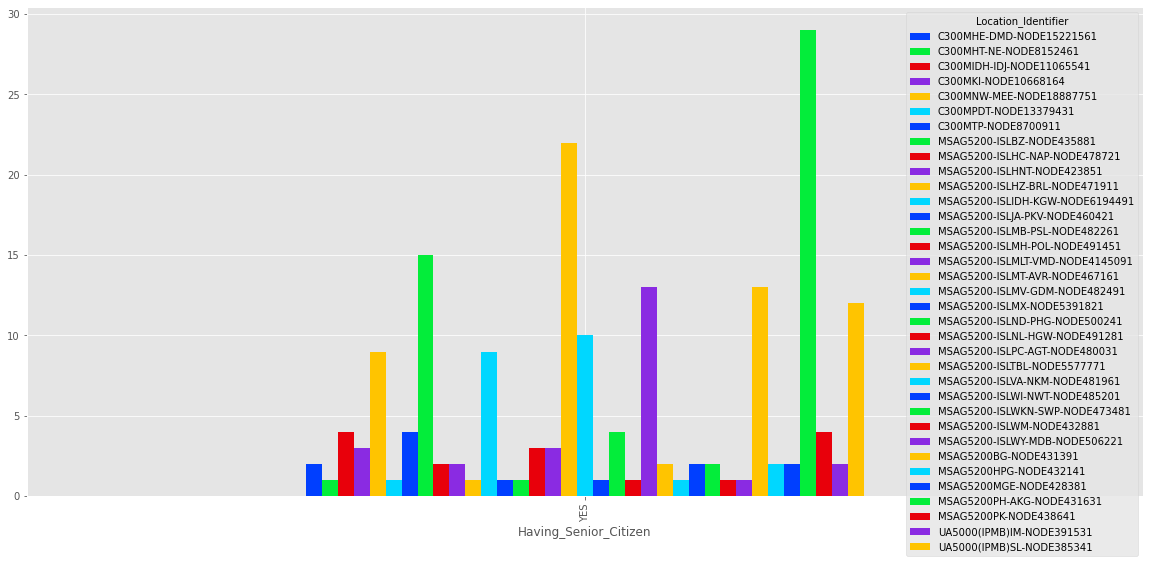

In [97]:
cluster_0[(cluster_0["Having_Senior_Citizen"] != "NO_INFO")].groupby(["Having_Senior_Citizen", "Location_Identifier"]).size().unstack().plot.bar(figsize=(20,9))

#### Having a family member abroad

In [98]:
cluster_0["Having_Family_Member_Abroad"].value_counts(normalize=True)

YES        0.510934
NO_INFO    0.489066
Name: Having_Family_Member_Abroad, dtype: float64

<AxesSubplot:xlabel='Having_Family_Member_Abroad'>

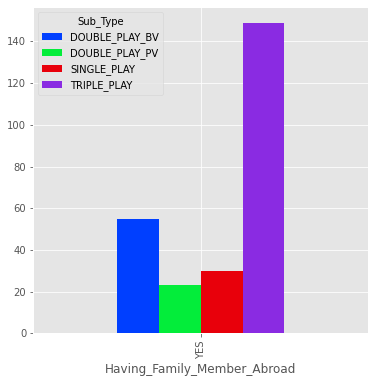

In [99]:
cluster_0[(cluster_0["Having_Family_Member_Abroad"] != "NO_INFO")].groupby(["Having_Family_Member_Abroad", "Sub_Type"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Having_Family_Member_Abroad'>

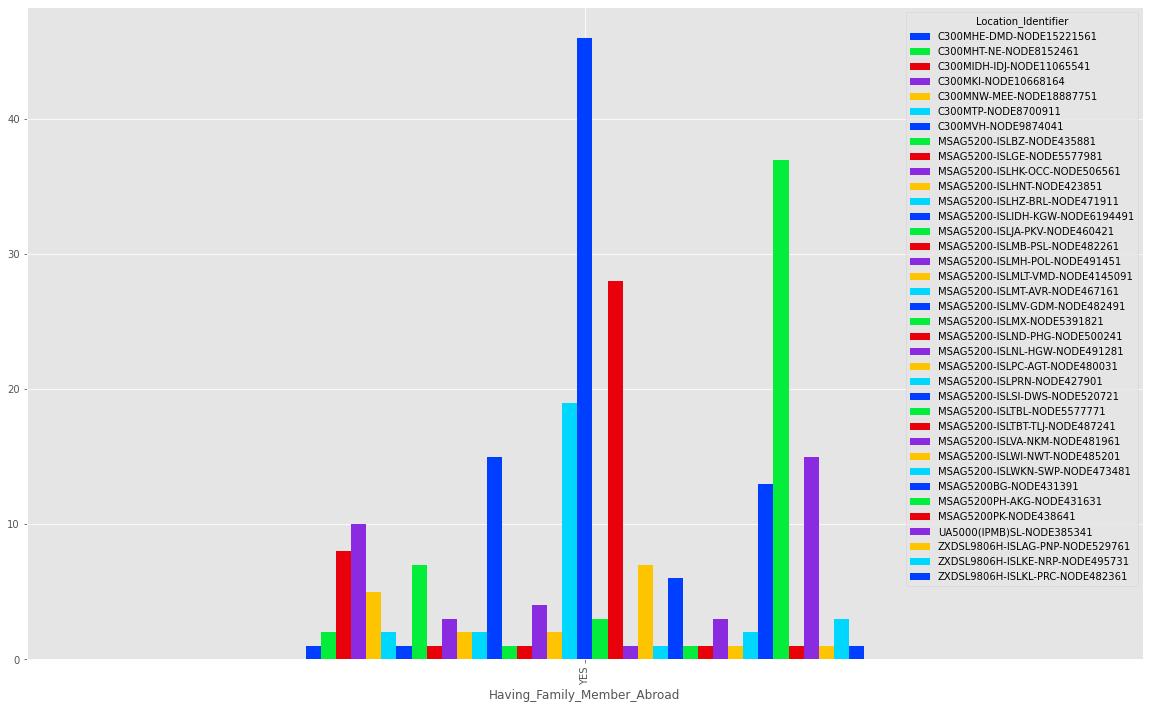

In [100]:
cluster_0[(cluster_0["Having_Family_Member_Abroad"] != "NO_INFO")].groupby(["Having_Family_Member_Abroad", "Location_Identifier"]).size().unstack().plot.bar(figsize=(20,12))

#### Having a working professional

In [101]:
cluster_0["Having_Working_Professionals"].value_counts(normalize=True)

NO_INFO    0.673956
YES        0.326044
Name: Having_Working_Professionals, dtype: float64

<AxesSubplot:xlabel='Having_Working_Professionals'>

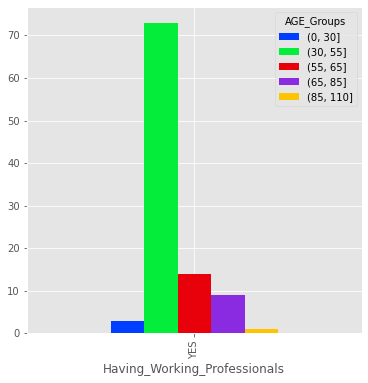

In [102]:
cluster_0[(cluster_0["Having_Working_Professionals"] != "NO_INFO")].groupby(["Having_Working_Professionals", "AGE_Groups"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Having_Working_Professionals'>

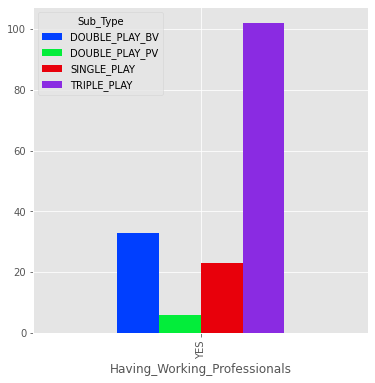

In [103]:
cluster_0[(cluster_0["Having_Working_Professionals"] != "NO_INFO")].groupby(["Having_Working_Professionals", "Sub_Type"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Having_Working_Professionals'>

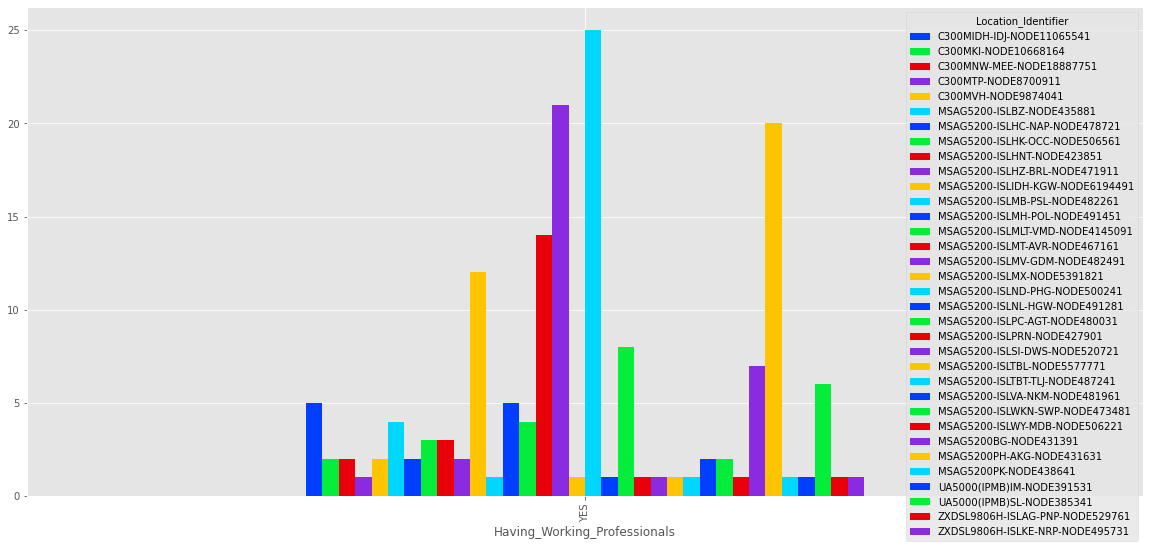

In [104]:
cluster_0[(cluster_0["Having_Working_Professionals"] != "NO_INFO")].groupby(["Having_Working_Professionals", "Location_Identifier"]).size().unstack().plot.bar(figsize=(20,9))

#### Having Teenagers Students

In [105]:
cluster_0["Having_Teenagers_Students"].value_counts(normalize=True)

NO_INFO    0.707753
YES        0.292247
Name: Having_Teenagers_Students, dtype: float64

<AxesSubplot:xlabel='Having_Teenagers_Students'>

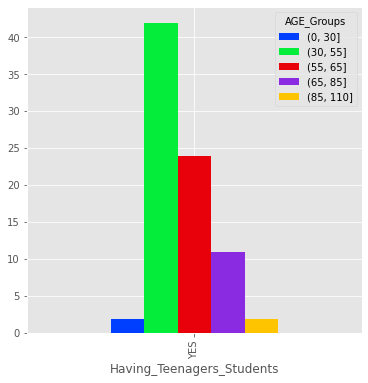

In [106]:
cluster_0[(cluster_0["Having_Teenagers_Students"] != "NO_INFO")].groupby(["Having_Teenagers_Students", "AGE_Groups"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Having_Teenagers_Students'>

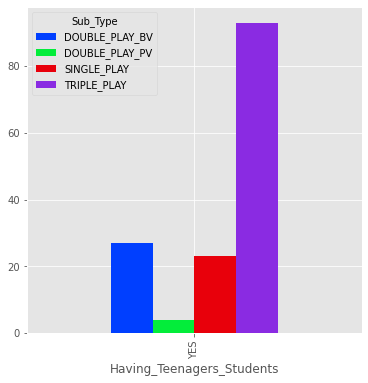

In [107]:
cluster_0[(cluster_0["Having_Teenagers_Students"] != "NO_INFO")].groupby(["Having_Teenagers_Students", "Sub_Type"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Having_Teenagers_Students'>

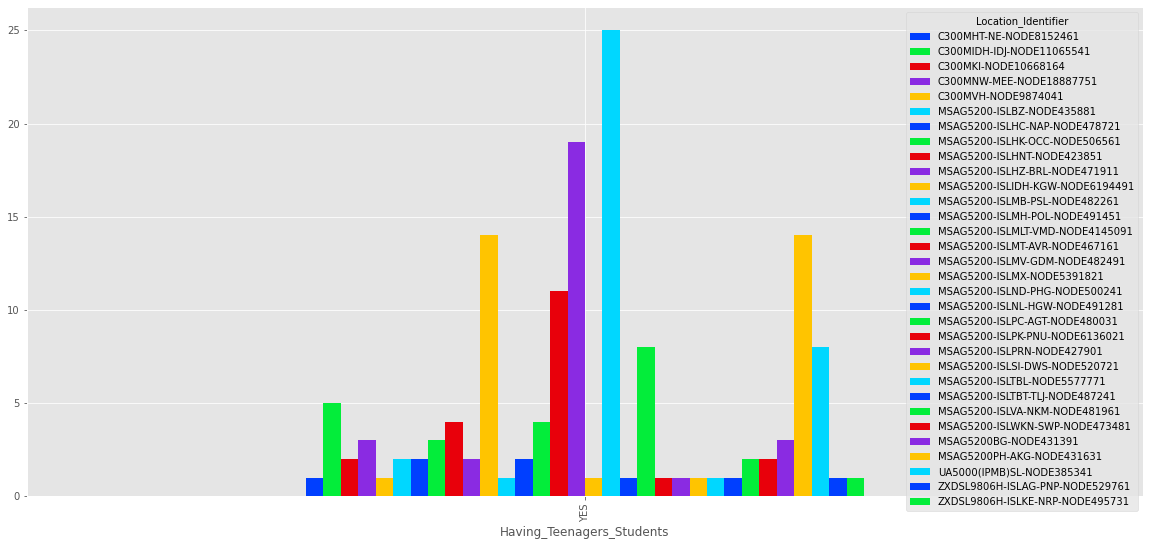

In [108]:
cluster_0[(cluster_0["Having_Teenagers_Students"] != "NO_INFO")].groupby(["Having_Teenagers_Students", "Location_Identifier"]).size().unstack().plot.bar(figsize=(20,9))

#### Having a Tamil customer

In [109]:
cluster_0["Tamil_Customer"].value_counts(normalize=True)

NO_INFO    0.811133
YES        0.188867
Name: Tamil_Customer, dtype: float64

<AxesSubplot:xlabel='Tamil_Customer'>

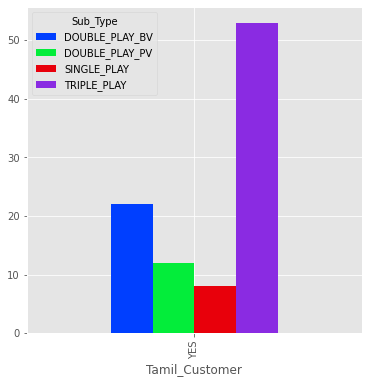

In [110]:
cluster_0[(cluster_0["Tamil_Customer"] != "NO_INFO")].groupby(["Tamil_Customer", "Sub_Type"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Tamil_Customer'>

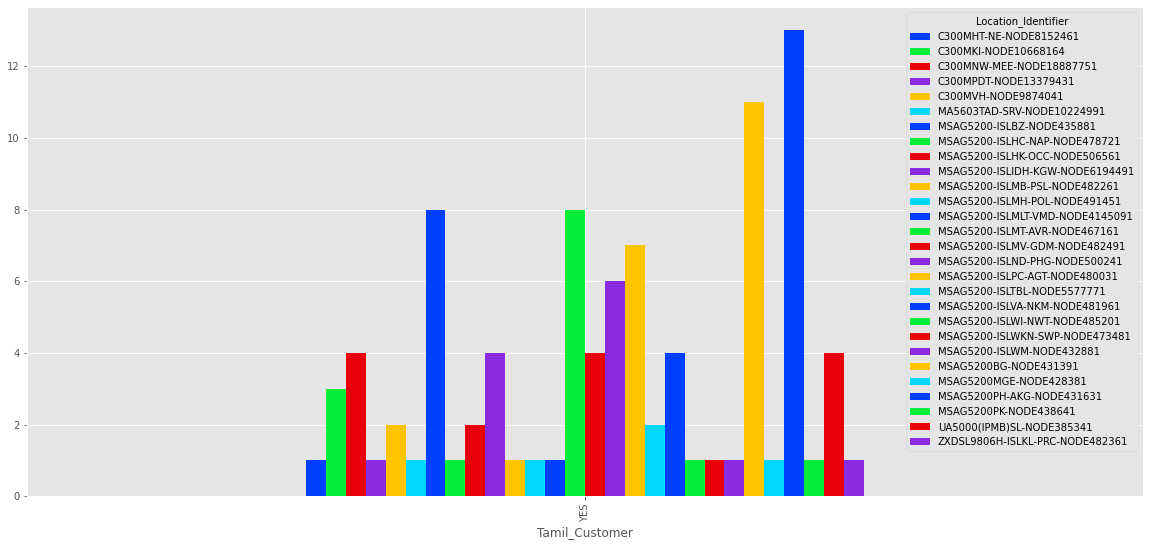

In [111]:
cluster_0[(cluster_0["Tamil_Customer"] != "NO_INFO")].groupby(["Tamil_Customer", "Location_Identifier"]).size().unstack().plot.bar(figsize=(20,9))

#### Having Kids at Home

In [112]:
cluster_0["Having_Kids_at_Home"].value_counts(normalize=True)

NO_INFO    0.777336
YES        0.222664
Name: Having_Kids_at_Home, dtype: float64

<AxesSubplot:xlabel='Having_Kids_at_Home'>

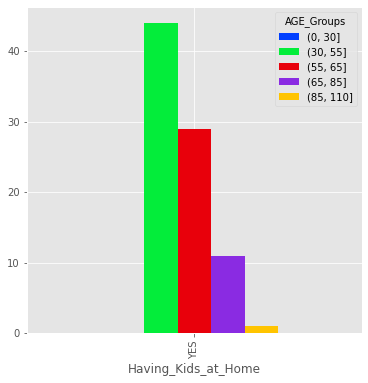

In [113]:
cluster_0[(cluster_0["Having_Kids_at_Home"] != "NO_INFO")].groupby(["Having_Kids_at_Home", "AGE_Groups"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Having_Kids_at_Home'>

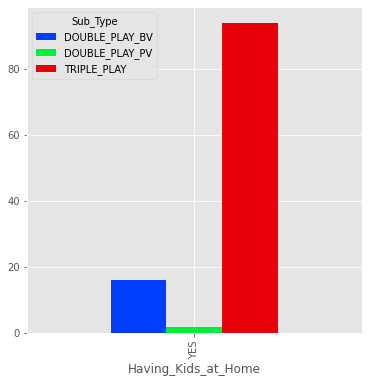

In [114]:
cluster_0[(cluster_0["Having_Kids_at_Home"] != "NO_INFO")].groupby(["Having_Kids_at_Home", "Sub_Type"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Having_Kids_at_Home'>

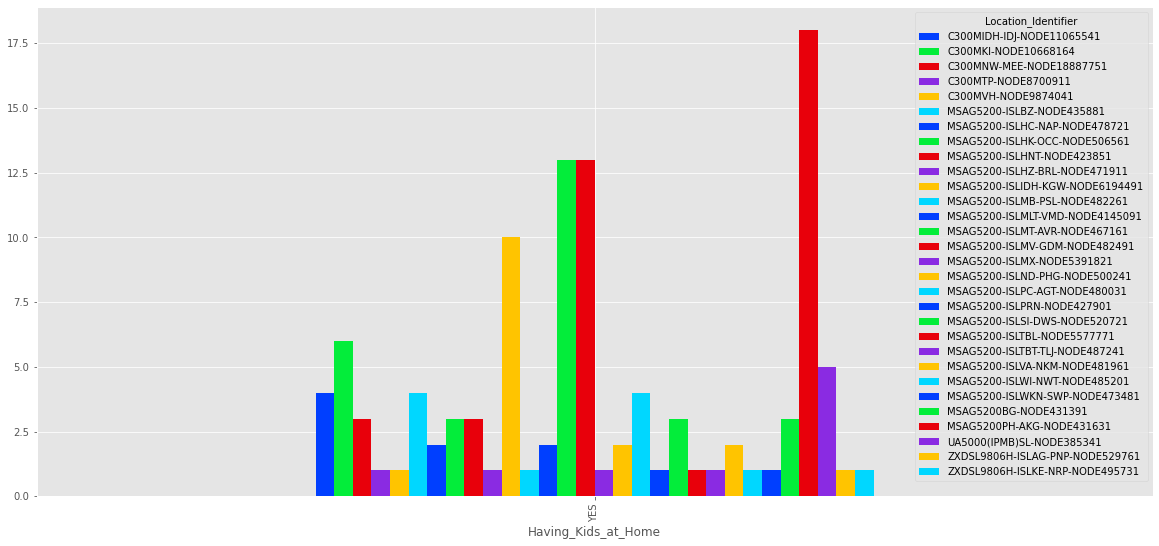

In [115]:
cluster_0[(cluster_0["Having_Kids_at_Home"] != "NO_INFO")].groupby(["Having_Kids_at_Home", "Location_Identifier"]).size().unstack().plot.bar(figsize=(20,9))

### Identifying factors for recommending Packages for Cluster 0

#### Feasible locations to offer PeoTV

In [116]:
cluster_0_peo_loc = cluster_0[(cluster_0["Sub_Type"] == "TRIPLE_PLAY") | (cluster_0["Sub_Type"] == "DOUBLE_PLAY_PV")].groupby('Location_Identifier').count()["event_source.hash"]

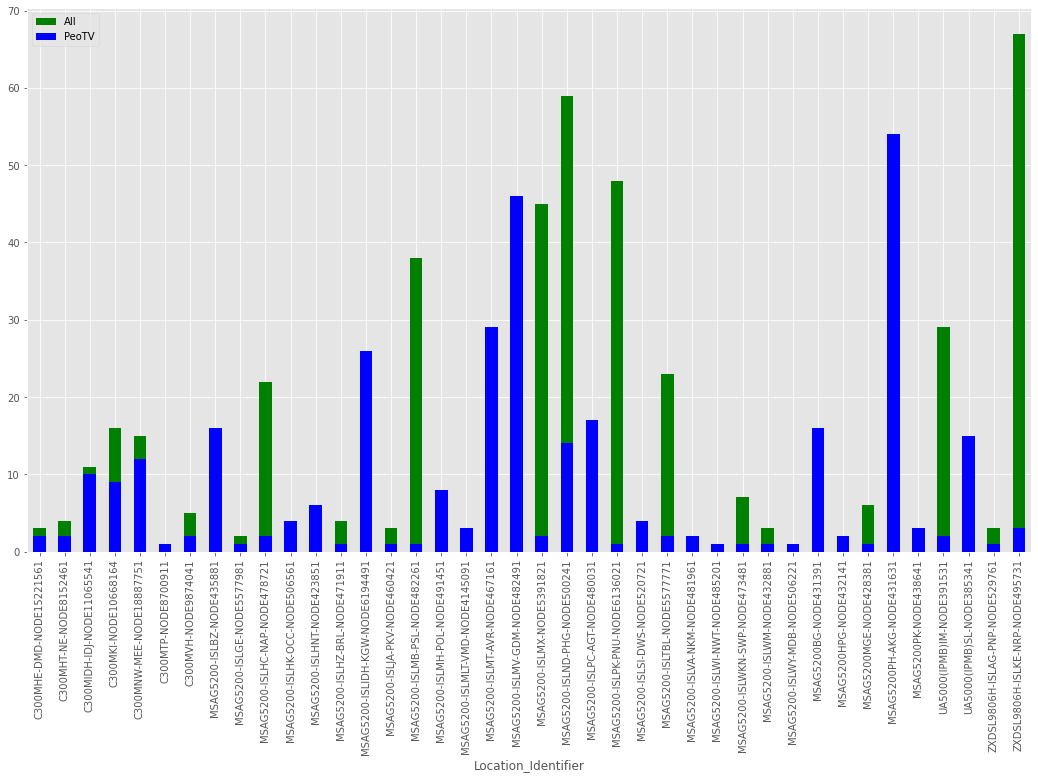

In [117]:
ax = cluster_0_loc.plot(stacked=True, kind="bar", figsize=(18,10), color="green")
cluster_0_peo_loc.plot(stacked=True, kind="bar",ax=ax, figsize=(18,10), color="blue")
plt.legend(["All","PeoTV"])

In [118]:
loc_precentage=(cluster_0_peo_loc/cluster_0_loc)*100

In [119]:
loc_precentage[(loc_precentage > 60)]

Location_Identifier
C300MHE-DMD-NODE15221561            66.666667
C300MIDH-IDJ-NODE11065541           90.909091
C300MNW-MEE-NODE18887751            80.000000
MSAG5200-ISLBZ-NODE435881           72.727273
MSAG5200-ISLGE-NODE5577981         100.000000
MSAG5200-ISLHC-NAP-NODE478721      100.000000
MSAG5200-ISLHK-OCC-NODE506561      100.000000
MSAG5200-ISLHNT-NODE423851         100.000000
MSAG5200-ISLIDH-KGW-NODE6194491     68.421053
MSAG5200-ISLJA-PKV-NODE460421      100.000000
MSAG5200-ISLMH-POL-NODE491451       80.000000
MSAG5200-ISLMT-AVR-NODE467161       64.444444
MSAG5200-ISLMV-GDM-NODE482491       77.966102
MSAG5200-ISLMX-NODE5391821          66.666667
MSAG5200-ISLPC-AGT-NODE480031       73.913043
MSAG5200-ISLPK-PNU-NODE6136021     100.000000
MSAG5200-ISLTBL-NODE5577771         66.666667
MSAG5200-ISLWM-NODE432881          100.000000
MSAG5200HPG-NODE432141             100.000000
MSAG5200PH-AKG-NODE431631           80.597015
MSAG5200PK-NODE438641               75.000000
UA5000(IPMB)IM

#### Feasible locations to offer Broadband

In [120]:
cluster_0_bb_loc = cluster_0[(cluster_0["Sub_Type"] == "TRIPLE_PLAY") | (cluster_0["Sub_Type"] == "DOUBLE_PLAY_BV")].groupby('Location_Identifier').count()["event_source.hash"]

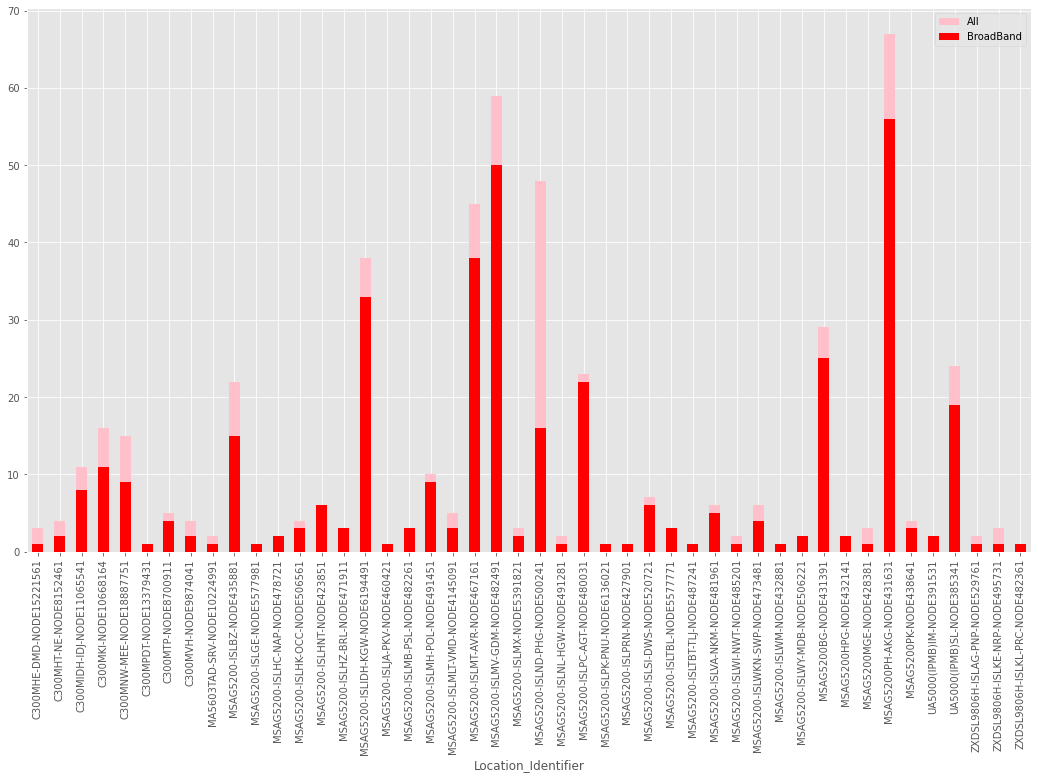

In [121]:
ax = cluster_0_loc.plot(stacked=True, kind="bar", figsize=(18,10), color="pink")
cluster_0_bb_loc.plot(stacked=True, kind="bar",ax=ax, figsize=(18,10), color="red")
plt.legend(["All","BroadBand"])

In [122]:
loc_precentage=(cluster_0_bb_loc/cluster_0_loc)*100

In [123]:
loc_precentage[(loc_precentage > 60)]

Location_Identifier
C300MIDH-IDJ-NODE11065541           72.727273
C300MKI-NODE10668164                68.750000
C300MPDT-NODE13379431              100.000000
C300MTP-NODE8700911                 80.000000
MSAG5200-ISLBZ-NODE435881           68.181818
MSAG5200-ISLGE-NODE5577981         100.000000
MSAG5200-ISLHC-NAP-NODE478721      100.000000
MSAG5200-ISLHK-OCC-NODE506561       75.000000
MSAG5200-ISLHNT-NODE423851         100.000000
MSAG5200-ISLHZ-BRL-NODE471911      100.000000
MSAG5200-ISLIDH-KGW-NODE6194491     86.842105
MSAG5200-ISLJA-PKV-NODE460421      100.000000
MSAG5200-ISLMB-PSL-NODE482261      100.000000
MSAG5200-ISLMH-POL-NODE491451       90.000000
MSAG5200-ISLMT-AVR-NODE467161       84.444444
MSAG5200-ISLMV-GDM-NODE482491       84.745763
MSAG5200-ISLMX-NODE5391821          66.666667
MSAG5200-ISLPC-AGT-NODE480031       95.652174
MSAG5200-ISLPK-PNU-NODE6136021     100.000000
MSAG5200-ISLPRN-NODE427901         100.000000
MSAG5200-ISLSI-DWS-NODE520721       85.714286
MSAG5200-ISLTB

## Cluster 0- Findings